In [2]:
import warnings
warnings.filterwarnings('ignore')
from IPython.utils.capture import capture_output
import os, sys
import numpy as np
import pandas as pd
from importlib import reload

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from tableone import TableOne

In [40]:
### rpy2
import sys
sys.executable
import rpy2
print(rpy2.__version__)
import os
os.environ['PATH'] = r'C:\Program Files\R\R-4.2.1\bin\x64'
os.environ['R_HOME'] = r'C:\Program Files\R\R-4.2.1' #path to your R installation
os.environ['R_USER'] = r'C:\Users\aynaz.adlzarrabi\Anaconda3\Lib\site-packages\rpy2' #path depends on where you installed Python. Mine is the Anaconda distribution
os.environ['R_LIBS_USER'] = r'C:\Program Files\R\R-4.2.1\library'
import rpy2.situation
for row in rpy2.situation.iter_info():
    print(row)
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
base = importr('base')
utils = importr('utils')
#%load_ext rpy2.ipython

3.5.6
rpy2 version:
3.5.6
Python version:
3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]
Looking for R's HOME:
    Environment variable R_HOME: C:\Program Files\R\R-4.2.1
    InstallPath in the registry: C:\Program Files\R\R-4.3.2
    Environment variable R_USER: C:\Users\aynaz.adlzarrabi\Anaconda3\Lib\site-packages\rpy2
    Environment variable R_LIBS_USER: C:\Program Files\R\R-4.2.1\library
R version:
    In the PATH: R version 4.2.1 (2022-06-23 ucrt) -- "Funny-Looking Kid"
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:


In [41]:
import pingouin as pg
from scipy.stats import mannwhitneyu, probplot, shapiro,chi2_contingency, kruskal
from pymer4.models import Lm
from statsmodels.formula.api import ols
from statsmodels.stats import multicomp as mc
from statsmodels.stats.diagnostic import normal_ad, het_breuschpagan, acorr_ljungbox,kstest_fit
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
sys.path.insert(0, os.path.abspath('../../palin/python'))
import palin as pa
from palin.utils import utils
from palin.internal_noise import optimize
from palin.internal_noise import grid
from palin.kernels import classification_images

In [43]:
reload(pa)
reload(grid)
reload(utils)
reload(optimize)
reload(classification_images)

<module 'palin.kernels.classification_images' from 'G:\\Utilisateurs\\aynaz.adlzarrabi\\Documents\\WORK\\DO\\2022\\palin\\python\\palin\\kernels\\classification_images.py'>

In [44]:
## you may check the version of pandas, because of some libraries we could not upgrade pandas version
print(pd.__version__)

1.5.0


# A simple psychophysical procedure to assess impairements of speech prosodic processing in right-hemisphere stroke 

&copy; Aynaz Adl Zarrabi, Mélissa Jeulin, Emmanuel Ponsot, Pauline Commère, Pauline Bardet, Lionel Naccache, Marie Villain, Jean Julien Aucouturier, 2023

# Data Analysis



Load data

In [3]:
revcor_data=pd.read_csv("data/revcor_data.csv", index_col=0)

## Materials and Methods

### Participants

N=22 brain stroke survivors (male:17; M=57.5 yo, SD=13.0), and N=12 age-matched controls (male: 6; M=59.4 yo, SD=17.6) took part in the study. All patients were outpatients at the PM&R Dept., APHP Pitié-Salpêtrière Hospital in Paris, where they were seen for speech therapy for <mark>XXX</mark> (M=4 months after stroke). Patients included in the study had a history of supratentorial right-hemisphere ischaemic stroke, corroborated by clinical assessments and brain MRI, and dating less than 1y at the time of inclusion; were first-language French speakers; and had no disorders of wakefulness/consciousness, dementia, severe dysarthria, psychiatric antecedents (>2 months in-patient) or major visual or auditory impairment (> 40dB HL). Patients with language comprehension deficits (score < 10/15 on the BDAE instruction-following task) were excluded from the study. Controls were recruited via the INSEAD-Sorbonne Université Center for Behavioural Science subject pool. 

In [ ]:
revcor_data.groupby(['type','experimentor']).subject.unique()

In [47]:
revcor_data.groupby(['type']).agg({'age':['mean','std']})

age           
               mean        std
type                          
controls  58.689655  13.120514
patients  57.551020  12.432837

In [48]:
revcor_data.groupby(['type','sex'], dropna=False).subject.nunique()

type      sex
controls  f       8
          m      14
patients  f       5
          m      17
Name: subject, dtype: int64

### Procedure

Participants were presented with a psychophysical test sequence composed of successive pairs of sound recordings (150 pairs for patients, 700 pairs for control cases) corresponding to systematically-varied pronunciations of the word “really” (French: ‘vraiment’; see Stimuli below). Within each pair, they were asked to indicate which of the two recordings sounded most interrogative using a keyboard computer interface (a psychophysical procedure called 2I-AFC: 2-interval 1-alternative forced choice). 

In [49]:
revcor_data.groupby(['type','subject','experimentor']).agg({'block':'unique','trial':'nunique'})

block  trial
type     subject experimentor                  
controls 0       aynaz         [1, 2, 3]    150
         1       aynaz         [1, 2, 3]    150
         2       aynaz         [1, 2, 3]    150
         3       aynaz         [1, 2, 3]    150
         4       aynaz         [1, 2, 3]    150
         5       aynaz         [1, 2, 3]    150
         6       aynaz         [1, 2, 3]    150
         7       aynaz         [1, 2, 3]    150
         8       aynaz         [1, 2, 3]    150
         9       aynaz         [1, 2, 3]    150
         10      aynaz         [1, 2, 3]    150
         11      aynaz         [1, 2, 3]    150
         12      aynaz         [1, 2, 3]    150
         13      aynaz         [1, 2, 3]    150
         14      aynaz         [1, 2, 3]    150
         15      jeulin        [1, 2, 3]    150
         16      jeulin        [1, 2, 3]    150
         17      jeulin        [1, 2, 3]    150
         18      jeulin        [1, 2, 3]    150
         19      jeulin        [1, 2, 3]    150
         20      jeulin        [1, 2, 3]    150
         21      jeulin        [1, 2, 3]    150
patients 22      bardet        [1, 2, 3]    150
         23      bardet        [1, 2, 3]    150
         24      bardet        [1, 2, 3]    150
         25      bardet        [1, 2, 3]    150
         26      bardet        [1, 2, 3]    150
         27      commere       [1, 2, 3]    150
         28      commere       [1, 2, 3]    150
         29      commere       [1, 2, 3]    150
         30      commere       [1, 2, 3]    150
         31      commere       [1, 2, 3]    150
         32      commere       [1, 2, 3]    150
         33      commere       [1, 2, 3]    150
         34      commere       [1, 2, 3]    150
         35      jeulin        [1, 2, 3]    150
         36      jeulin        [1, 2, 3]    150
         37      jeulin        [1, 2, 3]    150
         38      jeulin        [1, 2, 3]    150
         39      jeulin        [1, 2, 3]    150
         40      jeulin        [1, 2, 3]    150
         41      jeulin        [1, 2, 3]    150
         42      jeulin        [1, 2, 3]    150
         43      jeulin        [1, 2, 3]    150

The two last blocks of each sequence contained identical pairs of sounds (a procedure called double-pass, allowing us to examine choice consistency), but all other sounds in the sequence were otherwise distinct. 

Sounds were delivered dichotically, using closed headphones (Beyerdynamics DT770) at a comfortable level (70 dB SPL). The inter-stimulus interval in each pair was 500 ms, and the interval between successive pairs was 1s. The procedure took about 15min to complete for patients and 1hr for controls.       

### Stimuli

All sound recordings in the study were obtained from a single initial recording (a male French-speaker uttering the word ‘vraiment’ - duration: 600ms, mean pitch: 150Hz), which was digitally manipulated to create infinitely different variations of its pitch contour or prosody. In more details, the recording was divided in 7 successive segments of 2.6 ms, and the pitch of …   

### Reverse-correlation analysis

For each participant's response data, we fitted a 2-stage cognitive model consisting, first, of a prosodic template (or _'internal representation'_) to which sound stimuli are compared and, second, of a level of _'internal noise'_ which controls how consistently this representation is applied to incoming stimuli.    

<mark> In this section, we compute a dataframe of reverse correlation measures in the form 
    
<table>
<thead>
  <tr>
    <th>subject</th>
    <th>session</th>
    <th>representation typicality</th>
    <th>internal noise</th>
    <th>criteria</th>
    <th>accuracy</th>
    <th>...</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>1</td>
    <td>1</td>
    <td>2.1</td>
    <td>1.5</td>
    <td>...</td>
  </tr>
</tbody>
</table>
    
<mark> which we will then correlate with clinical measures

#### Internal representations

Participants' internal representations were computed using the classification image technique. 

In [ ]:
trial_ids=['type','subject','session','experimentor']
kernels=classification_images.compute_kernel(revcor_data,trial_ids,'segment','response','pitch')
kernels

#### Typicality of representation

For each patient/session, we quantify how similar their internal representation is from the control group's, by computing the mean squared error between the two representations. We will then use this "representation typicality" as a mesure to correlate with clinical measures.  

In [51]:
# compute average kernel from all participants tagged as "controls"
control_kernels = kernels[kernels['type']=='controls'].groupby('segment')['kernel_value'].mean().reset_index()
# match each patient kernel, at each segment, with the corresponding gain in the control kernel 
distances = pd.merge(kernels,control_kernels, on=["segment"])
#compute squared difference between patient and control kernel gains at each segment
distances["kernel_distance"] = (distances["kernel_value_x"] - distances["kernel_value_y"])**2
# and average over segments, for each patient
distances = distances.groupby(['experimentor','type','subject','session'])['kernel_distance'].mean().reset_index()
# and rescale as a similarity value
distances['kernel_typicality'] = ( distances.kernel_distance - distances.kernel_distance.max() ) / ( distances.kernel_distance.min() - distances.kernel_distance.max() )   

#### Internal noise

We compute participant's internal noise from the probability of agreement and probability of responding interval 1 across the double-pass trials, using the simulation procedure of Ponsot. 

##### Double pass measures
We first measure  probability of agreement and probability of responding interval 1 across the double-pass trials

##### Consistency measure

In [ ]:
revcor_data = utils.index_double_pass_trials(revcor_data, 
                               session_identifiers=['type','subject','session'],
                               trial_identifier='trial',
                               response_identifier='double_pass_id',
                               value_identifier='pitch')

In [53]:
revcor_data[revcor_data.experimentor.isin(['aynaz'])].dropna(subset='double_pass_id').sort_values(by=['block','double_pass_id']).groupby(['experimentor','type','subject','session','block']).agg({'double_pass_id':['nunique','unique'],
                                                                                                   'trial':['nunique','unique']})

double_pass_id  \
                                                   nunique   
experimentor type     subject session block                  
aynaz        controls 0       1       2                 50   
                                      3                 50   
                      1       1       2                 50   
                                      3                 50   
                      2       1       2                 50   
                                      3                 50   
                      3       1       2                 50   
                                      3                 50   
                      4       1       2                 50   
                                      3                 50   
                      5       1       2                 50   
                                      3                 50   
                      6       1       2                 50   
                                      3                 50   
                      7       1       2                 50   
                                      3                 50   
                      8       1       2                 50   
                                      3                 50   
                      9       1       2                 50   
                                      3                 50   
                      10      1       2                 50   
                                      3                 50   
                      11      1       2                 50   
                                      3                 50   
                      12      1       2                 50   
                                      3                 50   
                      13      1       2                 50   
                                      3                 50   
                      14      1       2                 50   
                                      3                 50   

                                                                                                \
                                                                                        unique   
experimentor type     subject session block                                                      
aynaz        controls 0       1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      1       1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      2       1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      3       1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      4       1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      5       1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      6       1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      7       1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      8       1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                     

In [54]:
revcor_data[revcor_data.experimentor.isin(['bardet','commere'])].dropna(subset='double_pass_id').sort_values(by=['block','double_pass_id']).groupby(['experimentor','type','subject','session','block']).agg({'double_pass_id':['nunique','unique'],
                                                                                                   'trial':['nunique','unique']})

double_pass_id  \
                                                   nunique   
experimentor type     subject session block                  
bardet       patients 22      1       2                 50   
                                      3                 50   
                      23      1       2                 50   
                                      3                 50   
                      24      1       2                 50   
                                      3                 50   
                      25      1       2                 50   
                                      3                 50   
                      26      1       2                 50   
                                      3                 50   
commere      patients 27      1       2                 50   
                                      3                 50   
                      28      1       2                 50   
                                      3                 50   
                      29      1       2                 50   
                                      3                 50   
                      30      1       2                 50   
                                      3                 50   
                      31      1       2                 50   
                                      3                 50   
                      32      1       2                 50   
                                      3                 50   
                      33      1       2                 50   
                                      3                 50   
                      34      1       2                 50   
                                      3                 50   

                                                                                                \
                                                                                        unique   
experimentor type     subject session block                                                      
bardet       patients 22      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      23      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      24      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      25      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      26      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
commere      patients 27      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      28      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      29      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      30      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      31      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0

In [55]:
revcor_data[(revcor_data.experimentor.isin(['jeulin']))
           &(revcor_data.type=='patients')
           &(revcor_data.session==1)].dropna(subset='double_pass_id').sort_values(by=['block','double_pass_id']).groupby(['experimentor','type','subject','session','block']).agg({'double_pass_id':['nunique','unique'],
                                                                                                   'trial':['nunique','unique']})

double_pass_id  \
                                                   nunique   
experimentor type     subject session block                  
jeulin       patients 35      1       2                  2   
                                      3                 25   
                      36      1       2                 16   
                                      3                 25   
                      37      1       2                 16   
                                      3                 25   
                      38      1       2                 16   
                                      3                 25   
                      39      1       2                 16   
                                      3                 25   
                      40      1       2                 16   
                                      3                 25   
                      41      1       2                 16   
                                      3                 25   
                      42      1       2                 16   
                                      3                 25   
                      43      1       2                 16   
                                      3                 25   

                                                                                                \
                                                                                        unique   
experimentor type     subject session block                                                      
jeulin       patients 35      1       2                                           [10.0, 11.0]   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      36      1       2      [0.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      37      1       2      [9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      38      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      39      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      40      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      41      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      42      1       2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
                      43      1       2      [8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,...   
                                      3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                              trial  \
                                            nunique   
experimentor type     subject session block           
jeulin       patients 35      1       2           2   
                                      3          48   
                      36      1       2          16   
                                      3          34   
                      37      1       2          16   
                                      3          34   
                      38      1       2          16   
                                      3          34   
                      39      1       2          16   
                      

<mark> This isn't entirely true. In more details: \
    - N=9/22 patients and N=7/22 controls had only 25 repeated trials among block 2 and 3, while the other N=13/22 patients and N=15/22 controls had a complete repetition of the 50 trials in blocks 2 and 3


<mark>- patients and controls by Jeulin have only 25 repeated trials, 16 of which are repeated across block 2 and 3, and 9 of which are repeated within block 3; except one participant (patient 25), for whom 2 trials are repeated across block 2 and 3, and 23 within block 3. This is true for each of the 4 sessions of these participants. 

In [ ]:
# compute probability of agreement
trial_ids=['type','subject','session','experimentor']
prob_agreement = utils.compute_prob_agreement(revcor_data,
                             session_identifiers=[ 'type', 'subject', 'session','experimentor'],
                             trial_identifier='trial',
                             response_identifier='response',
                             order_identifier='stim_order',
                             double_pass_identifier='double_pass_id')
prob_agreement = prob_agreement.dropna(subset=['double_pass_id']).groupby(trial_ids).pc_agree.mean()
prob_agreement

In [ ]:
# compute probability of responding interval 1
prob_int_1 = utils.compute_prob_interval1(revcor_data,
                             session_identifiers=[ 'type', 'subject', 'session','experimentor'],
                             trial_identifier='trial',
                             response_identifier='response',
                             order_identifier='stim_order',
                             double_pass_identifier='double_pass_id')
prob_int_1

In [ ]:
# merge both measures in a single df
internal_noise_measures = prob_int_1.merge(prob_agreement, on=trial_ids)
internal_noise_measures

##### Internal noise with non-null criteria
We estimate internal noise using a model allowing non-null bias for one response option

In [59]:
# load precomputed model or recompute if doesn't exist
MODEL_FILE = 'data/model_with_criteria_5.csv'
if os.path.isfile(MODEL_FILE): 
    model_with_criteria = pd.read_csv(MODEL_FILE, index_col=0)
else:
    model_with_criteria = grid.estimate_model(internal_noise_bounds=[0,5,0.05],criteria_bounds=[-5,5,0.05],n_trials=10000)
    model_with_criteria.to_csv(MODEL_FILE)

In [60]:
internal_noise_measures['criteria'] = internal_noise_measures.apply(lambda row: grid.invert_model(model_with_criteria, 
                                                                                      row.pc_agree, 
                                                                                      row.p_int1)[0], axis=1)
internal_noise_measures['internal_noise_with_criteria'] = internal_noise_measures.apply(lambda row: grid.invert_model(model_with_criteria, 
                                                                                      row.pc_agree, 
                                                                                      row.p_int1)[1], axis=1)

To correlate criteria with clinical measures, we replace it with its absolute value (with the rationale that the further it departs from zero, the more biased the participant is)

In [61]:
internal_noise_measures.criteria = np.abs(internal_noise_measures.criteria)

In [62]:
unique_revcor_data = revcor_data.drop_duplicates(subset=['subject', 'experimentor'], keep='first')
internal_noise_measures = pd.merge(internal_noise_measures, unique_revcor_data[['subject', 'experimentor']],
                     on=['subject', 'experimentor'], how='left')
internal_noise_measures

type  subject  session experimentor  p_int1  pc_agree  criteria  \
0   controls        0        1        aynaz    0.47      0.70      0.15   
1   controls        1        1        aynaz    0.55      0.78      0.20   
2   controls        2        1        aynaz    0.40      0.64      0.55   
3   controls        3        1        aynaz    0.53      0.58      0.20   
4   controls        4        1        aynaz    0.47      0.82      0.10   
..       ...      ...      ...          ...     ...       ...       ...   
73  patients       42        4       jeulin    0.40      0.44      1.15   
74  patients       43        1       jeulin    0.84      0.84      1.75   
75  patients       43        2       jeulin    0.40      0.52      1.80   
76  patients       43        3       jeulin    0.68      0.76      0.80   
77  patients       43        4       jeulin    0.10      0.80      5.00   

    internal_noise_with_criteria  
0                           0.85  
1                           0.55  
2                           1.25  
3                           1.75  
4                           0.45  
..                           ...  
73                          4.65  
74                          0.75  
75                          4.85  
76                          0.70  
77                          2.70  

[78 rows x 8 columns]

#### Accuracy

We compute the participant's accuracy on the task as a measure of how well the participant performs compared to an ideal participant model having the control group as an internal representation and zero internal noise. Accuracy therefore combines both internal representation and noise in a single measure. 

In [63]:
control_kernel = kernels[kernels.type=='controls'].groupby(['segment'], as_index=False).kernel_value.mean()

accuracy=classification_images.compute_accuracy(revcor_data,#[revcor_data.experimentor=='ponsot'],
                                                control_kernel = list(control_kernel.kernel_value),
                                                session_identifiers = ['experimentor','type','subject','session'],
                                                trial_identifier = 'trial',
                                                stimulus_dimension='segment',
                                                stimulus_value = 'pitch',
                                                stimulus_response='response')

accuracy = accuracy.rename(columns={'hit':'accuracy'})

<AxesSubplot: xlabel='type', ylabel='accuracy'>

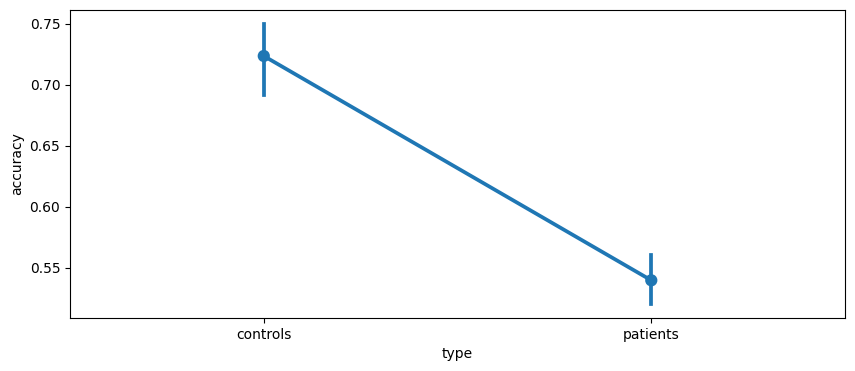

In [64]:
plt.subplots(figsize=(10,4))
sns.pointplot(data=accuracy, x='type',y='accuracy')

#### Merge revcor measures

In [65]:
revcor_measures = distances.merge(internal_noise_measures, how='left',on= trial_ids).merge(accuracy, how='left', on=trial_ids )

In [66]:
revcor_measures.groupby(['type','session']).agg({'subject':'count',
                                                                'kernel_typicality':['mean','std'],
                                                                'internal_noise_with_criteria':['mean','std','max'],
                                                                'criteria':['mean','std'],
                                                                'accuracy':['mean','std']})

subject kernel_typicality            \
                   count              mean       std   
type     session                                       
controls 1            22          0.933056  0.106220   
         2             7          0.966704  0.017931   
patients 1            22          0.665964  0.255932   
         2             9          0.396028  0.234057   
         3             9          0.587154  0.247253   
         4             9          0.537137  0.263884   

                 internal_noise_with_criteria                  criteria  \
                                         mean       std   max      mean   
type     session                                                          
controls 1                           0.890909  0.967525  4.90  0.686364   
         2                           0.542857  0.367909  1.20  0.321429   
patients 1                           2.543182  1.900332  4.90  1.781818   
         2                           3.683333  1.706239  5.00  1.577778   
         3                           3.083333  1.753390  4.95  0.950000   
         4                           2.911111  1.365141  4.95  2.122222   

                            accuracy            
                       std      mean       std  
type     session                                
controls 1        0.941147  0.707879  0.085638  
         2        0.232481  0.772381  0.045122  
patients 1        1.702907  0.559394  0.082933  
         2        0.841914  0.497778  0.035277  
         3        0.826136  0.547407  0.046838  
         4        2.221220  0.525185  0.054750

#### Controls consistency

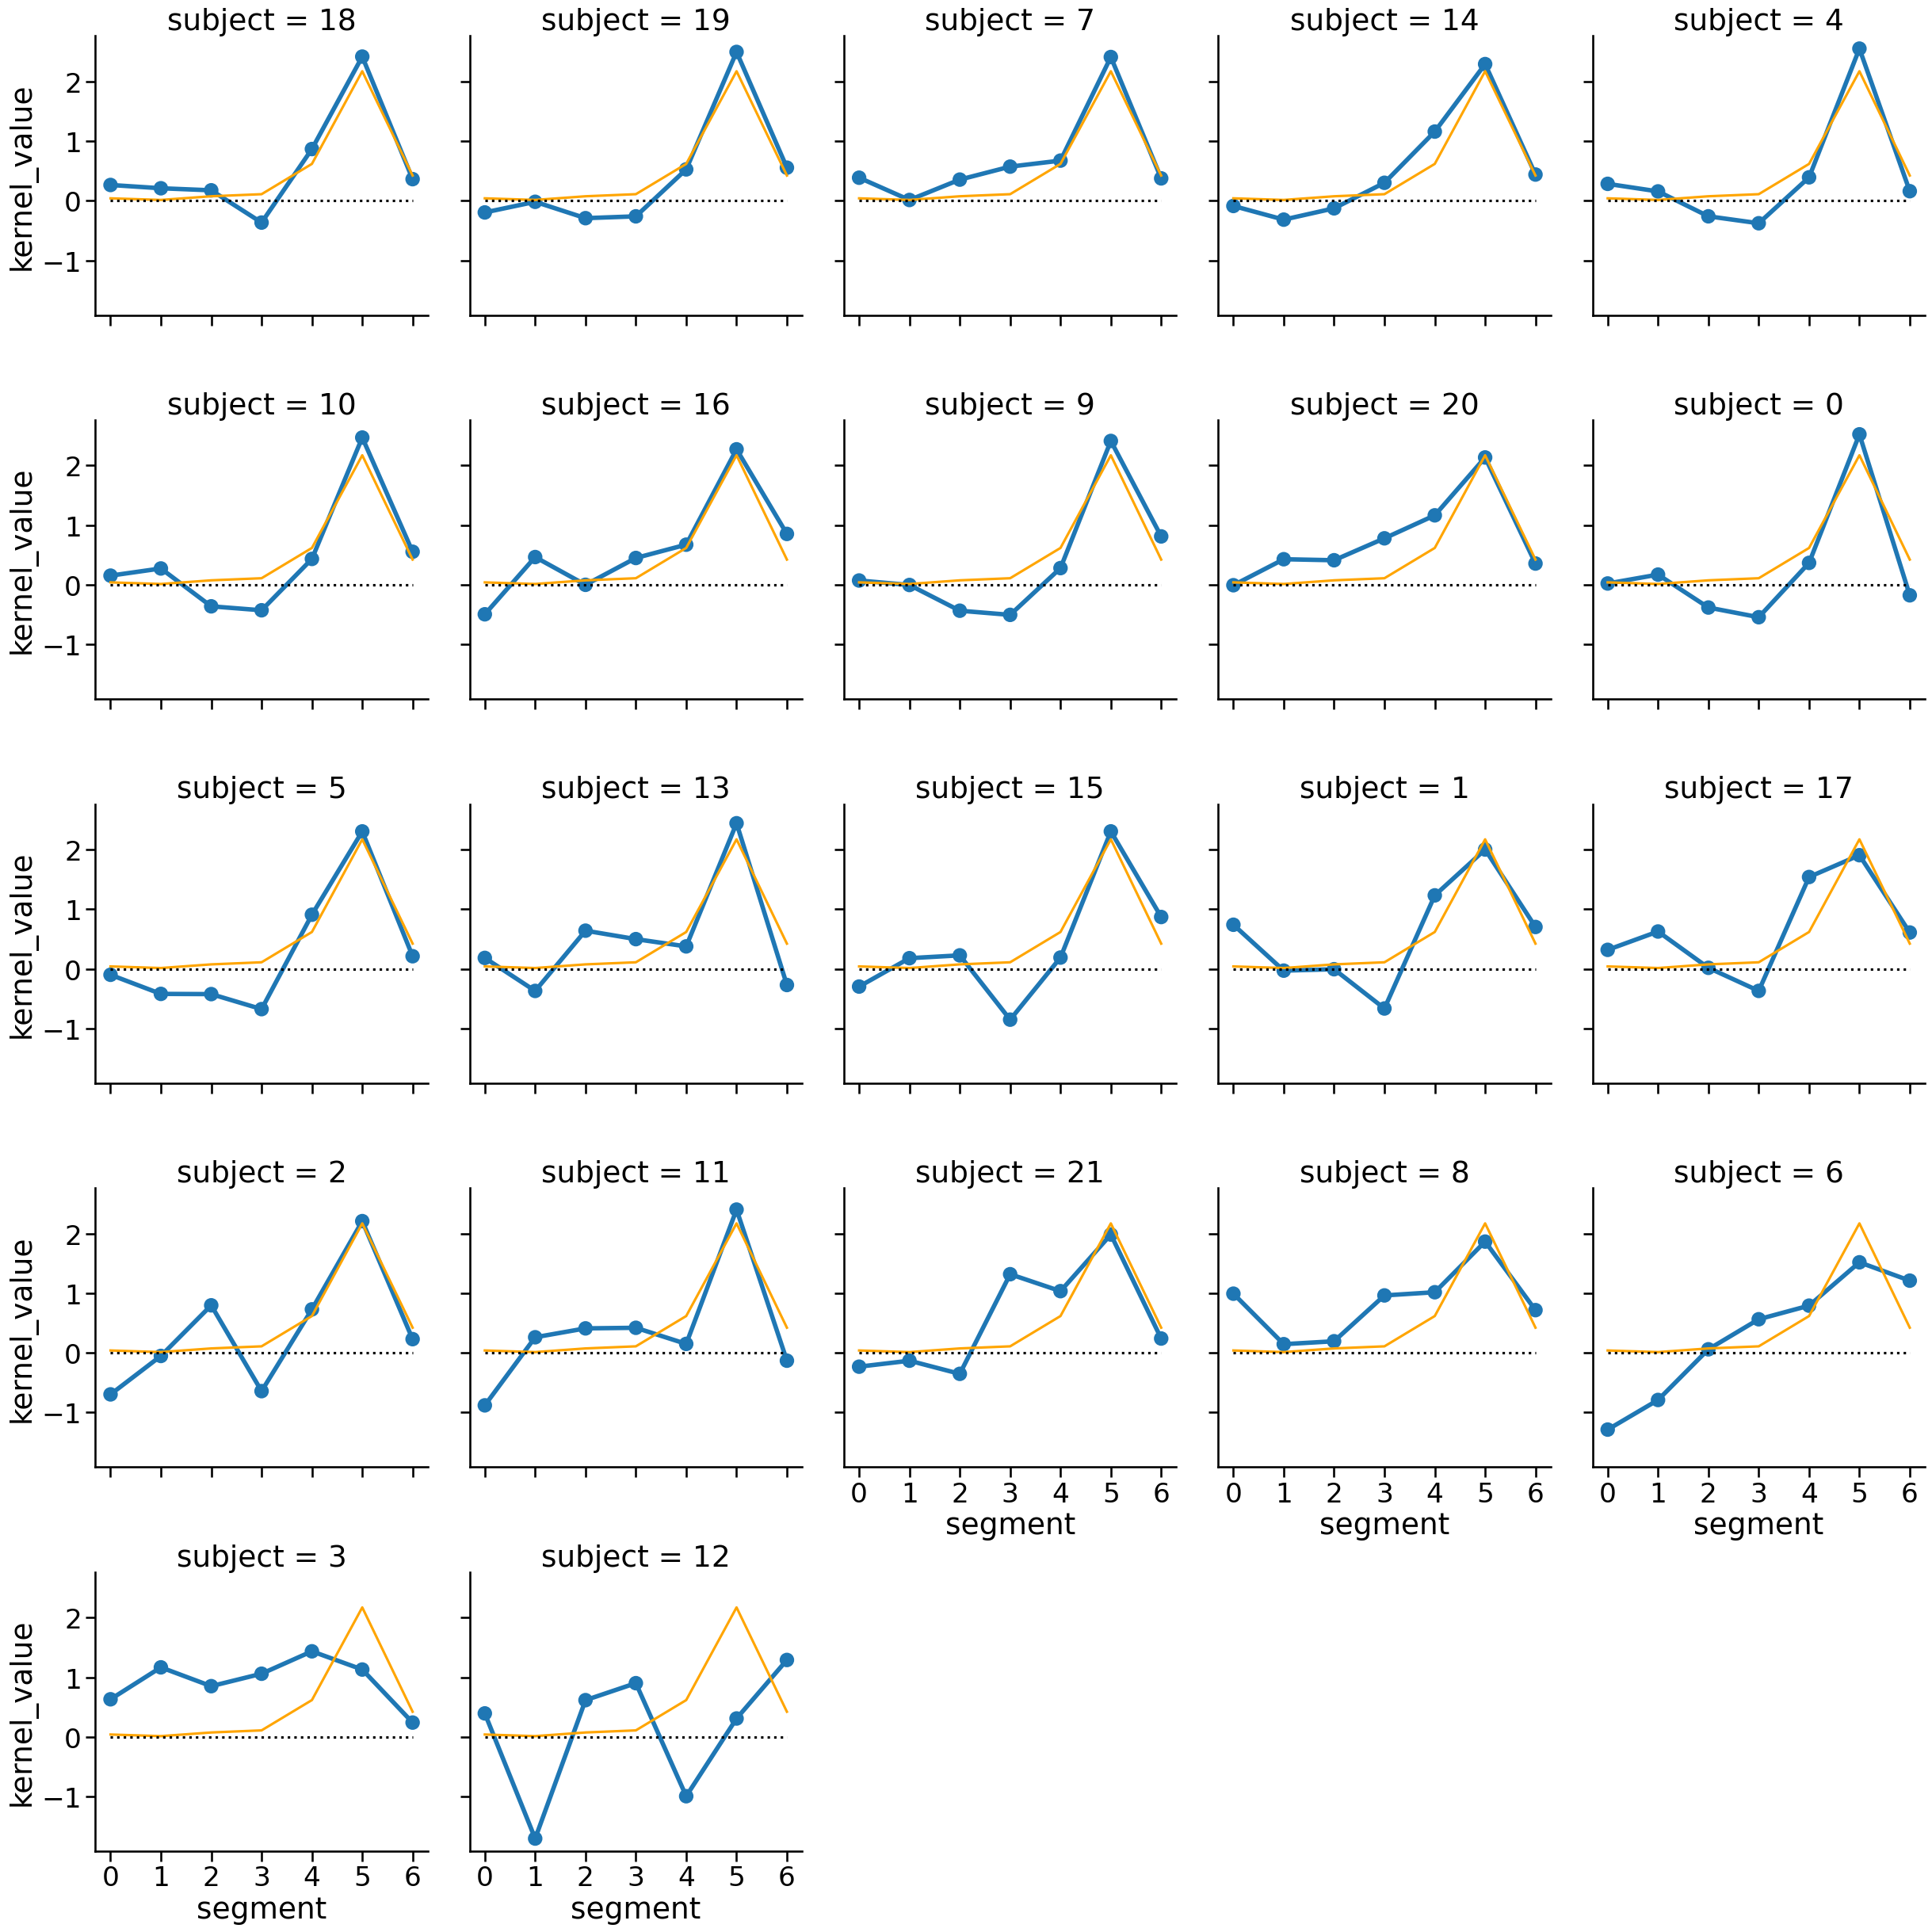

In [67]:
sns.set_context('talk', font_scale=1.5) 
controls_sorted = revcor_measures[(revcor_measures.type=='controls')
                                &(revcor_measures.session==1)].sort_values(by='kernel_distance').subject.values

g = sns.catplot(x="segment", 
                y="kernel_value",
                col = "subject",
                col_order = controls_sorted,
                col_wrap=5,
                data=kernels[(kernels.type=='controls')&(kernels.session==1)], 
                kind='point')
control_kernels = kernels[kernels.type=='controls'].groupby('segment')['kernel_value'].mean().reset_index()
axes =  g.axes.flatten()
for axis in axes:
    axis.plot(control_kernels['segment'], control_kernels['kernel_value'], color='orange')
    axis.plot([0,6],[0,0],color='k',linestyle = ':')

Note: kernel typicality & internal noise are (negatively) correlated 

### Statistics utility functions

In [69]:
custom_palette = {"controls": sns.color_palette()[1], "patients": sns.color_palette()[0]}

def explore_distribution(data, group, measures):
    
    for measure in measures:
        plt.figure(figsize=(22,10))
        plt.suptitle(measure.capitalize(), fontsize=12, y=1.05)

        plt.subplot(1, 3, 1)
        sns.histplot(x=data[measure], kde=True, hue=data[group], multiple='stack', palette=custom_palette)
        plt.xlabel(measure.capitalize())

        plt.subplot(1, 3, 2)
        probplot(data[measure], plot=plt)

        plt.subplot(1, 3, 3)
        sns.boxplot(x=group, y=measure, data=data, palette=custom_palette)
        plt.xlabel(group.capitalize())
        plt.ylabel(measure.capitalize())
        plt.tight_layout()

        plt.show()

<b>Group comparisons</b>: because distributions of representation typicality and internal noise scores between patients and controls were non-normal, we compared population means using non-parametric (Mann-Whitney) independent sample t-tests.

In [70]:
def display_group_comparisons_stat(data, group, measures):
    
    fig = plt.figure(figsize=(20,5))
    num_plots = len(measures)
    
    for num_measure, measure in enumerate(measures):
        
        data = data.dropna(subset=[measure, group])
        
        group1 = data[data[group]==data[group].unique()[0]][measure]
        group2 = data[data[group]==data[group].unique()[1]][measure]
        U_stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')
        r = 1 - (2*U_stat)/(len(group1)*len(group2))
        mean1 = group1.mean()
        mean2 = group2.mean()

        median1 = group1.median()
        median2 = group2.median()

        # Bootstrapping for confidence interval of median difference
        n_bootstraps = 10000
        boot_median_differences = []
        boot_mean_differences = []
        
        for i in range(n_bootstraps):
            
            boot_group1 = group1.sample(len(group1), replace=True)
            boot_group2 = group2.sample(len(group2), replace=True)
            # bootstrap mean
            boot_mean_difference = boot_group1.mean() - boot_group2.mean()
            boot_mean_differences.append(boot_mean_difference)
            # bootstrap median
            boot_median_difference = boot_group1.median() - boot_group2.median()
            boot_median_differences.append(boot_median_difference)
        # CI on mean
        boot_mean_differences.sort()
        mean_CI_low = boot_mean_differences[int(n_bootstraps*0.025)]
        mean_CI_high = boot_mean_differences[int(n_bootstraps*0.975)]
        # CI on median
        boot_median_differences.sort()
        median_CI_low = boot_median_differences[int(n_bootstraps*0.025)]
        median_CI_high = boot_median_differences[int(n_bootstraps*0.975)]

        # report the result
        print('------------------------------------')
        print('Mann-Whitney U Test for', measure.upper(), 'and', group.upper())
        print(f"Med = {median1-median2:.2f} [{median_CI_low:.2f} - {median_CI_high:.2f}]")
        print(f"M = {mean1-mean2:.2f} [{mean_CI_low:.2f} - {mean_CI_high:.2f}], U={U_stat:.2f}, r={r:.2f}, p={p_val:.3f}")

In [71]:
from scipy.stats import mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt

def display_group_comparisons_stat(data, group, measures):
    # Initialize a figure for plotting
    fig = plt.figure(figsize=(20, 5))
    num_plots = len(measures)
    # Bonferroni corrected alpha level
    alpha = 0.05 / num_plots
    
    for num_measure, measure in enumerate(measures):
        # Drop missing values for the current measure and group
        data_subset = data.dropna(subset=[measure, group])
        
        # Split data into two groups based on the unique values in the group column
        group1 = data_subset[data_subset[group] == data_subset[group].unique()[0]][measure]
        group2 = data_subset[data_subset[group] == data_subset[group].unique()[1]][measure]
        
        # Perform the Mann-Whitney U test
        U_stat, p_val_uncorrected = mannwhitneyu(group1, group2, alternative='two-sided')
        
        # Apply the Bonferroni correction
        p_val_corrected = p_val_uncorrected * num_plots
        # Ensure that the corrected p-value does not exceed 1
        p_val_corrected = min(p_val_corrected, 1)
        
        # Calculate effect size (r), mean, and median for the groups
        r = 1 - (2 * U_stat) / (len(group1) * len(group2))
        mean1 = group1.mean()
        mean2 = group2.mean()
        median1 = group1.median()
        median2 = group2.median()

        # Bootstrapping for confidence interval of median difference
        n_bootstraps = 10000
        boot_median_differences = []
        boot_mean_differences = []
        for i in range(n_bootstraps):
            boot_group1 = group1.sample(len(group1), replace=True)
            boot_group2 = group2.sample(len(group2), replace=True)
            # Bootstrap mean and median
            boot_mean_difference = boot_group1.mean() - boot_group2.mean()
            boot_mean_differences.append(boot_mean_difference)
            boot_median_difference = boot_group1.median() - boot_group2.median()
            boot_median_differences.append(boot_median_difference)
        
        # Confidence intervals on mean and median
        boot_mean_differences.sort()
        mean_CI_low = boot_mean_differences[int(n_bootstraps * 0.025)]
        mean_CI_high = boot_mean_differences[int(n_bootstraps * 0.975)]
        boot_median_differences.sort()
        median_CI_low = boot_median_differences[int(n_bootstraps * 0.025)]
        median_CI_high = boot_median_differences[int(n_bootstraps * 0.975)]

        # Report the results with corrected p-value
        print('------------------------------------')
        print('Mann-Whitney U Test for', measure.upper(), 'and', group.upper())
        print(f"Med = {median1 - median2:.2f} [{median_CI_low:.2f} - {median_CI_high:.2f}]")
        print(f"M = {mean1 - mean2:.2f} [{mean_CI_low:.2f} - {mean_CI_high:.2f}], U={U_stat:.2f}, r={r:.2f}, p (uncorrected)={p_val_uncorrected:.3f}, p (Bonferroni corrected)={p_val_corrected:.3f}")


<b> Correlation with clinical measures:</b> linear associations between representation typicality and internal noise, and clinical assessments (MEC, Prosody Comprehension, Prosody Repetition, Airtac2) met the homoskedasticity assumption and were therefore estimated using ordinary least-square regressions without robust (HC) norms, as these are considered to increase false positive rates when testing small samples (Nikitina, Paidi & Furuoka, 2019). In addition, because regression residuals were non-normal, we estimated statistical significance using bootstrapped confidence intervals.

<small> Nikitina L, Paidi R, Furuoka F. Using bootstrapped quantile regression analysis for small sample research in applied linguistics: Some methodological considerations. Baxter GJ, ed. PLOS ONE. 2019;14(1):e0210668. doi:10.1371/journal.pone.0210668


In [72]:
def display_regressions(data, predictor, outcomes, controls=[]): 
    
    fig = plt.figure(figsize=(20,5))
    num_plots = len(outcomes)
    
    for num_outcome, outcome in enumerate(outcomes):
        plt.subplot(1,num_plots,num_outcome+1)
        sns.regplot(y=outcome,
                    x=predictor,
                    data=data)
        plt.ylabel(outcome.capitalize())
        plt.xlabel(predictor.capitalize())
        plt.title(outcome.capitalize(), size=8)
        
        print('------------------------------------')
        formula = ' + '.join(['%s ~ %s'%(outcome, predictor)] + ['%s'%control for control in controls])
        #        formula='%s ~ %s '%(outcome, measure)
        #with capture_output() as c:
        stats = Lm(formula=formula,
                  data=data.dropna(subset=[predictor,outcome]+controls)).fit(verbose=False, 
                                                                             conf_int ='boot',
                                                                             summarize =True)
        print(formula.upper())
        print(stats)
        #print(model.fit())
    plt.tight_layout()
    

In [73]:
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

def display_regressions(data, predictor, outcomes, controls=[]):
    fig = plt.figure(figsize=(20, 5))
    num_plots = len(outcomes)
    # Bonferroni corrected alpha level
    alpha = 0.05 / num_plots
    
    for num_outcome, outcome in enumerate(outcomes):
        plt.subplot(1, num_plots, num_outcome + 1)
        sns.regplot(y=outcome,
                    x=predictor,
                    data=data)
        plt.ylabel(outcome.capitalize())
        plt.xlabel(predictor.capitalize())
        plt.title(outcome.capitalize(), size=8)
        
        print('------------------------------------')
        formula = ' + '.join([f'{outcome} ~ {predictor}'] + [f'{control}' for control in controls])
        model = smf.ols(formula=formula, data=data.dropna(subset=[predictor, outcome] + controls)).fit()
        
        # Apply the Bonferroni correction
        p_vals_corrected = model.pvalues * num_plots
        # Ensure that the corrected p-values do not exceed 1
        p_vals_corrected = p_vals_corrected.apply(lambda x: min(x, 1))
        
        # Print the formula and results with corrected p-values
        print(formula.upper())
        print(model.summary())
        print("\nCorrected p-values for multiple testing:")
        print(p_vals_corrected)
    
    plt.tight_layout()

# Note: This code assumes you have a function or package `Lm` that behaves like `statsmodels.formula.api.ols`.
# If Lm is part of a custom package, you'll need to adjust the code to apply the p-value correction correctly.


In [74]:
def display_regressions_assumptions(data, predictor, outcomes, controls=[]):
    fig = plt.figure(figsize=(20, 5))
    num_plots = len(outcomes)

    for num_outcome, outcome in enumerate(outcomes):
        plt.subplot(1, num_plots, num_outcome + 1)
        sns.regplot(y=outcome, x=predictor, data=data)
        plt.ylabel(outcome.capitalize())
        plt.xlabel(predictor.capitalize())
        plt.title(outcome.capitalize(), size=8)

        #print('------------------------------------')
        formula = ' + '.join(['%s ~ %s' % (outcome, predictor)] + ['%s' % control for control in controls])
        with capture_output() as c:
            model = ols(formula, data=data.dropna(subset=[predictor, outcome] + controls)).fit()
        print(formula.upper())
        #print(model.summary())

        # Normality test of residuals
        print("\nNormality Test of Residuals for %s" % outcome)
        print("------------------------------------")
        stat, p_ks = kstest_fit(model.resid)
        stat, p_ad = normal_ad(model.resid)
        print(f"p-value for normality: AD {p_ad:.4f} KS {p_ks:.4f}")
        
        # Homoscedasticity test of residuals
        print("\nHomoscedasticity Test of Residuals for %s" % outcome)
        print("------------------------------------")
        stat, p, _, _ = het_breuschpagan(model.resid, model.model.exog)
        print(f"p-value for homoscedasticity: {p:.4f}")

    plt.tight_layout()
    plt.tight_layout()

## Results

### Outlier control participant

Although we collected data from N=22 control participants, matching the number of patients, one control participant (#6) had an abnormally high level of internal noise (IN=4.9), which is more than 10 SD > the mean M=0.7. Although this participant did not exhibit any obvious sign of technical problem (all trials completed), their performance metrics were in the most extreme range of the group: their response time to trial blocks 2 and 3, reps. 764ms and 777ms, are in the lowest 30% quantile of all responses; their probability of answering the first response option (p=0.73) is in the top 25% quantile, and their agreement probability in the lowest 25% quantile of all controls, perhaps suggesting that this participant's performance did not reflect cognitive diversity, but rather a low-engagement in the procedure (conducted online for controls 0-14). 

In [75]:
revcor_measures = pd.read_csv("data/revcor_measures.csv", index_col=0)
revcor_measures[revcor_measures.subject==6]

experimentor      type  subject  session  kernel_distance  \
6        aynaz  controls        6        1         0.527155   

   kernel_typicality  p_int1  pc_agree  criteria  \
6           0.848117    0.73      0.58      4.05   

   internal_noise_with_criteria  accuracy  
6                           4.9      0.62

In [76]:
revcor_measures[(revcor_measures.subject!=6)&(revcor_measures.type=='controls')&(revcor_measures.session==1)].internal_noise_with_criteria.describe()

count    21.0000
mean      0.7000
std       0.3755
min       0.3000
25%       0.4000
50%       0.6000
75%       0.8500
max       1.7500
Name: internal_noise_with_criteria, dtype: float64

In [77]:
revcor_data=pd.read_csv("data/revcor_data.csv", index_col=0)
revcor_data[revcor_data.subject==6].groupby(['block']).rt.mean()

block
1    2277.62
2     764.16
3     777.28
Name: rt, dtype: float64

In [78]:
revcor_data[(revcor_data.session==1)&(revcor_data.subject!=6)&(revcor_data.type=='controls')].rt.quantile(0.3)

769.6999999999989

In [79]:
revcor_measures[(revcor_measures.session==1)&(revcor_data.subject!=6)&(revcor_data.type=='controls')].p_int1.describe()

count    44.000000
mean      0.449091
std       0.184552
min       0.000000
25%       0.340000
50%       0.480000
75%       0.542500
max       0.840000
Name: p_int1, dtype: float64

In [80]:
revcor_measures[(revcor_measures.session==1)&(revcor_data.subject!=6)&(revcor_data.type=='controls')].pc_agree.quantile(0.24)

0.5863999999999999

For all these reasons, in the following we have opted for excluding this control participant to the comparison with the patient group, this reducing our control group to N=21 participants. Statistical results conducted with the full control group (i.e. including control #6) are presented in supplementary information; they are qualitatively similar to our main-text conclusions. 

In [81]:
clinical_data = pd.read_csv("data/clinical_data.csv", index_col=0)
kernels = pd.read_csv('data/kernels.csv', index_col=0)
revcor_measures = pd.read_csv("data/revcor_measures.csv", index_col=0)
# excluding control participant #6
kernels=kernels[kernels['subject'] != 6].reset_index(drop=True)
clinical_data=clinical_data[clinical_data['subject'] != 6].reset_index(drop=True)
revcor_measures=revcor_measures[revcor_measures['subject'] != 6].reset_index(drop=True)

In [ ]:
print(kernels.groupby(['experimentor','session','type']).agg({'subject':'unique'}))
print(revcor_measures.groupby(['experimentor','session','type']).agg({'subject':'unique'}))
print(clinical_data.groupby(['experimentor','session','type']).agg({'subject':'unique'}))

In [83]:
#ages and sex normality assumption
controls_ages = clinical_data[clinical_data['type'] == 'controls']['age']
patients_ages = clinical_data[clinical_data['type'] == 'patients']['age']

print("Group 1 age normality:", shapiro(controls_ages))
print("Group 2 age normality:", shapiro(patients_ages))
mw_stat, mw_p_value = mannwhitneyu(controls_ages, patients_ages)
print("Mann-Whitney U test p-value:", mw_p_value)

contingency_table = pd.crosstab(clinical_data['type'], clinical_data['sex'])
contingency_table
chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test p-value:", chi2_p_value)

Group 1 age normality: ShapiroResult(statistic=0.9143752455711365, pvalue=0.06703412532806396)
Group 2 age normality: ShapiroResult(statistic=0.9193393588066101, pvalue=0.02267320081591606)
Mann-Whitney U test p-value: 0.9701493504330517
Chi-square test p-value: 0.36824879348693584


### Reverse correlation measures differentiate patients and controls 

While internal representations for both controls and kernels had a characteristic rising shape, patient representations significantly differed from controls ...

#### Comparison of kernel typicality

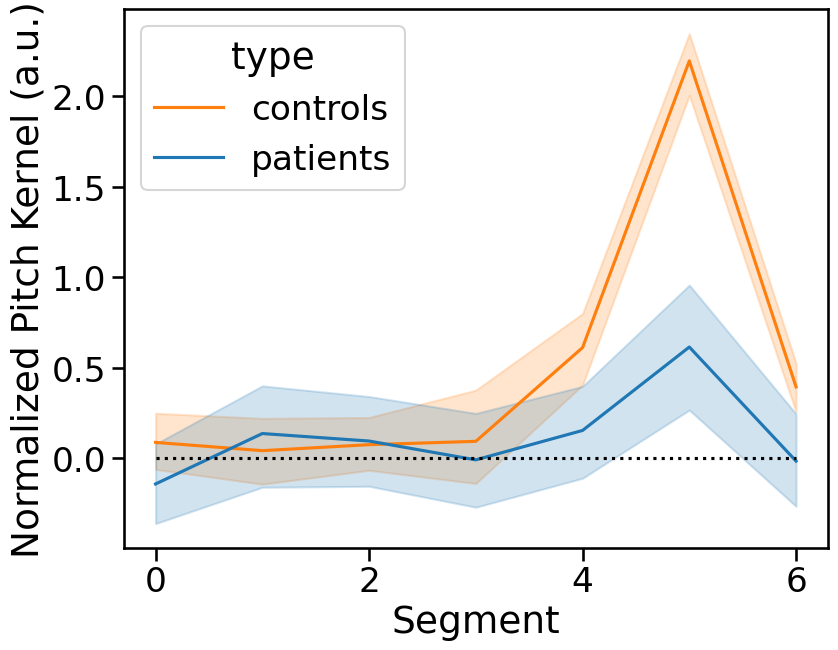

In [84]:
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
custom_palette = {"controls": sns.color_palette()[1], "patients": sns.color_palette()[0]}
sns.lineplot(x="segment", 
                  y="kernel_value",
                  hue ='type',
                  data=kernels,
             palette=custom_palette, 
                  ci=95)
plt.xlabel("Segment")
plt.ylabel("Normalized Pitch Kernel (a.u.)")
plt.plot([0,6],[0,0],color='k',linestyle = ':')

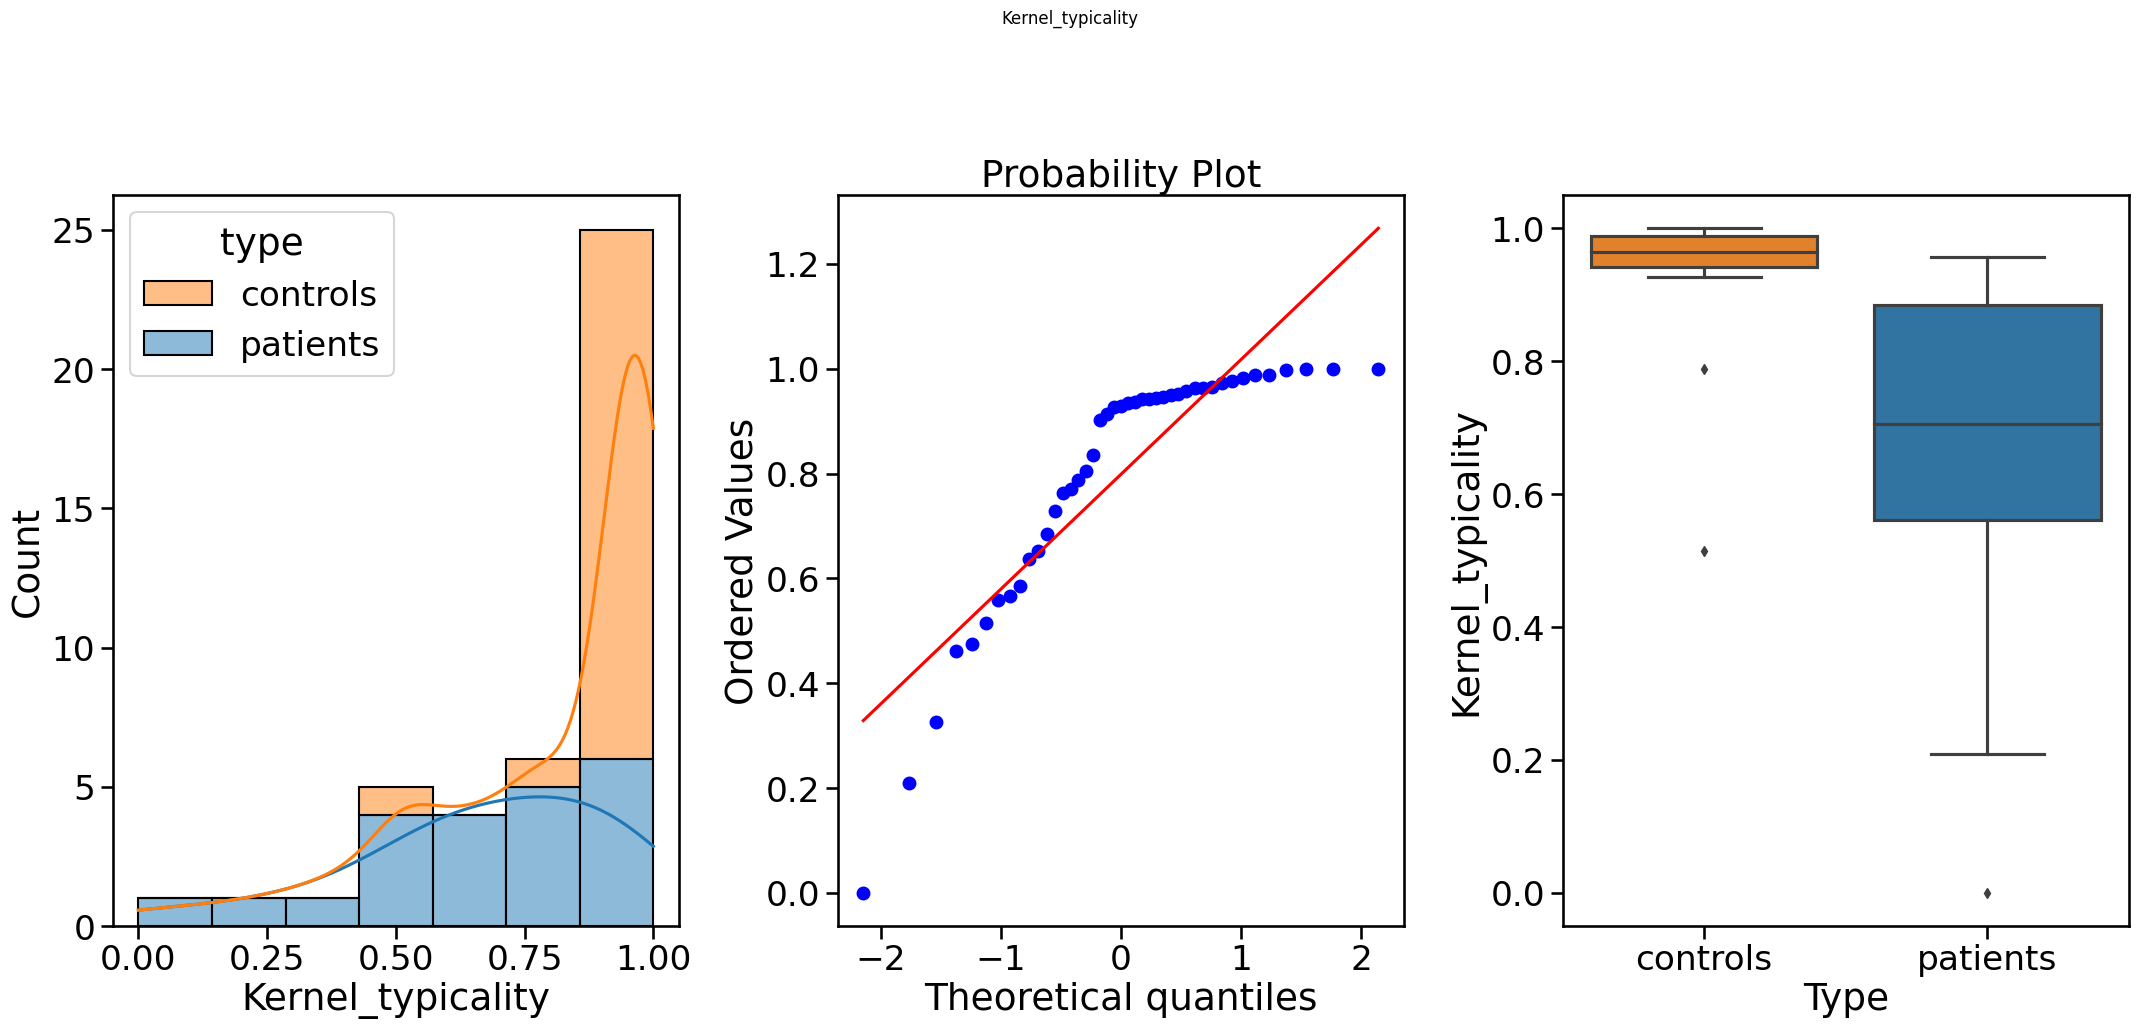

In [85]:
explore_distribution(data=revcor_measures[revcor_measures.session==1], group='type', measures = ['kernel_typicality'])

In [86]:
from scipy.stats import shapiro
df=revcor_measures[revcor_measures.session==1]
patients = df[df['type'] == 'patients']['kernel_typicality']
controls = df[df['type'] == 'controls']['kernel_typicality']

print("patients normality:", shapiro(patients))
print("controls normality:", shapiro(controls))

patients normality: ShapiroResult(statistic=0.913093090057373, pvalue=0.05476732552051544)
controls normality: ShapiroResult(statistic=0.5322815179824829, pvalue=4.0942381929198746e-07)


In [87]:
display_group_comparisons_stat(data=revcor_measures[revcor_measures.session==1], 
                               group='type', 
                               measures = ['kernel_typicality'])

------------------------------------
Mann-Whitney U Test for KERNEL_TYPICALITY and TYPE
Med = 0.26 [0.13 - 0.39]
M = 0.27 [0.16 - 0.39], U=420.00, r=-0.82, p (uncorrected)=0.000, p (Bonferroni corrected)=0.000


<Figure size 2000x500 with 0 Axes>

#### Comparison of internal noise

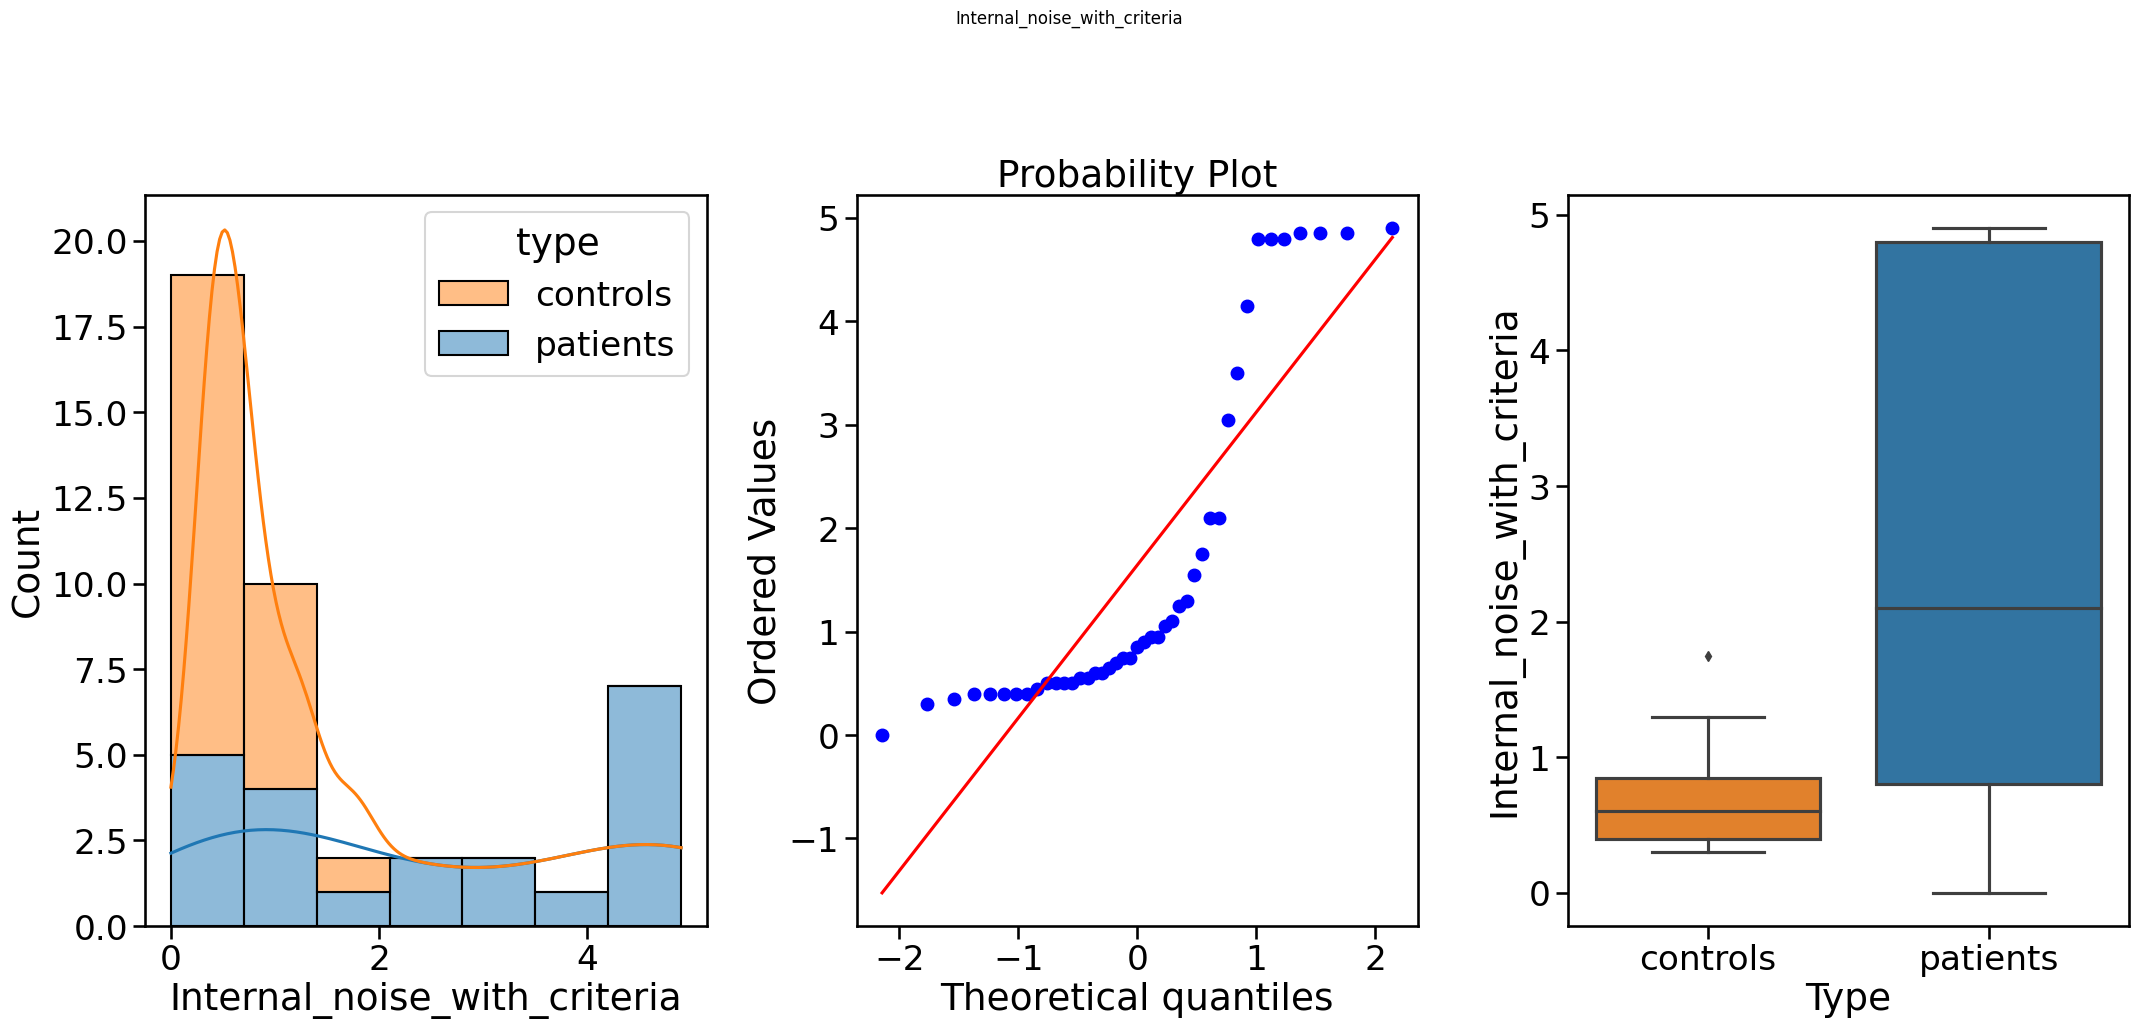

In [88]:
explore_distribution(data=revcor_measures[revcor_measures.session==1], group='type', measures = ['internal_noise_with_criteria'])

In [89]:
from scipy.stats import shapiro
df=revcor_measures[revcor_measures.session==1]
patients = df[df['type'] == 'patients']['internal_noise_with_criteria']
controls = df[df['type'] == 'controls']['internal_noise_with_criteria']

print("patients normality:", shapiro(patients))
print("controls normality:", shapiro(controls))

patients normality: ShapiroResult(statistic=0.8343663215637207, pvalue=0.00181852956302464)
controls normality: ShapiroResult(statistic=0.853102445602417, pvalue=0.00480622798204422)


In [90]:
display_group_comparisons_stat(data=revcor_measures[revcor_measures.session==1], group='type', measures = ['internal_noise_with_criteria'])

------------------------------------
Mann-Whitney U Test for INTERNAL_NOISE_WITH_CRITERIA and TYPE
Med = -1.50 [-3.92 - -0.30]
M = -1.84 [-2.62 - -1.05], U=95.00, r=0.59, p (uncorrected)=0.001, p (Bonferroni corrected)=0.001


<Figure size 2000x500 with 0 Axes>

#### Patient variability
We sort patients by decreasing similarity to the control group, and display each individual kernel

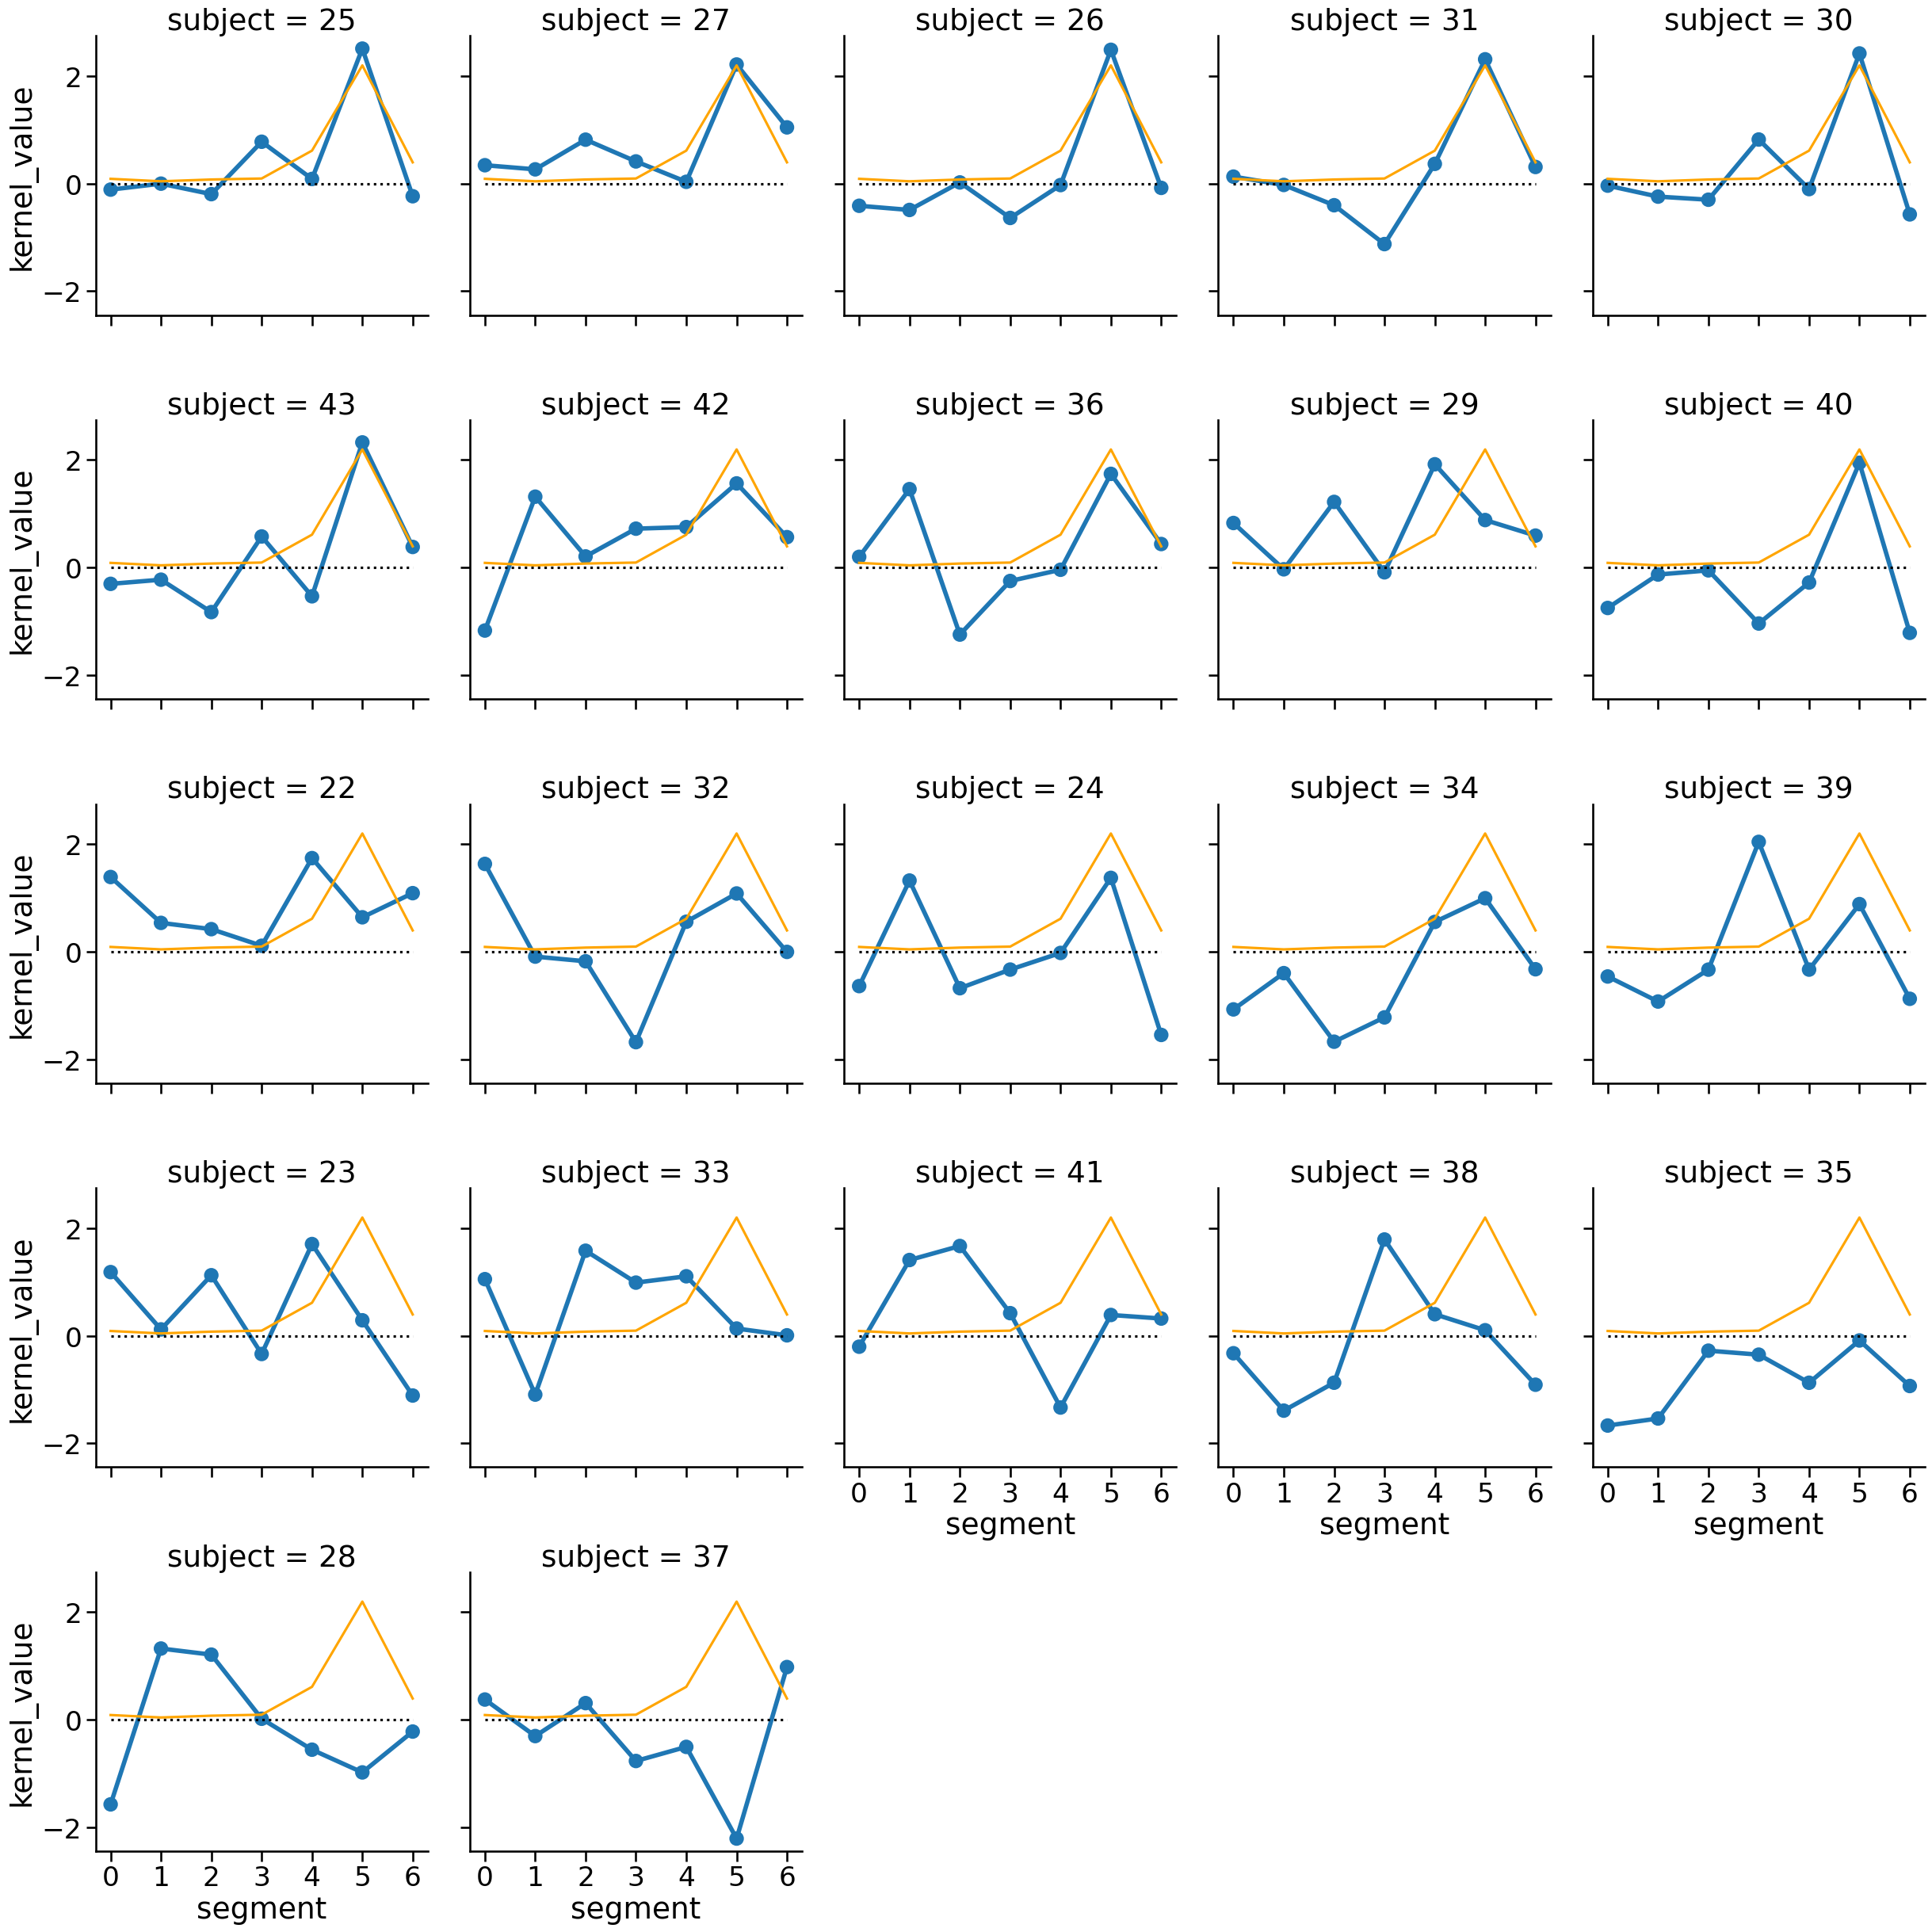

In [91]:
sns.set_context('talk', font_scale=1.5) 
patient_sorted = revcor_measures[(revcor_measures.type=='patients')
                                &(revcor_measures.session==1)].sort_values(by='kernel_distance').subject.values

g = sns.catplot(x="segment", 
                y="kernel_value",
                col = "subject",
                col_order = patient_sorted,
                col_wrap=5,
                data=kernels[(kernels.type=='patients')&(kernels.session==1)], 
                kind='point')

control_kernels = kernels[kernels.type=='controls'].groupby('segment')['kernel_value'].mean().reset_index()
axes =  g.axes.flatten()
for axis in axes:
    axis.plot(control_kernels['segment'], control_kernels['kernel_value'], color='orange')
    axis.plot([0,6],[0,0],color='k',linestyle = ':')

### Reverse correlation measures are correlated to deficits of prosodic perception as measured by MEC

We correlate revcor measures obtained within the patient group with the three MEC measures.


In [92]:
data = revcor_measures[revcor_measures.type=='patients'].merge(clinical_data[['experimentor','type','subject','session',
                                                                               'prosodie_C', 'prosodie_R', 'mec']], 
                                                               how='left',
                                                                on = ['experimentor','type','subject','session'])

<mark> Question whether data should be restricted to session = 1 (i.e. if different observations for the same patient should be counted as independent points) 

In [93]:
data =  data[data.session == 1]

##### MEC_total

KERNEL_TYPICALITY ~ MEC

Normality Test of Residuals for kernel_typicality
------------------------------------
p-value for normality: AD 0.0285 KS 0.1696

Homoscedasticity Test of Residuals for kernel_typicality
------------------------------------
p-value for homoscedasticity: 0.3888
INTERNAL_NOISE_WITH_CRITERIA ~ MEC

Normality Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for normality: AD 0.0249 KS 0.0283

Homoscedasticity Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for homoscedasticity: 0.2108
ACCURACY ~ MEC

Normality Test of Residuals for accuracy
------------------------------------
p-value for normality: AD 0.9826 KS 0.9896

Homoscedasticity Test of Residuals for accuracy
------------------------------------
p-value for homoscedasticity: 0.0408


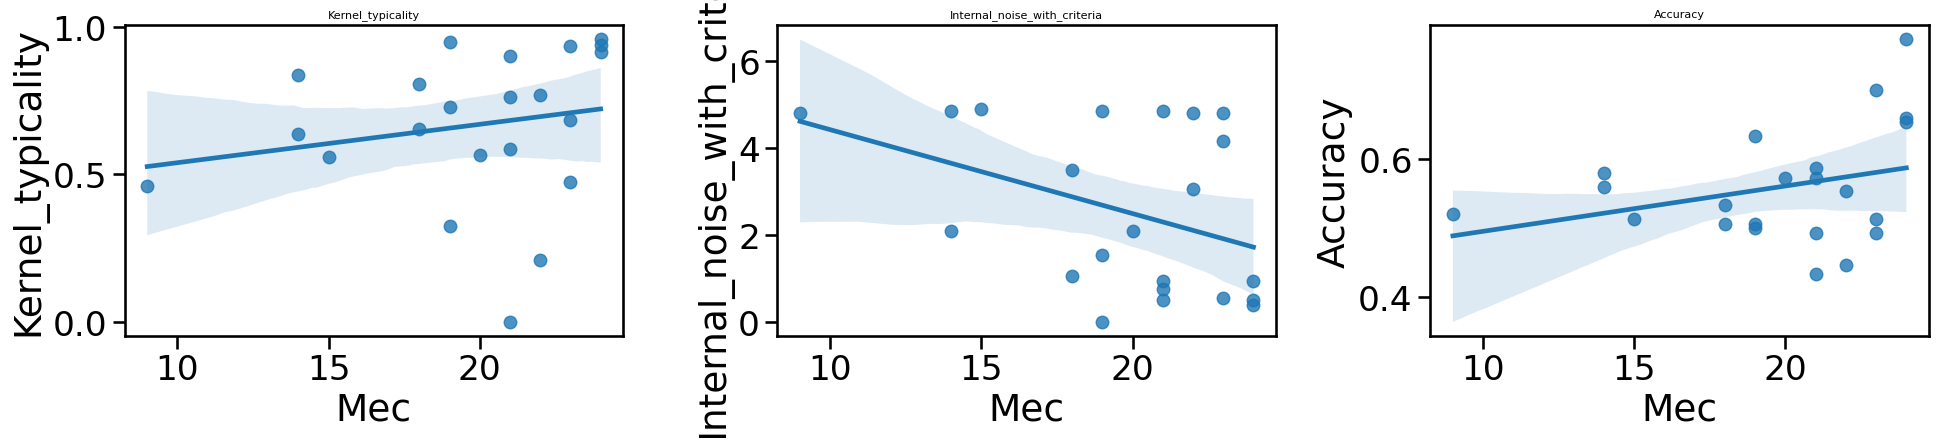

In [94]:
display_regressions_assumptions(data, predictor='mec', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

------------------------------------
KERNEL_TYPICALITY ~ MEC
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.8045
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.380
Time:                        12:20:08   Log-Likelihood:               -0.28853
No. Observations:                  22   AIC:                             4.577
Df Residuals:                      20   BIC:                             6.759
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

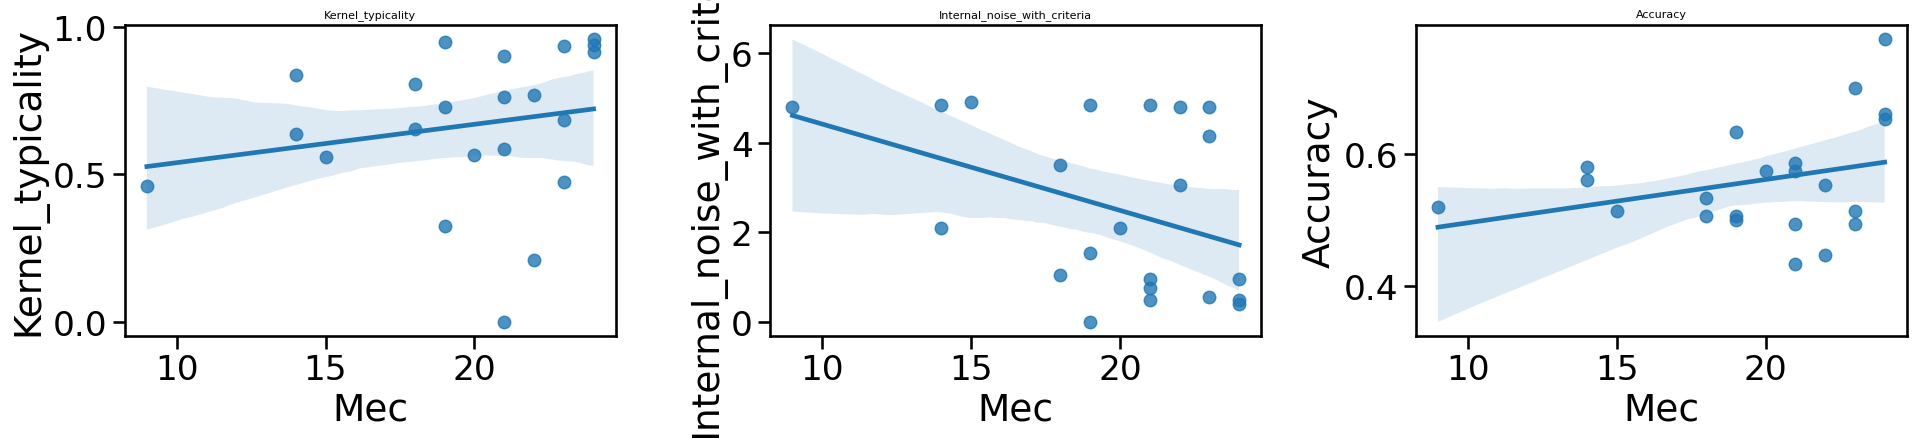

In [95]:
display_regressions(data, predictor='mec', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

##### MEC Comprehension

KERNEL_TYPICALITY ~ PROSODIE_C

Normality Test of Residuals for kernel_typicality
------------------------------------
p-value for normality: AD 0.0108 KS 0.1217

Homoscedasticity Test of Residuals for kernel_typicality
------------------------------------
p-value for homoscedasticity: 0.6140
INTERNAL_NOISE_WITH_CRITERIA ~ PROSODIE_C

Normality Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for normality: AD 0.0432 KS 0.0459

Homoscedasticity Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for homoscedasticity: 0.2927
ACCURACY ~ PROSODIE_C

Normality Test of Residuals for accuracy
------------------------------------
p-value for normality: AD 0.8976 KS 0.8536

Homoscedasticity Test of Residuals for accuracy
------------------------------------
p-value for homoscedasticity: 0.0869


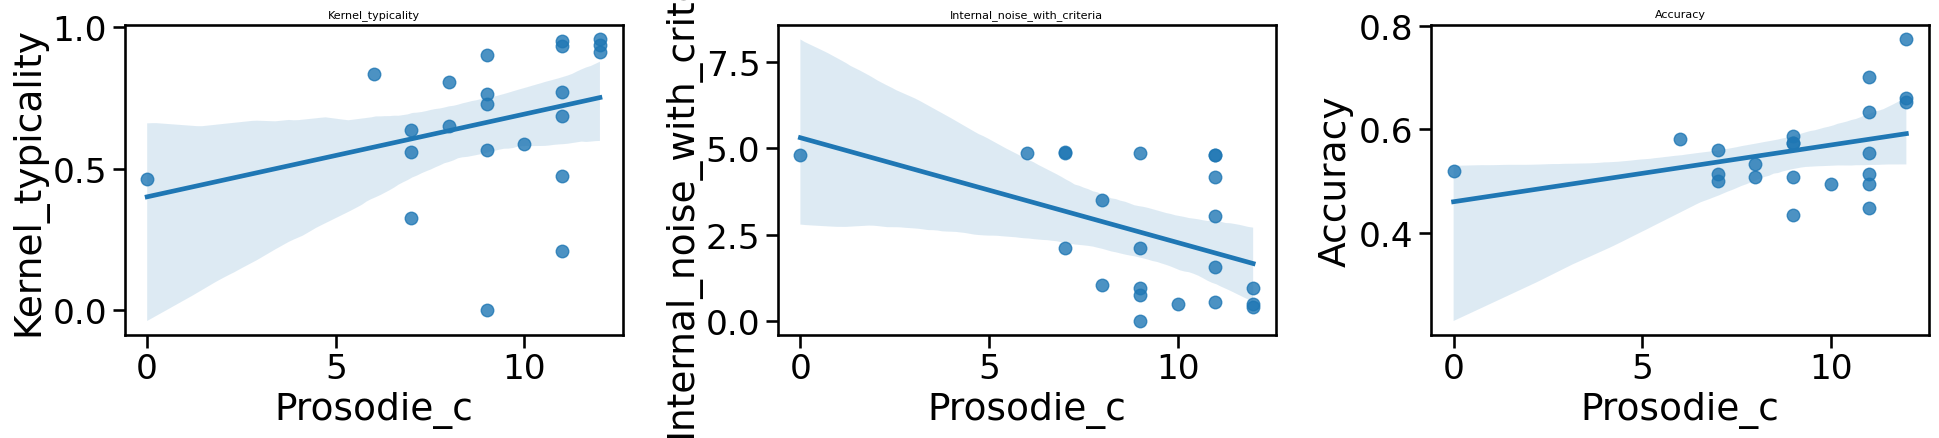

In [96]:
display_regressions_assumptions(data, predictor='prosodie_C', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

------------------------------------
KERNEL_TYPICALITY ~ PROSODIE_C
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.150
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.158
Time:                        12:20:09   Log-Likelihood:                0.40094
No. Observations:                  22   AIC:                             3.198
Df Residuals:                      20   BIC:                             5.380
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

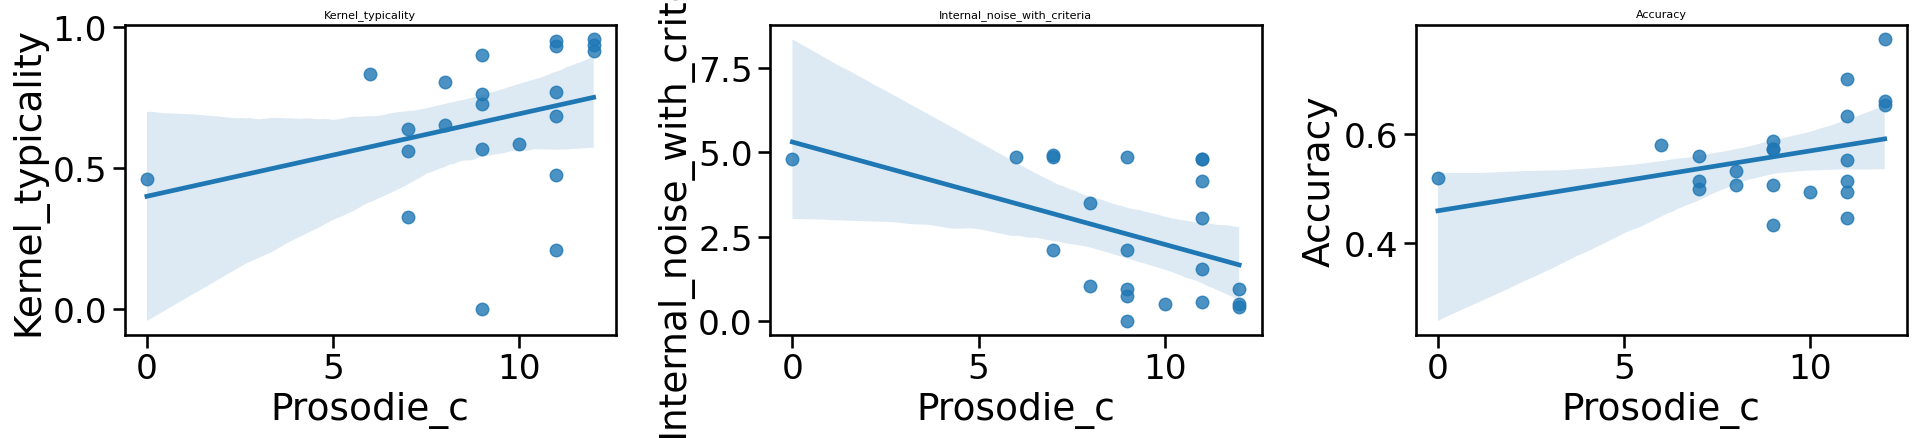

In [97]:
display_regressions(data, predictor='prosodie_C', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

##### MEC repetition

------------------------------------
KERNEL_TYPICALITY ~ PROSODIE_R
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                   0.05695
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.814
Time:                        12:20:10   Log-Likelihood:               -0.69107
No. Observations:                  22   AIC:                             5.382
Df Residuals:                      20   BIC:                             7.564
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

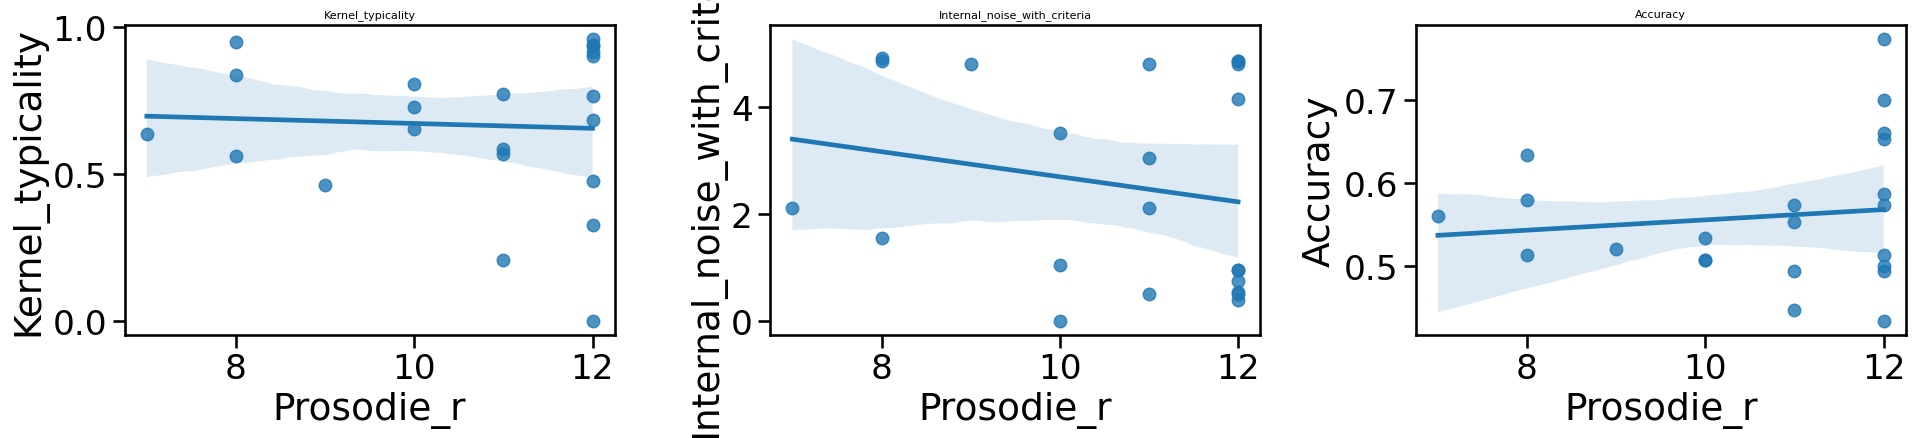

In [98]:
display_regressions(data, predictor='prosodie_R', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

KERNEL_TYPICALITY ~ PROSODIE_R

Normality Test of Residuals for kernel_typicality
------------------------------------
p-value for normality: AD 0.1958 KS 0.5770

Homoscedasticity Test of Residuals for kernel_typicality
------------------------------------
p-value for homoscedasticity: 0.1526
INTERNAL_NOISE_WITH_CRITERIA ~ PROSODIE_R

Normality Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for normality: AD 0.0014 KS 0.0010

Homoscedasticity Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for homoscedasticity: 0.3271
ACCURACY ~ PROSODIE_R

Normality Test of Residuals for accuracy
------------------------------------
p-value for normality: AD 0.4006 KS 0.6092

Homoscedasticity Test of Residuals for accuracy
------------------------------------
p-value for homoscedasticity: 0.0967


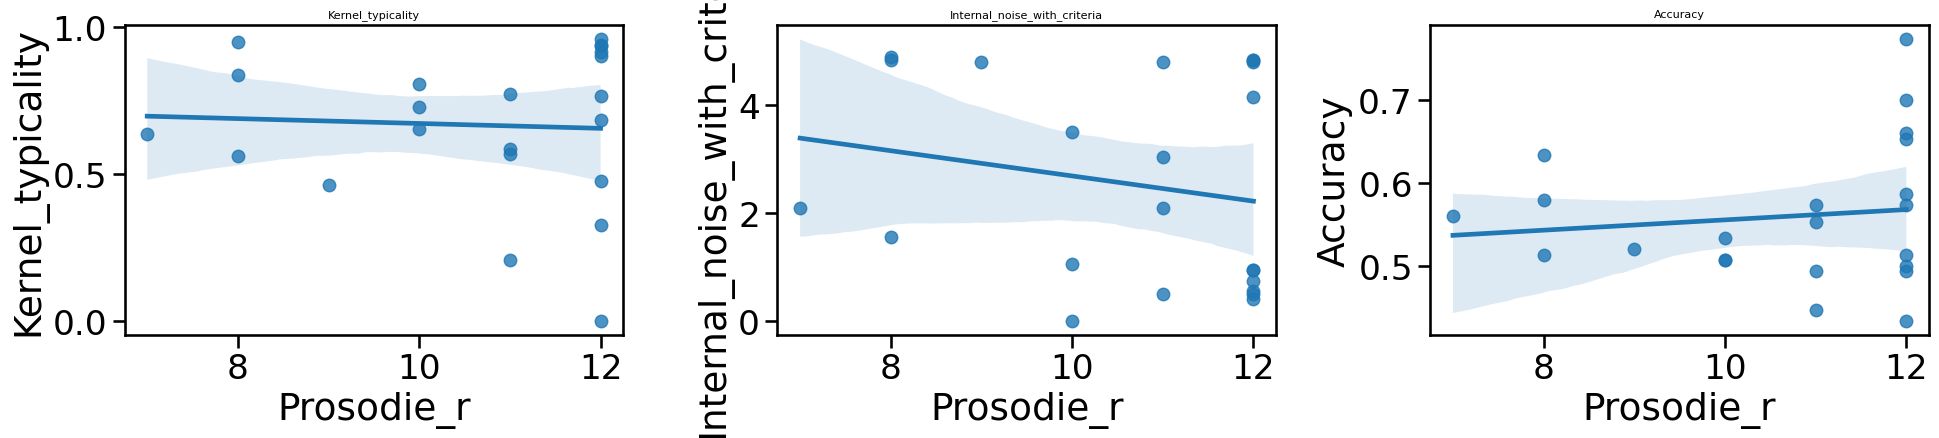

In [99]:
display_regressions_assumptions(data, predictor='prosodie_R', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

Note MEC comprehension and repetition are correlated

In [100]:
correlation = data['prosodie_C'].corr(data['prosodie_R'])
print(correlation)

0.5378348853755178


### Reverse correlation measures discriminate patients that are negative at MEC from controls

We compare here controls with patients that are negative at MEC. The cutoff criteria for MEC is scores <= 9. Some patients are negative on comprehension, others on repetition. 


#### Patients negative on comprehension

In [101]:
# list of high-functioning patients
neg_patients = clinical_data[(clinical_data.prosodie_C>9)].subject.unique()

In [102]:
data = revcor_measures[(revcor_measures.type=='controls') | (revcor_measures.subject.isin(neg_patients))]

In [103]:
data = data[data.session==1]
data.type.value_counts()

controls    21
patients    12
Name: type, dtype: int64

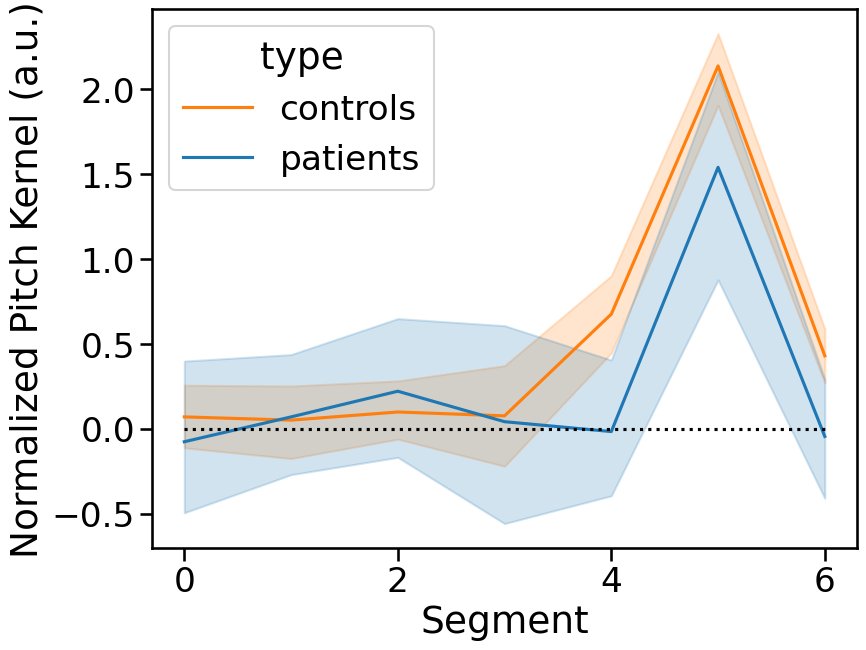

In [104]:
custom_palette = {"controls": sns.color_palette()[1], "patients": sns.color_palette()[0]}
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.lineplot(x="segment", 
                  y="kernel_value",
                  hue ='type',
                  data=kernels[(kernels.session==1) & 
                               ((kernels.type=='controls') | (kernels.subject.isin(neg_patients)))],
             palette=custom_palette,
                  ci=95)
plt.xlabel("Segment")
plt.ylabel("Normalized Pitch Kernel (a.u.)")
plt.plot([0,6],[0,0],color='k',linestyle = ':')

In [105]:
display_group_comparisons_stat(data=data, group='type', measures = ['kernel_typicality',
                                                                           'internal_noise_with_criteria'])

------------------------------------
Mann-Whitney U Test for KERNEL_TYPICALITY and TYPE
Med = 0.13 [0.02 - 0.33]
M = 0.18 [0.06 - 0.32], U=219.00, r=-0.74, p (uncorrected)=0.001, p (Bonferroni corrected)=0.001
------------------------------------
Mann-Whitney U Test for INTERNAL_NOISE_WITH_CRITERIA and TYPE
Med = -0.65 [-3.87 - 0.07]
M = -1.54 [-2.61 - -0.53], U=66.00, r=0.48, p (uncorrected)=0.026, p (Bonferroni corrected)=0.051


<Figure size 2000x500 with 0 Axes>

#### Patients negative on repetition

In [106]:
neg_patients = clinical_data[(clinical_data.prosodie_R>9)].subject.unique()

In [107]:
data = revcor_measures[(revcor_measures.type=='controls') | (revcor_measures.subject.isin(neg_patients))]

In [108]:
data = data[data.session==1]

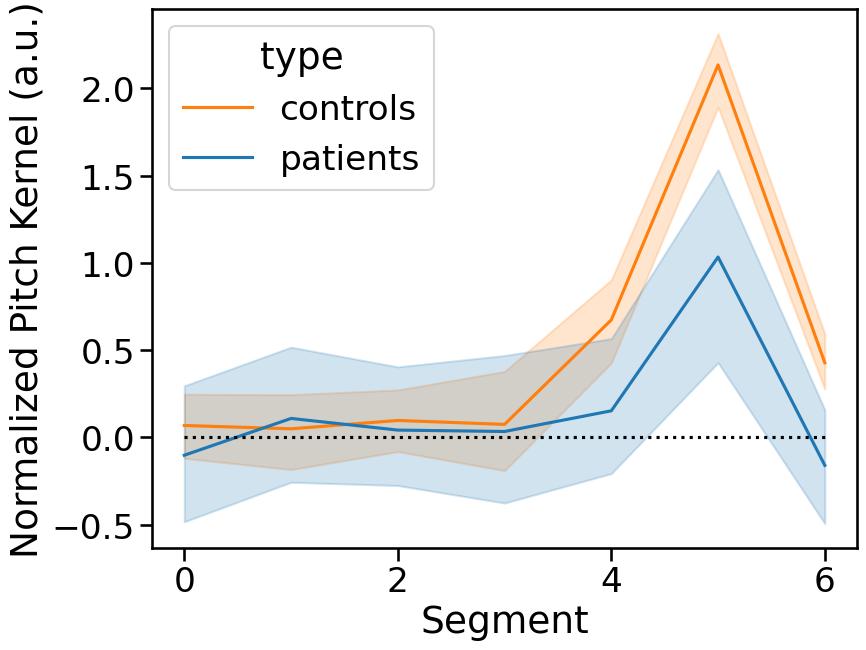

In [109]:
custom_palette = {"controls": sns.color_palette()[1], "patients": sns.color_palette()[0]}
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)

sns.lineplot(x="segment", 
                  y="kernel_value",
                  hue ='type',
                  data=kernels[(kernels.session==1) & 
                               ((kernels.type=='controls') | (kernels.subject.isin(neg_patients)))],
             palette=custom_palette, 
                  ci=95)

plt.xlabel("Segment")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

plt.plot([0,6],[0,0],color='k',linestyle = ':')

In [110]:
display_group_comparisons_stat(data=data, group='type', measures = ['kernel_typicality',
                                                                           'internal_noise_with_criteria'])

------------------------------------
Mann-Whitney U Test for KERNEL_TYPICALITY and TYPE
Med = 0.24 [0.13 - 0.40]
M = 0.28 [0.16 - 0.41], U=367.00, r=-0.84, p (uncorrected)=0.000, p (Bonferroni corrected)=0.000
------------------------------------
Mann-Whitney U Test for INTERNAL_NOISE_WITH_CRITERIA and TYPE
Med = -1.50 [-4.20 - -0.15]
M = -1.79 [-2.65 - -0.93], U=94.00, r=0.53, p (uncorrected)=0.004, p (Bonferroni corrected)=0.009


<Figure size 2000x500 with 0 Axes>

#### Patients negative both on repetition and comprehension

In [111]:
neg_patients = clinical_data[(clinical_data.prosodie_R>9)&(clinical_data.prosodie_C>9)].subject.unique()

In [112]:
data = revcor_measures[(revcor_measures.type=='controls') | (revcor_measures.subject.isin(neg_patients))]

In [113]:
data = data[data.session==1]

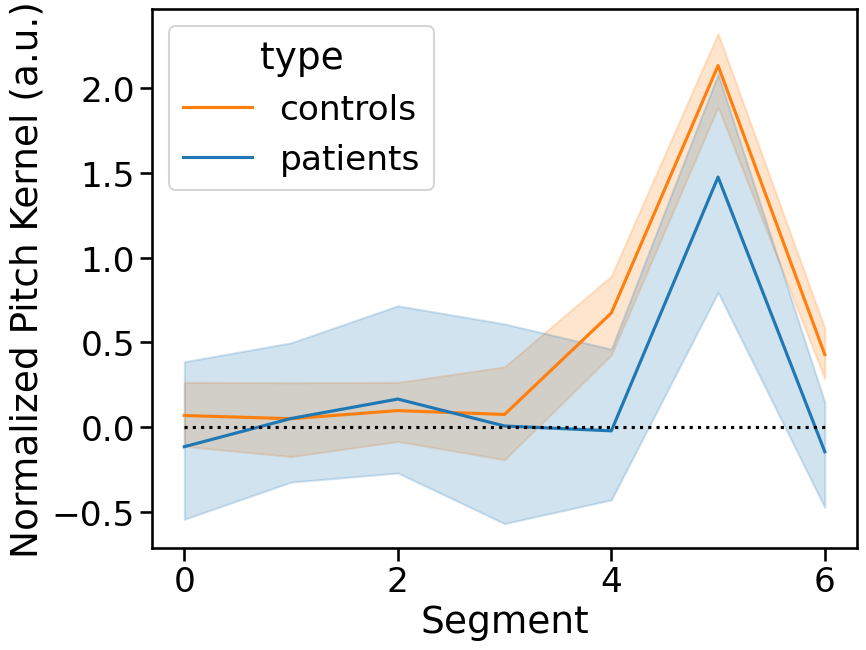

In [114]:
custom_palette = {"controls": sns.color_palette()[1], "patients": sns.color_palette()[0]}
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.lineplot(x="segment", 
                  y="kernel_value",
                  hue ='type',
                  data=kernels[(kernels.session==1) & 
                               ((kernels.type=='controls') | (kernels.subject.isin(neg_patients)))],
             palette=custom_palette, 
                  ci=95)
plt.xlabel("Segment")
plt.ylabel("Normalized Pitch Kernel (a.u.)")
plt.plot([0,6],[0,0],color='k',linestyle = ':')

In [115]:
display_group_comparisons_stat(data=data, 
                               group='type', 
                               measures = ['kernel_typicality','internal_noise_with_criteria'])

------------------------------------
Mann-Whitney U Test for KERNEL_TYPICALITY and TYPE
Med = 0.19 [0.03 - 0.38]
M = 0.20 [0.07 - 0.35], U=206.00, r=-0.78, p (uncorrected)=0.000, p (Bonferroni corrected)=0.001
------------------------------------
Mann-Whitney U Test for INTERNAL_NOISE_WITH_CRITERIA and TYPE
Med = -0.35 [-4.20 - 0.15]
M = -1.60 [-2.74 - -0.50], U=65.00, r=0.44, p (uncorrected)=0.047, p (Bonferroni corrected)=0.093


<Figure size 2000x500 with 0 Axes>

### Reverse correlation measures are sensitive to capacities indirectly related to the understanding of prosody

In [116]:
data = revcor_measures[revcor_measures.type=='patients'].merge(clinical_data[['experimentor','type','subject','session']+
                                                                             ['mec','prosodie_C','prosodie_R','airtac','airtac_int_discr','airtac_dur_discr',
                                                                              'lama_time','lama_prec','mbea_scale','mbea_total','mbea_diff_cont',
                                                                              'mbea_equ_cont']], 
                                                               how='left',
                                                               on = ['experimentor','type','subject','session'])
data =  data[data.session == 1]

#### AIRTAC

------------------------------------
PROSODIE_R ~ AIRTAC
                            OLS Regression Results                            
Dep. Variable:             prosodie_R   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.263
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.285
Time:                        12:20:25   Log-Likelihood:                -24.579
No. Observations:                  13   AIC:                             53.16
Df Residuals:                      11   BIC:                             54.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

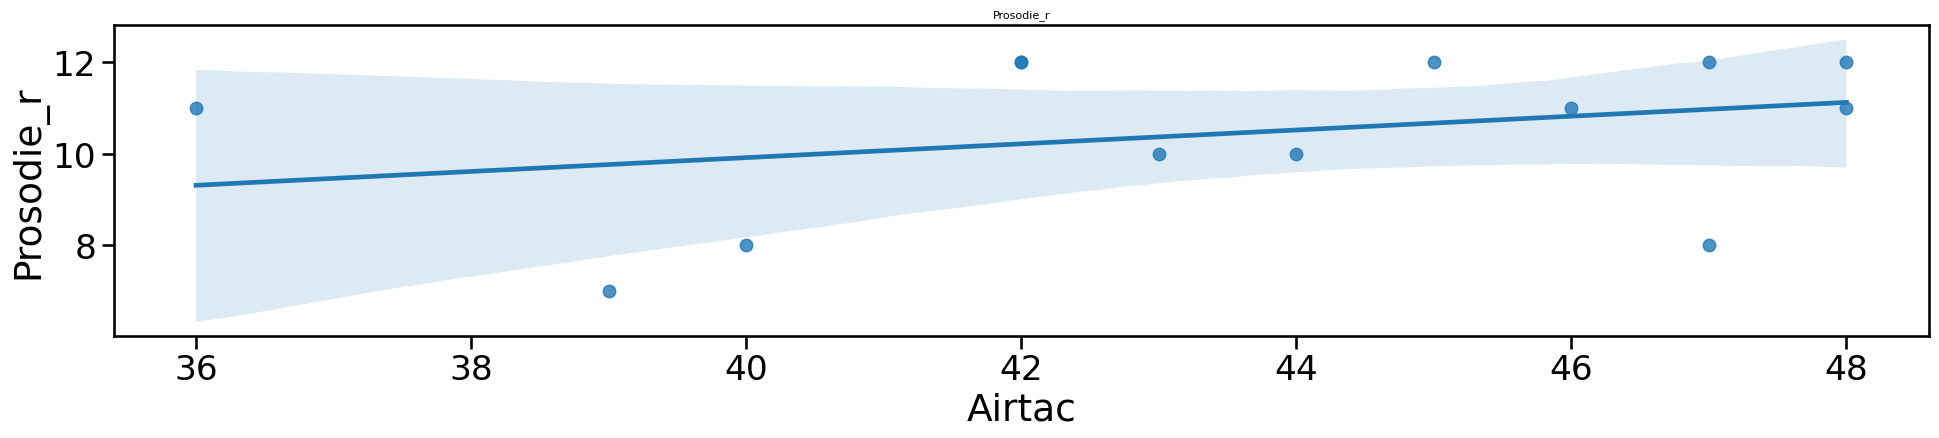

In [117]:
display_regressions(data, predictor='airtac', outcomes = ['prosodie_R'])

------------------------------------
KERNEL_TYPICALITY ~ AIRTAC
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     10.43
Date:                Fri, 29 Mar 2024   Prob (F-statistic):            0.00802
Time:                        12:20:25   Log-Likelihood:                 6.2826
No. Observations:                  13   AIC:                            -8.565
Df Residuals:                      11   BIC:                            -7.435
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

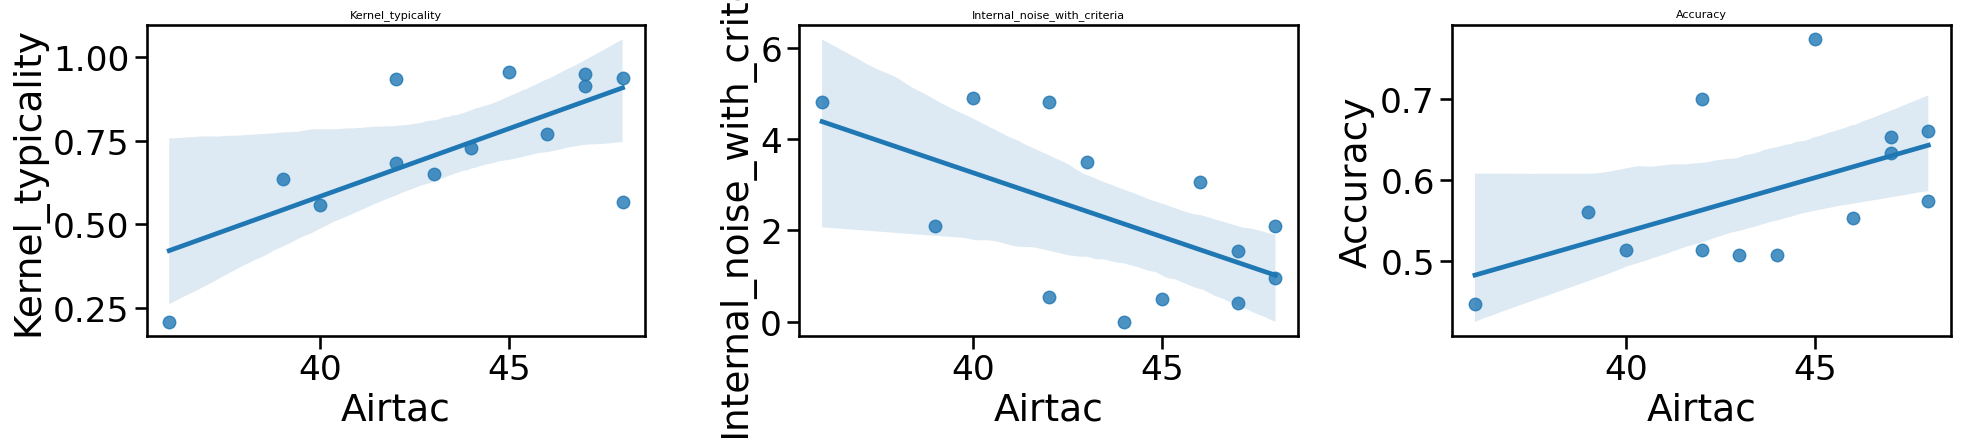

In [118]:
display_regressions(data, predictor='airtac',outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

KERNEL_TYPICALITY ~ AIRTAC

Normality Test of Residuals for kernel_typicality
------------------------------------
p-value for normality: AD 0.3663 KS 0.1650

Homoscedasticity Test of Residuals for kernel_typicality
------------------------------------
p-value for homoscedasticity: 0.8456
INTERNAL_NOISE_WITH_CRITERIA ~ AIRTAC

Normality Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for normality: AD 0.4352 KS 0.5326

Homoscedasticity Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for homoscedasticity: 0.3774
ACCURACY ~ AIRTAC

Normality Test of Residuals for accuracy
------------------------------------
p-value for normality: AD 0.0653 KS 0.4486

Homoscedasticity Test of Residuals for accuracy
------------------------------------
p-value for homoscedasticity: 0.8420


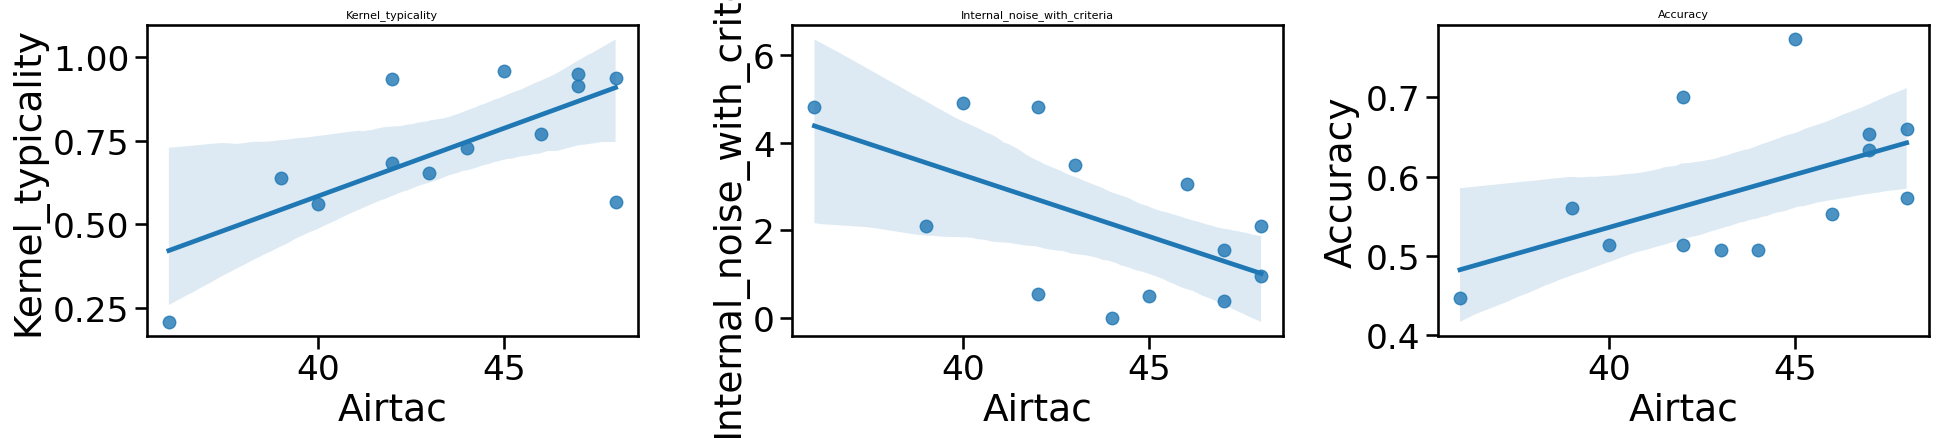

In [119]:
display_regressions_assumptions(data, predictor='airtac',outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

------------------------------------
KERNEL_TYPICALITY ~ AIRTAC_INT_DISCR
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     4.829
Date:                Fri, 29 Mar 2024   Prob (F-statistic):             0.0503
Time:                        12:20:25   Log-Likelihood:                 4.3138
No. Observations:                  13   AIC:                            -4.628
Df Residuals:                      11   BIC:                            -3.498
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

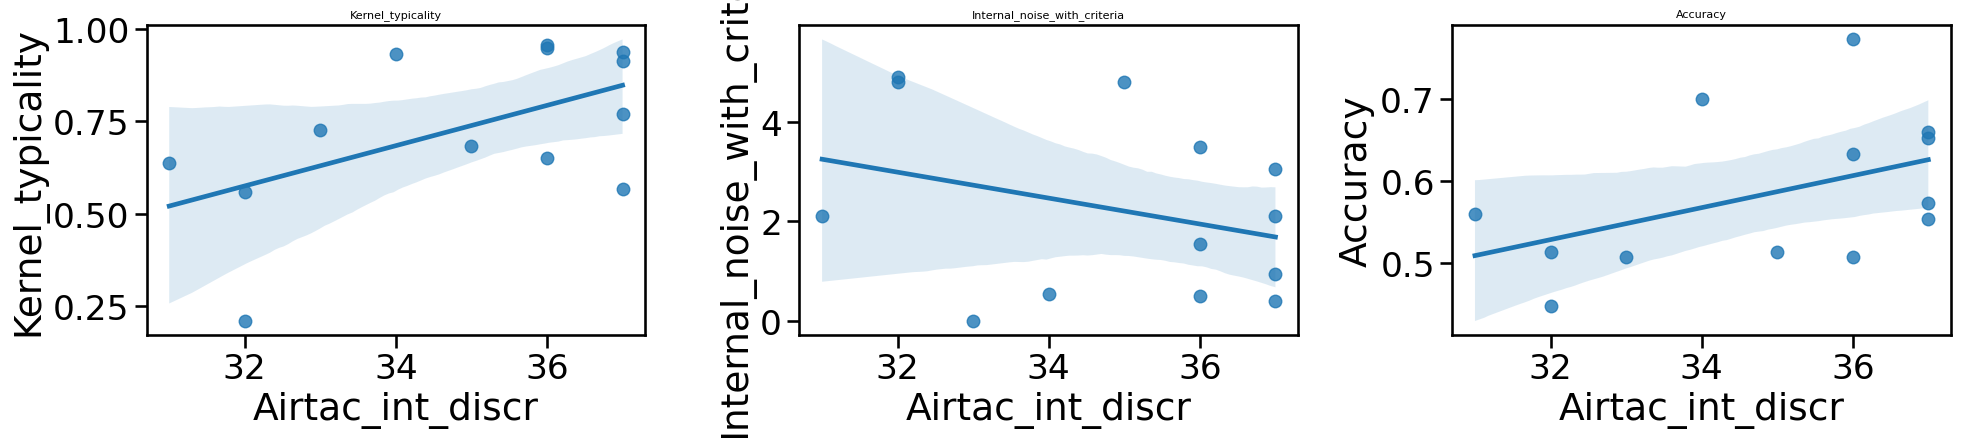

In [120]:
display_regressions(data, predictor='airtac_int_discr', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

#### LAMA

------------------------------------
KERNEL_TYPICALITY ~ LAMA_PREC
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.565
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.239
Time:                        12:20:26   Log-Likelihood:                 2.1902
No. Observations:                  12   AIC:                           -0.3803
Df Residuals:                      10   BIC:                            0.5895
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

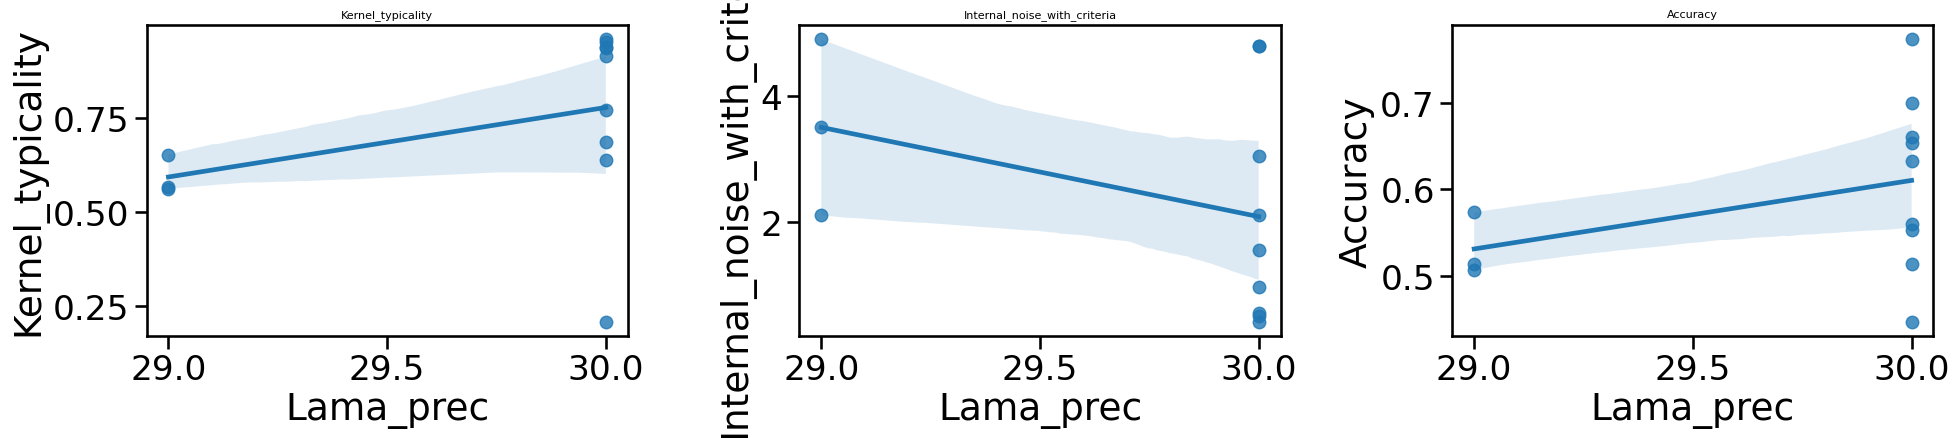

In [121]:
display_regressions(data, predictor='lama_prec', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

KERNEL_TYPICALITY ~ LAMA_PREC

Normality Test of Residuals for kernel_typicality
------------------------------------
p-value for normality: AD 0.0197 KS 0.2301

Homoscedasticity Test of Residuals for kernel_typicality
------------------------------------
p-value for homoscedasticity: 0.3649
INTERNAL_NOISE_WITH_CRITERIA ~ LAMA_PREC

Normality Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for normality: AD 0.1238 KS 0.4115

Homoscedasticity Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for homoscedasticity: 0.3632
ACCURACY ~ LAMA_PREC

Normality Test of Residuals for accuracy
------------------------------------
p-value for normality: AD 0.9185 KS 0.9117

Homoscedasticity Test of Residuals for accuracy
------------------------------------
p-value for homoscedasticity: 0.1843


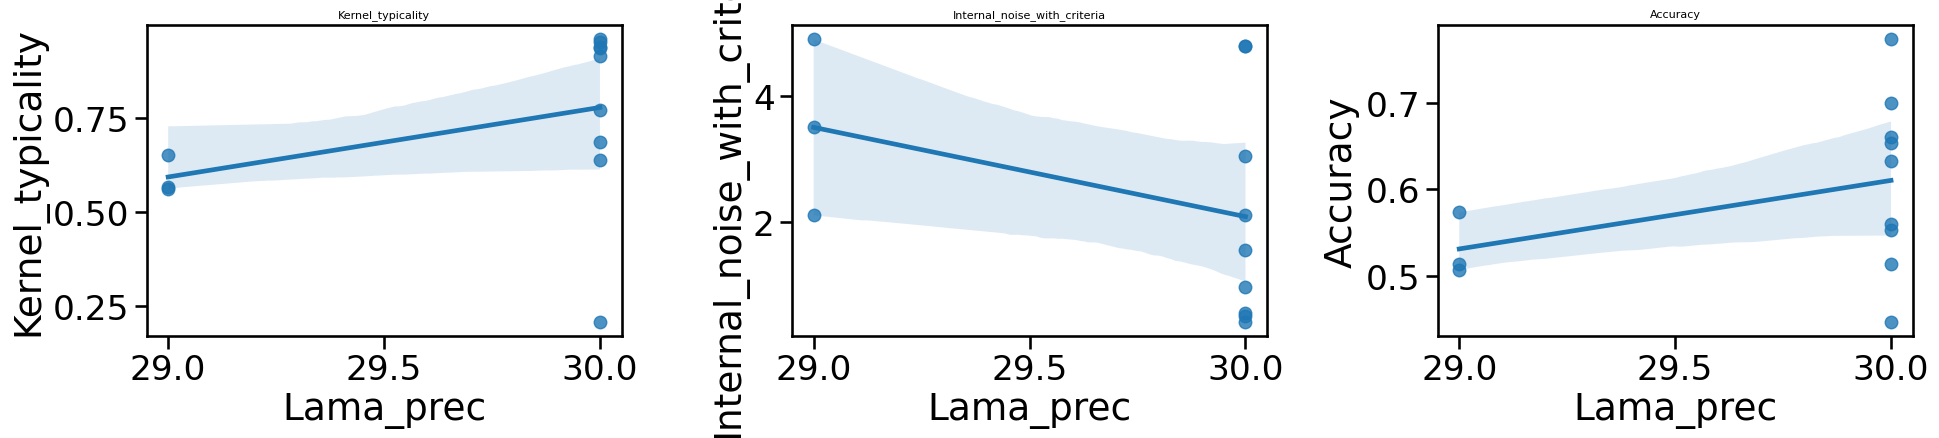

In [122]:
display_regressions_assumptions(data, predictor='lama_prec',outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

#### MBEA

------------------------------------
KERNEL_TYPICALITY ~ MBEA_TOTAL
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.5923
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.458
Time:                        12:20:27   Log-Likelihood:                 2.2889
No. Observations:                  13   AIC:                           -0.5778
Df Residuals:                      11   BIC:                            0.5521
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

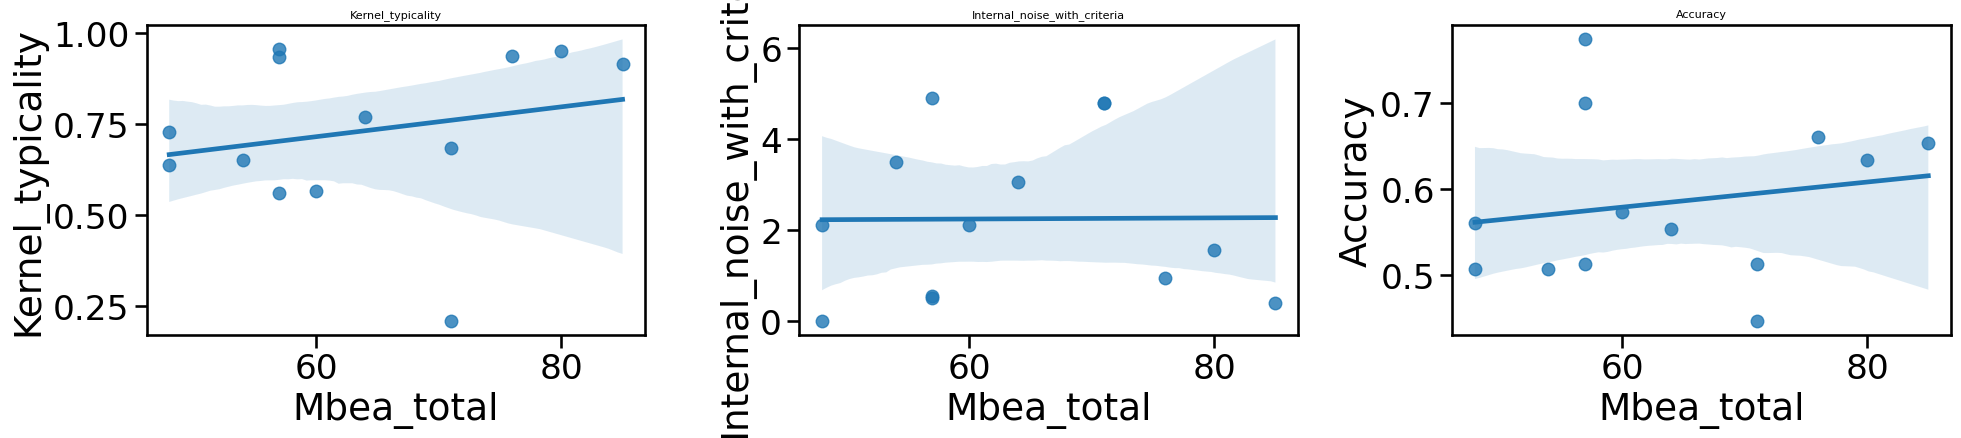

In [123]:
display_regressions(data, predictor='mbea_total', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

KERNEL_TYPICALITY ~ MBEA_TOTAL

Normality Test of Residuals for kernel_typicality
------------------------------------
p-value for normality: AD 0.2092 KS 0.4492

Homoscedasticity Test of Residuals for kernel_typicality
------------------------------------
p-value for homoscedasticity: 0.5280
INTERNAL_NOISE_WITH_CRITERIA ~ MBEA_TOTAL

Normality Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for normality: AD 0.1633 KS 0.5571

Homoscedasticity Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for homoscedasticity: 0.8533
ACCURACY ~ MBEA_TOTAL

Normality Test of Residuals for accuracy
------------------------------------
p-value for normality: AD 0.5702 KS 0.8633

Homoscedasticity Test of Residuals for accuracy
------------------------------------
p-value for homoscedasticity: 0.6810


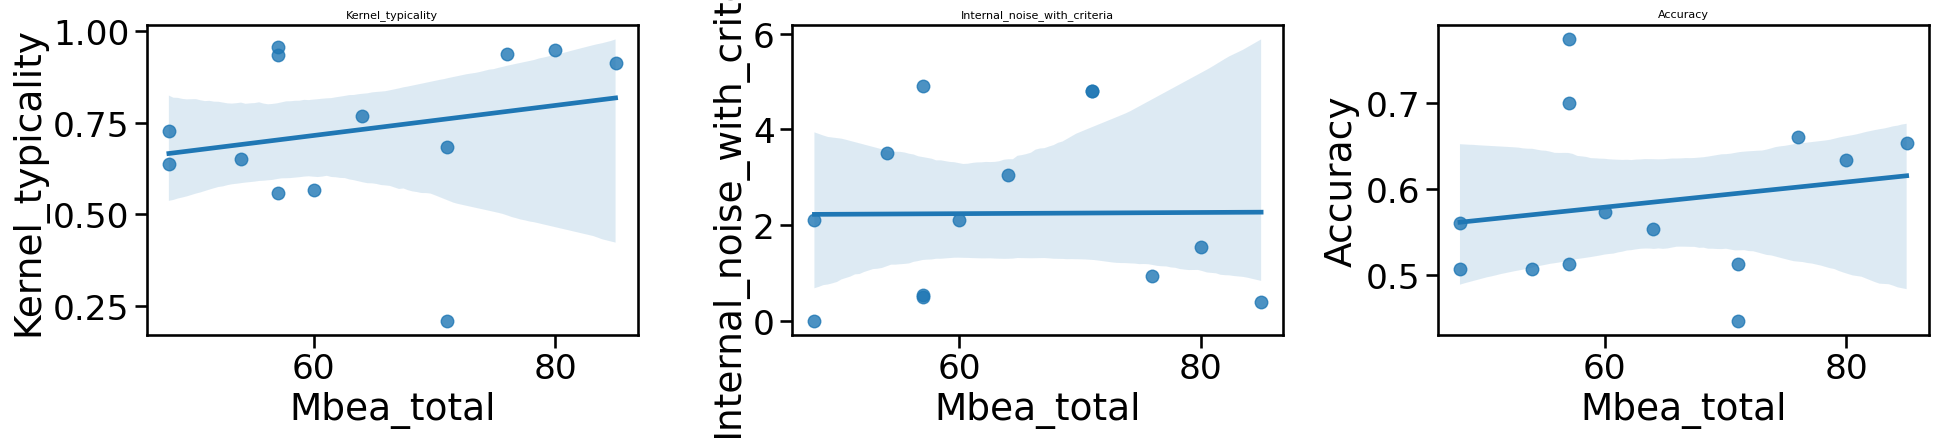

In [124]:
display_regressions_assumptions(data, predictor='mbea_total',outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

### Are reverse correlation measures sensitive to clinical measures irrelevant to prosody?

In [125]:
data = revcor_measures[revcor_measures.type=='patients'].merge(clinical_data[['experimentor','type','subject','session']+
                                                                             ['mec','execution','hads', 'hads_a', 'hads_d', 'nihss']], 
                                                               how='left',
                                                               on = ['experimentor','type','subject','session'])
data =  data[data.session == 1]

#### HADS

------------------------------------
KERNEL_TYPICALITY ~ HADS
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.926
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.180
Time:                        12:21:13   Log-Likelihood:                0.28912
No. Observations:                  22   AIC:                             3.422
Df Residuals:                      20   BIC:                             5.604
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

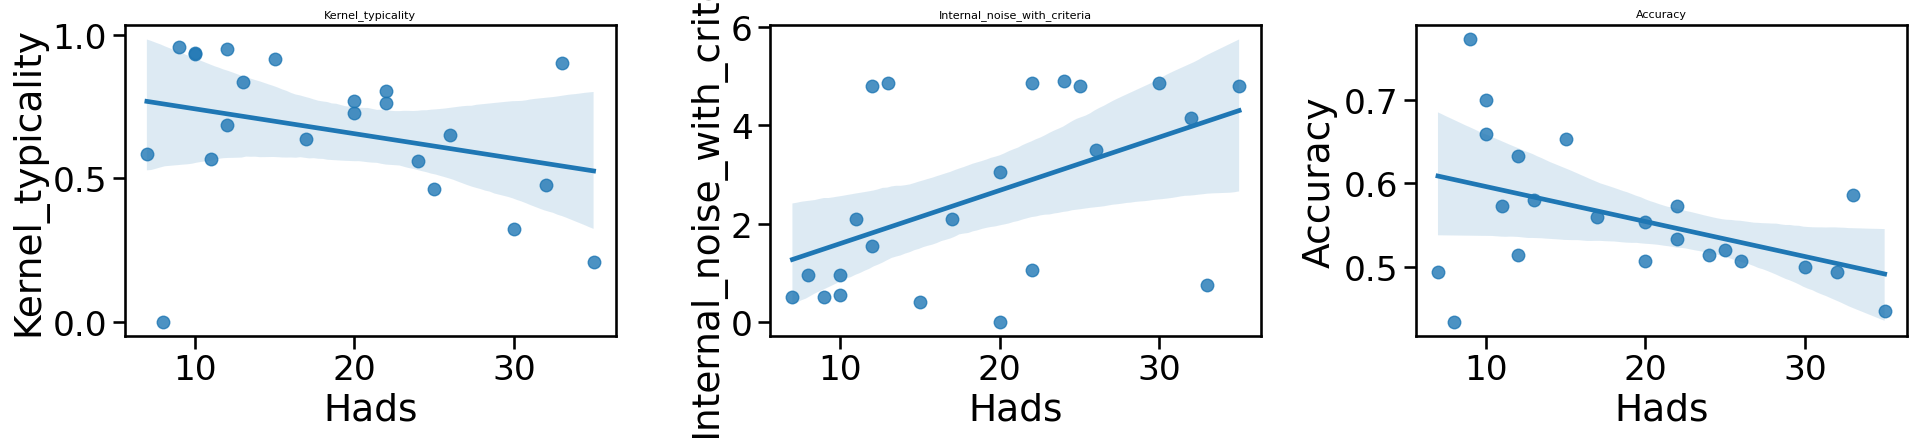

In [126]:
display_regressions(data, predictor='hads', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

## Figures

### Participant's table

In [127]:
from tableone import TableOne

In [128]:
clinical_data['audiogram_G'] = clinical_data[['1000G']].mean(axis=1)
clinical_data['audiogram_D']=clinical_data[['1000D']].mean(axis=1)
clinical_data['audiogram']=clinical_data[['audiogram_D','audiogram_G']].mean(axis=1)

In [129]:
clinical_data[['lama_prec','lama_time','airtac_int_discr','airtac_dur_discr','airtac','hads_a', 'hads_d', 'hads', 'mbea_scale', 'mbea_diff_cont',
       'mbea_equ_cont', 'mbea_total']].quantile([0.25, 0.5, 0.75]).T

0.25  0.50   0.75
lama_prec         29.75  30.0   30.0
lama_time         85.75  92.5  137.0
airtac_int_discr  33.00  36.0   37.0
airtac_dur_discr   8.00   9.0   11.0
airtac            42.00  44.0   47.0
hads_a             7.00   8.0   14.0
hads_d             4.00   6.0    8.0
hads              10.50  18.0   24.0
mbea_scale        18.00  21.0   25.0
mbea_diff_cont    20.00  22.0   25.0
mbea_equ_cont     17.00  18.0   22.0
mbea_total        57.00  60.0   71.0

In [130]:
clinical_data[clinical_data.type=='controls'].describe()

age  session  study_level  month_avc  \
count  21.000000     21.0          0.0        0.0   
mean   58.571429      1.0          NaN        NaN   
std    11.855680      0.0          NaN        NaN   
min    27.000000      1.0          NaN        NaN   
25%    52.000000      1.0          NaN        NaN   
50%    58.000000      1.0          NaN        NaN   
75%    64.000000      1.0          NaN        NaN   
max    82.000000      1.0          NaN        NaN   

       Epreuve d'exécution\r\nd'ordres de la BDAE\r\n(score < 10/15 : exclusion)  \
count                                                0.0                           
mean                                                 NaN                           
std                                                  NaN                           
min                                                  NaN                           
25%                                                  NaN                           
50%                                                  NaN                           
75%                                                  NaN                           
max                                                  NaN                           

       vocal_audiogram  hads_a  hads_d  hads  prosodie_C  ...      1000G  \
count              0.0     0.0     0.0   0.0         0.0  ...   5.000000   
mean               NaN     NaN     NaN   NaN         NaN  ...  10.000000   
std                NaN     NaN     NaN   NaN         NaN  ...  15.411035   
min                NaN     NaN     NaN   NaN         NaN  ...   0.000000   
25%                NaN     NaN     NaN   NaN         NaN  ...   0.000000   
50%                NaN     NaN     NaN   NaN         NaN  ...   0.000000   
75%                NaN     NaN     NaN   NaN         NaN  ...  15.000000   
max                NaN     NaN     NaN   NaN         NaN  ...  35.000000   

           2000G      3000G  4000G      6000G  nihss    subject  audiogram_G  \
count   5.000000   5.000000    5.0   5.000000    0.0  21.000000     5.000000   
mean   27.000000  26.000000   25.0  45.000000    NaN  10.714286    10.000000   
std    34.928498  33.429029   30.0  30.207615    NaN   6.573757    15.411035   
min     0.000000   0.000000    0.0  20.000000    NaN   0.000000     0.000000   
25%     0.000000   0.000000    0.0  25.000000    NaN   5.000000     0.000000   
50%     5.000000   5.000000   10.0  25.000000    NaN  11.000000     0.000000   
75%    60.000000  60.000000   55.0  70.000000    NaN  16.000000    15.000000   
max    70.000000  65.000000   60.0  85.000000    NaN  21.000000    35.000000   

       audiogram_D  audiogram  
count     5.000000   5.000000  
mean     11.000000  10.500000  
std      13.416408  14.295978  
min       0.000000   0.000000  
25%       0.000000   0.000000  
50%       5.000000   2.500000  
75%      20.000000  17.500000  
max      30.000000  32.500000  

[8 rows x 51 columns]

In [131]:
#table=clinical_data1.groupby([[clinical_data.session==1]'type','subject','experimentor','age','sex','session'],dropna=False)['block','trial'].nunique().reset_index()
#table
columns=['sex','age','month_avc','type_avc','nihss','prosodie_C','prosodie_R','execution', 'type','audiogram_G','audiogram_D','vocal_audiogram','hads_a', 'hads_d', 'hads', 
 'mbea_scale','mec', 'mbea_diff_cont', 'mbea_equ_cont','mbea_total', 'airtac_int_discr', 'airtac_dur_discr', 'airtac', 'lama_prec', 'lama_time']
categorical = ['sex','type_avc']
groupby = ['type']
nonnormal = ['age','audiogram_G','audiogram_D','vocal_audiogram','nihss','prosodie_C','prosodie_R','month_avc','execution','hads_a', 'hads_d', 'hads','mec' 
 'mbea_scale', 'mbea_diff_cont', 'mbea_equ_cont','mbea_total', 'airtac_int_discr', 'airtac_dur_discr', 'airtac', 'lama_prec', 'lama_time']
mytable = TableOne(clinical_data[clinical_data.session==1], columns=columns, nonnormal=nonnormal,categorical=categorical, groupby=groupby, pval=False)
mytable

Grouped by type                                                        
                                              Missing            Overall          controls           patients
n                                                                     43                21                 22
sex, n (%)                       f                  0          13 (30.2)          8 (38.1)           5 (22.7)
                                 m                             30 (69.8)         13 (61.9)          17 (77.3)
age, median [Q1,Q3]                                 0   59.0 [52.0,63.5]  58.0 [52.0,64.0]   60.5 [52.2,63.0]
month_avc, median [Q1,Q3]                          21      4.0 [1.0,5.0]     nan [nan,nan]      4.0 [1.0,5.0]
type_avc, n (%)                  HEM               34           3 (33.3)                             3 (33.3)
                                 ISCH                           6 (66.7)                             6 (66.7)
nihss, median [Q1,Q3]                              32    10.0 [5.5,16.0]     nan [nan,nan]    10.0 [5.5,16.0]
prosodie_C, median [Q1,Q3]                         21     9.0 [8.0,11.0]     nan [nan,nan]     9.0 [8.0,11.0]
prosodie_R, median [Q1,Q3]                         21   11.0 [10.0,12.0]     nan [nan,nan]   11.0 [10.0,12.0]
execution, median [Q1,Q3]                          34   15.0 [14.0,15.0]     nan [nan,nan]   15.0 [14.0,15.0]
audiogram_G, median [Q1,Q3]                        31    15.0 [7.5,27.5]    0.0 [0.0,15.0]   20.0 [15.0,30.0]
audiogram_D, median [Q1,Q3]                        31    12.5 [5.0,31.2]    5.0 [0.0,20.0]    15.0 [7.5,37.5]
vocal_audiogram, median [Q1,Q3]                    30  99.0 [94.0,100.0]     nan [nan,nan]  99.0 [94.0,100.0]
hads_a, median [Q1,Q3]                             30     8.0 [7.0,14.0]     nan [nan,nan]     8.0 [7.0,14.0]
hads_d, median [Q1,Q3]                             30      6.0 [4.0,8.0]     nan [nan,nan]      6.0 [4.0,8.0]
hads, median [Q1,Q3]                               21   18.5 [11.2,24.8]     nan [nan,nan]   18.5 [11.2,24.8]
mbea_scale, mean (SD)                              30         21.2 (5.1)         nan (nan)         21.2 (5.1)
mec, mean (SD)                                     21         19.7 (3.9)         nan (nan)         19.7 (3.9)
mbea_diff_cont, median [Q1,Q3]                     30   22.0 [20.0,25.0]     nan [nan,nan]   22.0 [20.0,25.0]
mbea_equ_cont, median [Q1,Q3]                      30   18.0 [17.0,22.0]     nan [nan,nan]   18.0 [17.0,22.0]
mbea_total, median [Q1,Q3]                         30   60.0 [57.0,71.0]     nan [nan,nan]   60.0 [57.0,71.0]
airtac_int_discr, median [Q1,Q3]                   30   36.0 [33.0,37.0]     nan [nan,nan]   36.0 [33.0,37.0]
airtac_dur_discr, median [Q1,Q3]                   30     9.0 [8.0,11.0]     nan [nan,nan]     9.0 [8.0,11.0]
airtac, median [Q1,Q3]                             30   44.0 [42.0,47.0]     nan [nan,nan]   44.0 [42.0,47.0]
lama_prec, median [Q1,Q3]                          31   30.0 [29.8,30.0]     nan [nan,nan]   30.0 [29.8,30.0]
lama_time, median [Q1,Q3]                          31  92.5 [85.8,137.0]     nan [nan,nan]  92.5 [85.8,137.0]

In [112]:
import openpyxl
mytable.to_excel('pics/mytable.xlsx')

### Figure 1

In [113]:
revcor_data['stim_order_new'] = revcor_data['stim_order'].replace({0: 'A', 1: 'B'})

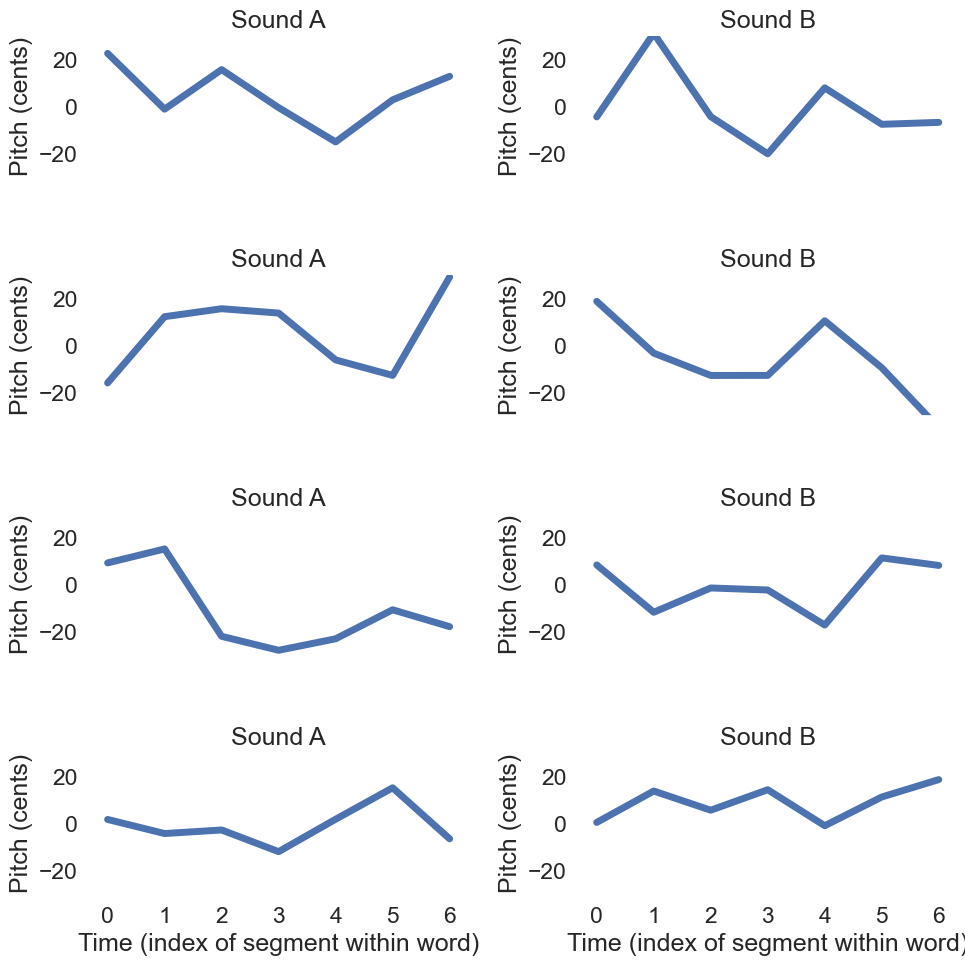

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

trial_list = [1, 2, 3, 150]  
sns.set(font_scale=1.5)  
g = sns.relplot(
    data=revcor_data[(revcor_data.type=='patients')&(revcor_data.trial.isin(trial_list))], x="segment", y="pitch",
    col="stim_order_new", row="trial", kind="line",ci=None, height=2.5, aspect=2, facet_kws={'sharey': False},linewidth=5)

for ax in g.axes.flat:
    ax.set_xlabel("Time (index of segment within word)")
    ax.set_ylabel("Pitch (cents)")
    ax.grid(False)
    ax.set_facecolor('white')
    ax.set_xticks([0,1,2,3,4,5,6])
    ax.set_ylim(-30,30)
    ax.set_yticks([-20,0,20])
    
g.set_titles("Sound {col_name}")
g.fig.subplots_adjust(hspace=0.7, wspace=0.3)
plt.savefig('pics/stimuli.png', dpi=600)

plt.show()

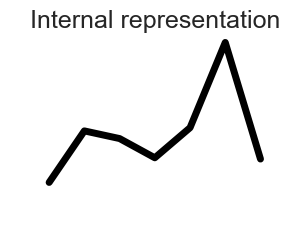

In [115]:
plt.figure(figsize=(3, 2))  
sns.set(font_scale=1.5)  
sns.lineplot(x="segment", 
                  y="kernel_value",
                  data=kernels[kernels.type=="patients"],
                  ci=None,color='black',linewidth=5
 )
plt.title("Internal representation")
plt.xlabel(" ")
plt.ylabel(" ")
plt.yticks([])
plt.xticks([])
sns.despine()
plt.gca().set_facecolor('white')
plt.grid(False)
plt.savefig('pics/internal_representation.png', dpi=600)
plt.show()

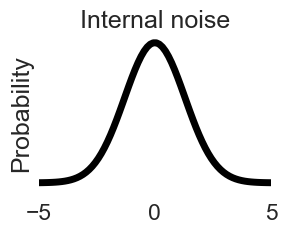

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(3, 2)) 
mu, sigma = 0, 1.3
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y = norm.pdf(x, mu, sigma)
sns.set(font_scale=1.5)  

sns.lineplot(x=x, y=y, color='black',linewidth=5)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('Probability')
plt.title('Internal noise')
plt.xticks([-5, 0, 5])
plt.yticks([])
plt.xlim(-5,5)
plt.gca().set_facecolor('white')
plt.grid(False)
plt.savefig('pics/internal_noise.png', dpi=600)
plt.show()

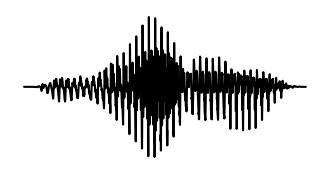

In [117]:
import librosa

y, sr = librosa.load("../experiment/sounds/base_sounds/male_vraiment_flat.wav")
plt.figure(figsize=(4,2))
plt.axis('off')
plt.plot(y,color='black')
plt.savefig('pics/waveform.png', dpi=600)

### Figure 2

In [132]:
clinical_data = pd.read_csv("data/clinical_data.csv", index_col=0)
kernels = pd.read_csv('data/kernels.csv', index_col=0)
revcor_measures = pd.read_csv("data/revcor_measures.csv", index_col=0)
kernels=kernels[kernels['subject'] != 6].reset_index(drop=True)
clinical_data=clinical_data[clinical_data['subject'] != 6].reset_index(drop=True)
revcor_measures=revcor_measures[revcor_measures['subject'] != 6].reset_index(drop=True)

In [133]:
revcor_measures[revcor_measures.session == 1].type.value_counts()

patients    22
controls    21
Name: type, dtype: int64

In [134]:
conditions = [
    (clinical_data['type'] == 'patients') & ((clinical_data['prosodie_C'] > 9) ),
    (clinical_data['type'] == 'patients') & ((clinical_data['prosodie_C'] <= 9)),
    (clinical_data['type'] == 'controls')
    ]
values = ['patients with MEC>9', 'patients with MEC<=9', 'controls']
clinical_data['new_type'] = np.select(conditions, values)

In [135]:
clinical_data[clinical_data.session==1].new_type.value_counts()

controls                21
patients with MEC<=9    12
patients with MEC>9     10
Name: new_type, dtype: int64

In [ ]:
clinical_data.groupby(['type','experimentor','session','type']).agg({'subject':'unique'})

In [ ]:
revcor_measures = pd.merge(revcor_measures, clinical_data[['subject', 'new_type','session','prosodie_C']],
                     on=['subject','session'], 
                     how='left')
revcor_measures.groupby(['type','experimentor','session','new_type']).agg({'subject':'unique'})

In [ ]:
kernels = pd.merge(kernels, clinical_data[['subject', 'new_type','session','prosodie_C']],
                     on=['subject','session'], 
                     how='left')
kernels.groupby(['type','experimentor','session','new_type']).agg({'subject':'unique'})

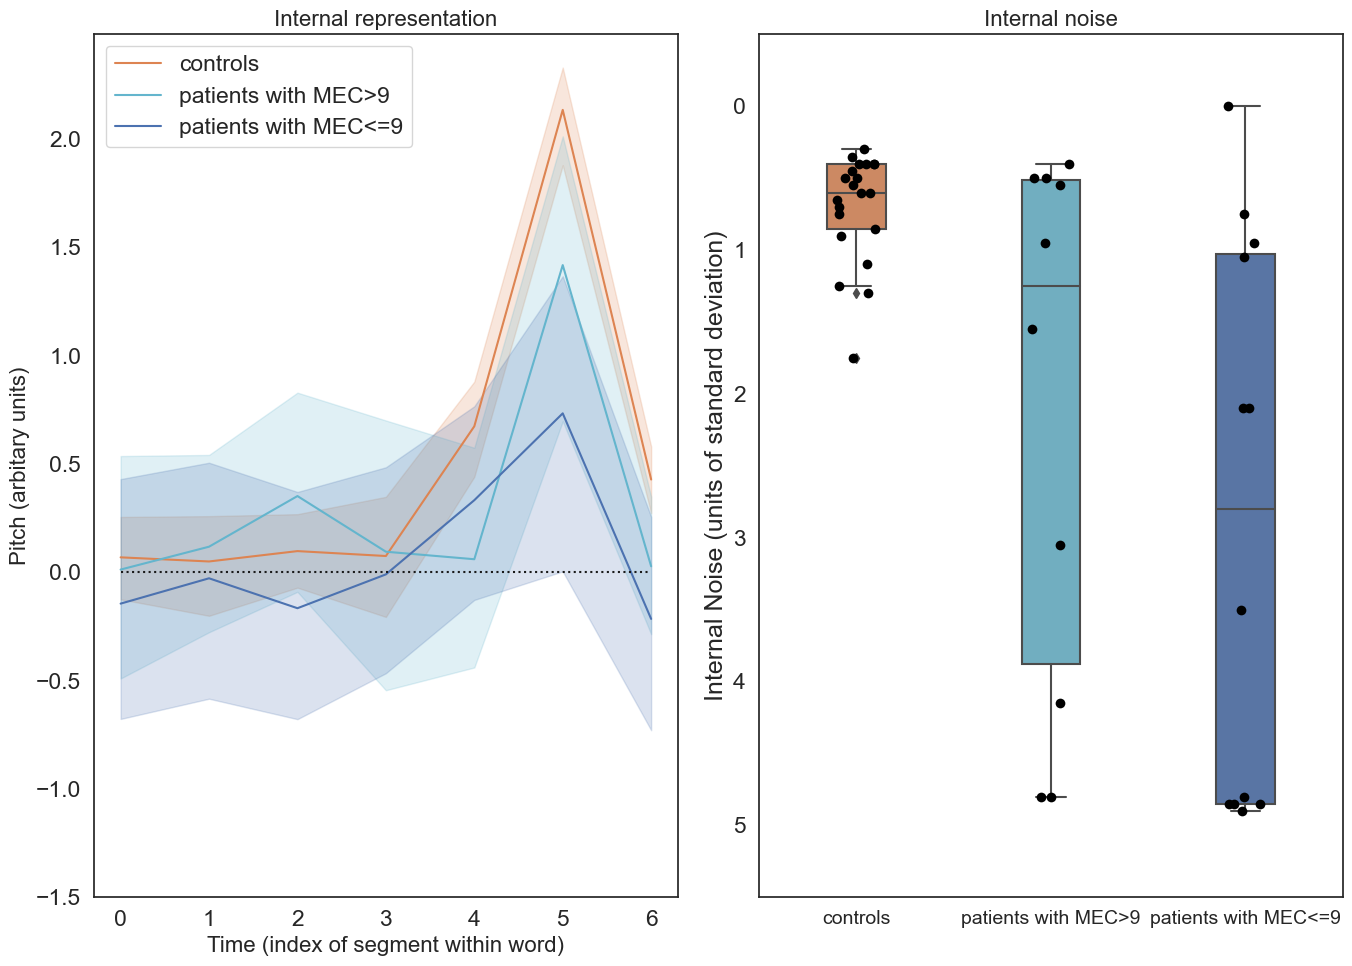

<Figure size 640x480 with 0 Axes>

In [139]:
sns.set(font_scale=1.5) 
#my_palette = {"controls": "darkorange", "patients with MEC>9": "tab:blue", "patients with MEC<=9": "steelblue"}
my_palette = {"controls": sns.color_palette()[1], "patients with MEC>9": sns.color_palette()[9], "patients with MEC<=9": sns.color_palette()[0]}


sns.set_style("white")  # Set the background color to white
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10))
ax1.grid(False)
ax2.grid(False)

orders = ["controls", "patients with MEC>9", "patients with MEC<=9"]
sns.lineplot(x="segment", 
             y="kernel_value",
             hue="new_type",
             data=kernels[(kernels.session==1)],
             ci=95,
             hue_order=orders,
             ax=ax1,
             palette=my_palette)
ax1.set_xlabel("Time (index of segment within word)",fontsize=16)
ax1.set_ylabel("Pitch (arbitary units)",fontsize=16)
ax1.set_title("Internal representation",fontsize=16)

ax1.plot([0,6],[0,0],color='k',linestyle=':')
ax1.legend(title=None)
ax1.set_ylim(-1.5, None)


box_order1 = ["controls", "patients with MEC>9", "patients with MEC<=9"]

sns.boxplot(data=revcor_measures[(revcor_measures.session==1)].dropna(subset=["new_type"]),
            x="new_type",
            y="internal_noise_with_criteria",
            ax=ax2,
            palette=my_palette,order=box_order1
            ,width=0.3,whis=1)
sns.stripplot(data=revcor_measures[(revcor_measures.session==1)].dropna(subset=["new_type"]),
              x="new_type",
              y="internal_noise_with_criteria",
              dodge=True,
              alpha=1,
              zorder=20,size=7,
              jitter=True,
              color="black",
              ax=ax2,order=box_order1)

ax2.set_ylabel("Internal Noise (units of standard deviation)")
ax2.tick_params(axis="x", labelsize=14)
ax2.set_title("Internal noise",fontsize=16)


ax2.set_ylim(-0.5,5.5)

ax2.invert_yaxis()
ax2.set_xlabel(None)

fig.tight_layout()
plt.show()

plt.savefig('pics/figure2.png', dpi = 600)

In [140]:
from scipy.stats import shapiro
df=revcor_measures[revcor_measures.session==1]
neg_patients = df[df['new_type'] == 'patients with MEC>9']['kernel_typicality']
pos_patients = df[df['new_type'] == 'patients with MEC<=9']['kernel_typicality']
controls = df[df['new_type'] == 'controls']['kernel_typicality']

print("patients with MEC>9 normality:", shapiro(neg_patients))
print("patients with MEC<=9 normality:", shapiro(pos_patients))
print("controls normality:", shapiro(controls))

patients with MEC>9 normality: ShapiroResult(statistic=0.8407812714576721, pvalue=0.04508548602461815)
patients with MEC<=9 normality: ShapiroResult(statistic=0.9041004180908203, pvalue=0.17916058003902435)
controls normality: ShapiroResult(statistic=0.5322815179824829, pvalue=4.0942381929198746e-07)


In [141]:
from scipy.stats import kruskal, mannwhitneyu
import statsmodels.stats.multicomp as mc
df=revcor_measures[revcor_measures.session==1]
# Perform the Kruskal-Wallis H-test
kw_result = kruskal(*[experimentor['kernel_typicality'].values for name, experimentor in df.groupby('new_type')])

print(f"Kruskal-Wallis H-test result: H = {kw_result.statistic}, p-value = {kw_result.pvalue}")

if kw_result.pvalue < 0.05:
    print("Significant Kruskal-Wallis result. Proceeding with pairwise comparisons.")

    pairwise_comparison = mc.pairwise_tukeyhsd

Kruskal-Wallis H-test result: H = 22.586152219873128, p-value = 1.2458890295387143e-05
Significant Kruskal-Wallis result. Proceeding with pairwise comparisons.


In [142]:
from scipy.stats import kruskal, mannwhitneyu
import statsmodels.stats.multicomp as mc
df=revcor_measures[revcor_measures.session==1]
groups = df['new_type'].unique()  # Get unique experimentor names

# Perform Mann-Whitney U tests pairwise
results = []
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1_data = df[df['new_type'] == groups[i]]['kernel_typicality'].values
        group2_data = df[df['new_type'] == groups[j]]['kernel_typicality'].values
        stat, pvalue = mannwhitneyu(group1_data, group2_data)
        results.append({'Group1': groups[i], 'Group2': groups[j], 'U-statistic': stat, 'P-value': pvalue})

# Convert results to a DataFrame for easier reading
results_df = pd.DataFrame(results)
print(results_df)

# Check for any significant results
if results_df['P-value'].min() < 0.05:
    print("Found significant differences between some pairs. Consider post-hoc analysis.")
else:
    print("No significant differences found between any pairs.")

                 Group1                Group2  U-statistic   P-value
0              controls  patients with MEC<=9        240.0  0.000022
1              controls   patients with MEC>9        180.0  0.001643
2  patients with MEC<=9   patients with MEC>9         35.0  0.106206
Found significant differences between some pairs. Consider post-hoc analysis.


In [143]:
from scipy.stats import shapiro
df=revcor_measures[revcor_measures.session==1]
neg_patients = df[df['new_type'] == 'patients with MEC>9']['internal_noise_with_criteria']
pos_patients = df[df['new_type'] == 'patients with MEC<=9']['internal_noise_with_criteria']
controls = df[df['new_type'] == 'controls']['internal_noise_with_criteria']

print("patients with MEC>9 normality:", shapiro(neg_patients))
print("patients with MEC<=9 normality:", shapiro(pos_patients))
print("controls normality:", shapiro(controls))

patients with MEC>9 normality: ShapiroResult(statistic=0.8048219680786133, pvalue=0.0165919940918684)
patients with MEC<=9 normality: ShapiroResult(statistic=0.8382763862609863, pvalue=0.026384809985756874)
controls normality: ShapiroResult(statistic=0.853102445602417, pvalue=0.00480622798204422)


In [144]:
from scipy.stats import kruskal, mannwhitneyu
import statsmodels.stats.multicomp as mc
df=revcor_measures[revcor_measures.session==1]
# Perform the Kruskal-Wallis H-test
kw_result = kruskal(*[experimentor['internal_noise_with_criteria'].values for name, experimentor in df.groupby('new_type')])

print(f"Kruskal-Wallis H-test result: H = {kw_result.statistic}, p-value = {kw_result.pvalue}")

if kw_result.pvalue < 0.05:
    print("Significant Kruskal-Wallis result. Proceeding with pairwise comparisons.")

    pairwise_comparison = mc.pairwise_tukeyhsd

Kruskal-Wallis H-test result: H = 12.622558897053231, p-value = 0.0018157086466763842
Significant Kruskal-Wallis result. Proceeding with pairwise comparisons.


In [145]:
from scipy.stats import kruskal, mannwhitneyu
import statsmodels.stats.multicomp as mc
df=revcor_measures[revcor_measures.session==1]
groups = df['new_type'].unique()  # Get unique experimentor names

# Perform Mann-Whitney U tests pairwise
results = []
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1_data = df[df['new_type'] == groups[i]]['internal_noise_with_criteria'].values
        group2_data = df[df['new_type'] == groups[j]]['internal_noise_with_criteria'].values
        stat, pvalue = mannwhitneyu(group1_data, group2_data)
        results.append({'Group1': groups[i], 'Group2': groups[j], 'U-statistic': stat, 'P-value': pvalue})

# Convert results to a DataFrame for easier reading
results_df = pd.DataFrame(results)
print(results_df)

# Check for any significant results
if results_df['P-value'].min() < 0.05:
    print("Found significant differences between some pairs. Consider post-hoc analysis.")
else:
    print("No significant differences found between any pairs.")

                 Group1                Group2  U-statistic   P-value
0              controls  patients with MEC<=9         35.5  0.000743
1              controls   patients with MEC>9         59.5  0.056397
2  patients with MEC<=9   patients with MEC>9         81.5  0.164827
Found significant differences between some pairs. Consider post-hoc analysis.


### Figure 3

<Figure size 4000x1000 with 0 Axes>

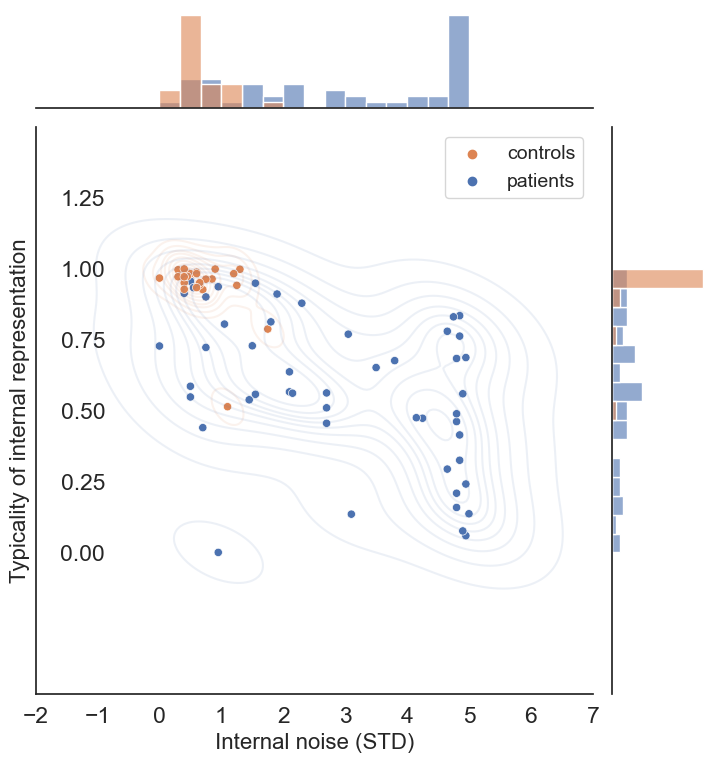

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_clusters_kde_x(data, x, y, hue, x_range, color='blue', linewidth=2, save_path=None):
    sns.set_style("white")
    filtered_data = data[(data[x] >= x_range[0]) & (data[x] <= x_range[1])]
    custom_palette = {"controls": sns.color_palette()[1],  "patients": sns.color_palette()[0]}
    g = sns.JointGrid(data=filtered_data, x=x, y=y, hue=hue, palette=custom_palette, height=8)
    
    # Customize the KDE plot color and linewidth within the sns.kdeplot function
    g.plot_joint(sns.kdeplot, fill=False, common_norm=False, bw_adjust=0.85, alpha=0.1, color=color, linewidth=linewidth)
    
    # Create histogram marginals
    g.plot_marginals(sns.histplot, color="#03051A", alpha=0.6, bins=15)
    
    g.set_axis_labels(xlabel='Internal noise (STD)', ylabel='Typicality of internal representation', fontsize=16)
    g.ax_joint.set_facecolor('white')
    g.ax_joint.set_ylim([-0.5, 1.5])
    g.ax_joint.set_yticks([ 0,0.25,0.50,0.75,1.00,1.25])
    
    g.ax_joint.tick_params(axis='y', direction='in', length=0)
    g.ax_joint.yaxis.set_tick_params(pad=-50)
    g.ax_joint.set_xlim([x_range[0], x_range[1]])  # Separate x-axis limits
    g.ax_joint.set_xticks([x_range[0]-2,x_range[0]-1,x_range[0],x_range[0]+1,x_range[0]+2,x_range[0]+3,x_range[0]+4,x_range[1]-1,x_range[1] ,x_range[1]+1])  # Adjust the x-axis ticks as needed

    sns.scatterplot(data=filtered_data, x=x, y=y, hue=hue,palette=custom_palette ,ax=g.ax_joint)
    g.ax_joint.legend(title=None, fontsize=14)
    
    # Save the plot as an image if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()  # Show the plot

# Create the first plot
plt.figure(figsize=(40, 10))  # Create a new figure
plot_clusters_kde_x(data=revcor_measures, x="internal_noise_with_criteria", y="kernel_typicality", hue='type', x_range=(0, 6), color='blue', linewidth=2, save_path='kde_org.png')

# Create the second plot
#plt.figure(figsize=(15, 10))  # Create a new figure
#plot_clusters_kde_x(data=revcor_measures, x="internal_noise_with_criteria", y="kernel_typicality", hue='type', x_range=(4, 5), color='gray', linewidth=2, save_path='kde_plot4.png')


<Figure size 2500x1200 with 0 Axes>

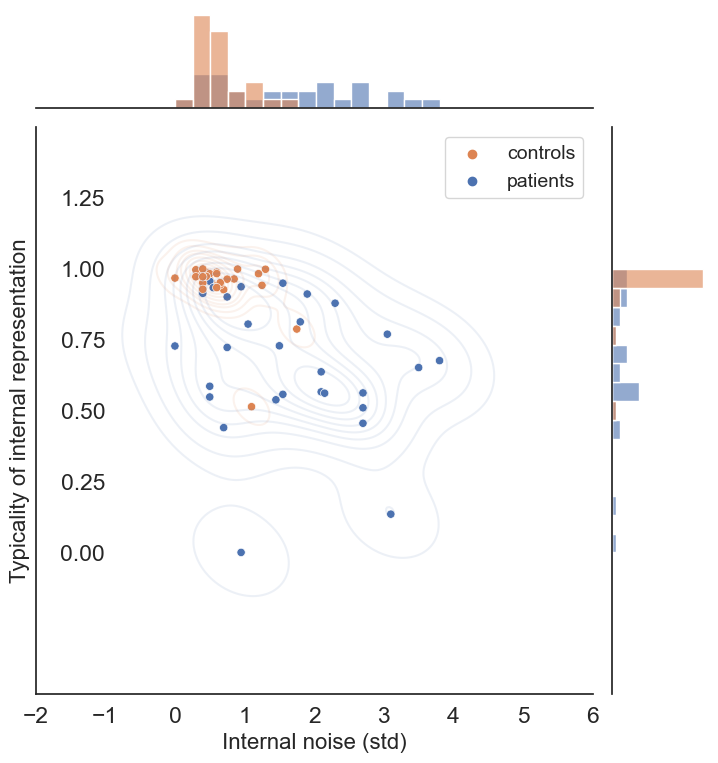

<Figure size 2500x1200 with 0 Axes>

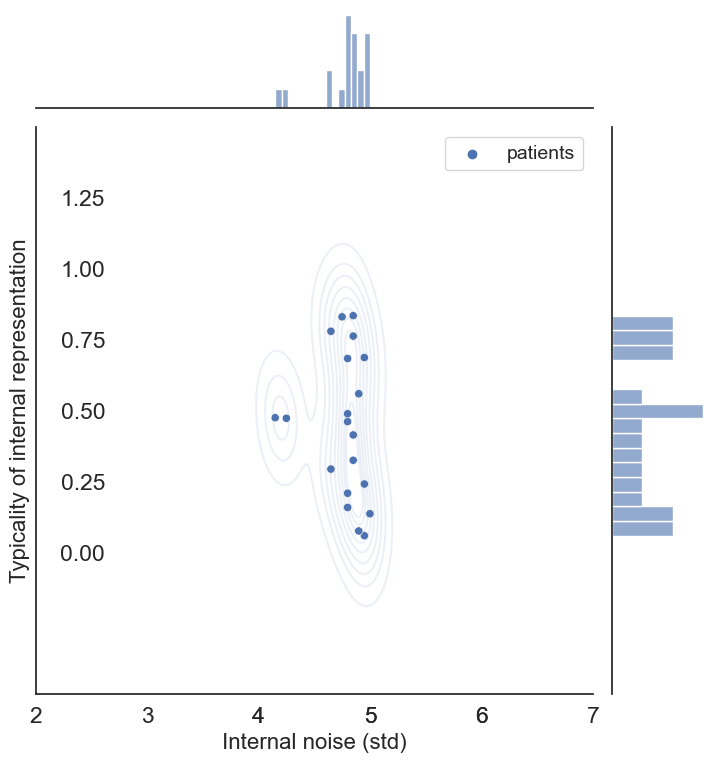

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_clusters_kde_x(data, x, y, hue, x_range, subject_6_id, color='blue', linewidth=2, save_path=None):
    sns.set_style("white")
    filtered_data = data[(data[x] >= x_range[0]) & (data[x] <= x_range[1])]
    custom_palette = {"controls": sns.color_palette()[1], "patients": sns.color_palette()[0]}

    g = sns.JointGrid(data=filtered_data, x=x, y=y, hue=hue, palette=custom_palette, height=8)
    
    # Customize the KDE plot color and linewidth within the sns.kdeplot function
    g.plot_joint(sns.kdeplot, fill=False, common_norm=False, bw_adjust=0.85, alpha=0.1, color=color, linewidth=linewidth)
    
    # Create histogram marginals
    g.plot_marginals(sns.histplot, color="#03051A", alpha=0.6, bins=15)
    
    g.set_axis_labels(xlabel='Internal noise (std)', ylabel='Typicality of internal representation', fontsize=16)
    g.ax_joint.set_facecolor('white')
    g.ax_joint.set_ylim([-0.5, 1.5])
    g.ax_joint.set_yticks([0, 0.25, 0.50, 0.75, 1.00, 1.25])
    
    g.ax_joint.tick_params(axis='y', direction='in', length=0)
    g.ax_joint.yaxis.set_tick_params(pad=-50)
    g.ax_joint.set_xlim([x_range[0], x_range[1]])  # Separate x-axis limits
    g.ax_joint.set_xticks([x_range[0]-2, x_range[0]-1, x_range[0], x_range[0]+1, x_range[0]+2, x_range[1]-1, x_range[1], x_range[1]+1, x_range[1]+2])  # Adjust the x-axis ticks as needed

    sns.scatterplot(data=filtered_data, x=x, y=y, hue=hue, palette=custom_palette, ax=g.ax_joint)
    g.ax_joint.legend(title=None, fontsize=14)

    # Plot a red circle on subject 6's data point
    subject_6_data = data[(data.type == 'controls') & (data.session == 1) & (data.subject == 6)]
    if not subject_6_data.empty:
        x_position = subject_6_data[x].values[0]  # Assuming there is only one data point per subject
        y_position = subject_6_data[y].values[0]
        g.ax_joint.plot(x_position, y_position, 'o', ms=6, mfc='none', mec='red', mew=2, zorder=3)
    
    # Save the plot as an image if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=500, bbox_inches='tight')
    
    plt.show()  # Show the plot

# Create the first plot
plt.figure(figsize=(25, 12))  # Create a new figure
plot_clusters_kde_x(data=revcor_measures, x="internal_noise_with_criteria", y="kernel_typicality", hue='type', x_range=(0, 4), subject_6_id=6, color='blue', linewidth=2, save_path='kde_plot1.png')

# Create the second plot
plt.figure(figsize=(25, 12))  # Create a new figure
plot_clusters_kde_x(data=revcor_measures, x="internal_noise_with_criteria", y="kernel_typicality", hue='type', x_range=(4, 5), subject_6_id=6, color='gray', linewidth=2, save_path='kde_plot2.png')


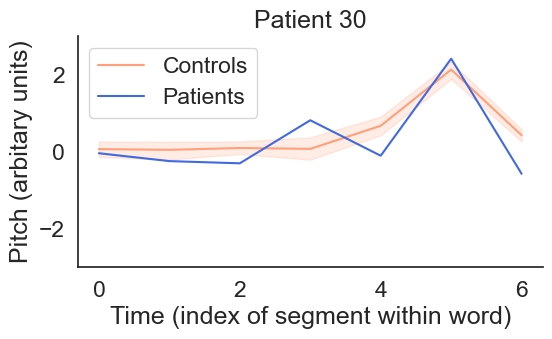

<Figure size 640x480 with 0 Axes>

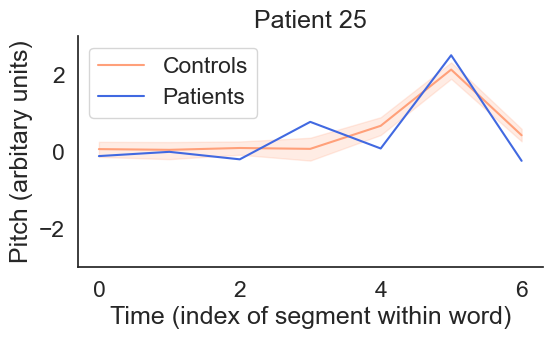

<Figure size 640x480 with 0 Axes>

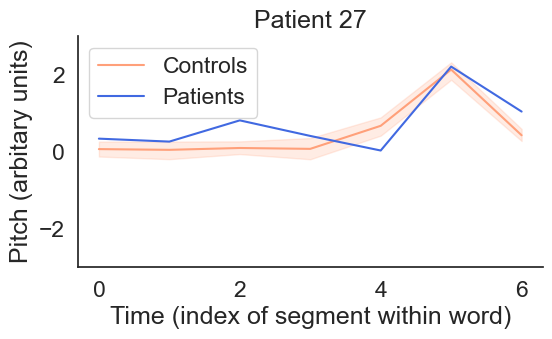

<Figure size 640x480 with 0 Axes>

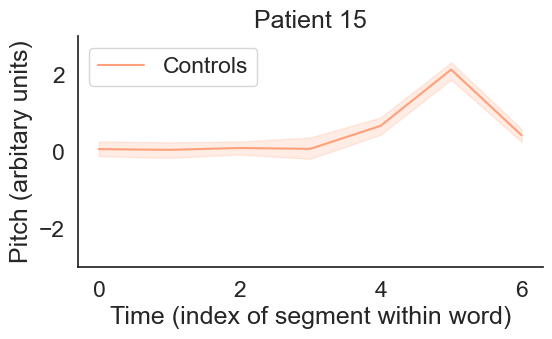

<Figure size 640x480 with 0 Axes>

In [134]:
patients = [30, 25, 27, 15]
colors = {"controls": "#FFA07A", "patients": "#4169E1"}

for patient in patients:
    fig, ax = plt.subplots(figsize=(6,3))
    #ax.set_ylim(-2, 2)
    plt.xlabel("Time (index of segment within word)")
    plt.ylabel("Pitch (arbitary units)")

    sp_controls = kernels[
        (kernels.session == 1) & (kernels.type == "controls")
    ]
    sns.lineplot(
        x="segment",
        y="kernel_value",
        color=colors["controls"],
        ci=95,
        label="Controls",
        data=sp_controls,
        ax=ax,
    )

    sp_patient = kernels[
        (kernels.session == 1)
        & (kernels.type == "patients")
        & (kernels.subject == patient)
    ]
    sns.lineplot(
        x="segment",
        y="kernel_value",
        color=colors["patients"],
        ci=None,
        label="Patients",
        data=sp_patient,
        ax=ax,
    )
    sns.despine()
    ax.set_facecolor('white')
    ax.grid(False)
    ax.set_ylim(-3 ,3)
    ax.set_yticks([-2, 0, 2])

    plt.title(f"Patient {patient}")
    plt.legend()
    plt.show()
    
    plt.savefig('pics/selected_kernels.png', dpi=600)

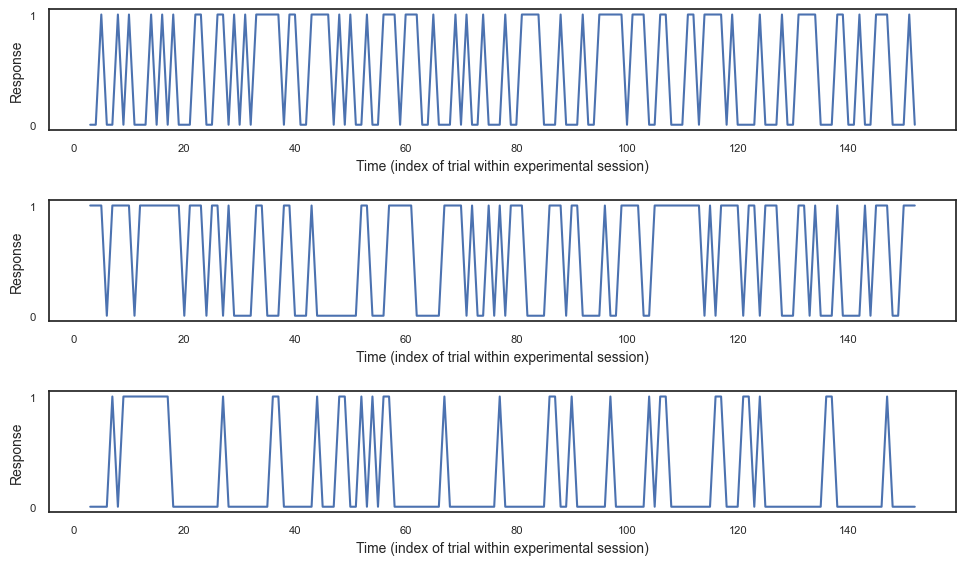

<Figure size 640x480 with 0 Axes>

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

patients = [30, 25, 27, 15]
patient_sessions = revcor_data[(revcor_data.type == "patients")& (revcor_data.subject.isin(patients))& (revcor_data.session == 1)].groupby(["subject", "session"], as_index=False).trial.count()

num_rows = len(patient_sessions)
fig, axs = plt.subplots(num_rows, 1, figsize=(10, 6))

for i, patient_session in enumerate(zip(patient_sessions.subject, patient_sessions.session)):
    patient = patient_session[0]
    session = patient_session[1]
    
    patient_responses = revcor_data[(revcor_data.subject==patient) & 
                                    (revcor_data.session==session) & 
                                    (revcor_data.stim_order==0)].groupby('trial')['response'].first()
    
    axs[i].plot(patient_responses)
    axs[i].set_yticks([0, 1])
    axs[i].set_ylabel('Response', fontsize=10)
    axs[i].set_xlabel('Time (index of trial within experimental session)', fontsize=10)
    axs[i].grid(False)
    axs[i].set_facecolor('white')
    axs[i].tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()

plt.savefig('pics/selected_responses.png', dpi=600)

verify no difference between internal noise per experimentor based on different double-pass block

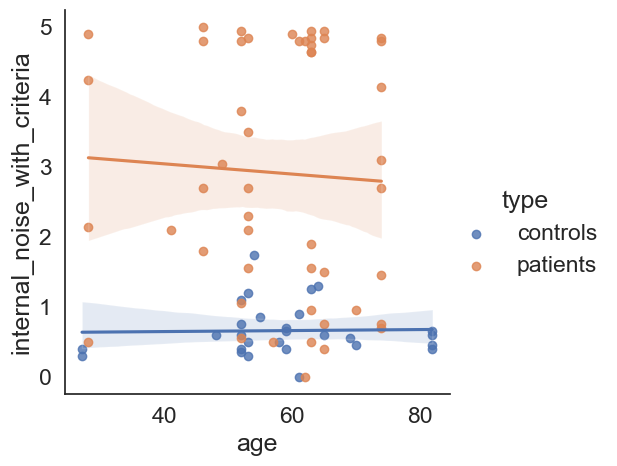

In [148]:
sns.lmplot(x='age',y='internal_noise_with_criteria',hue='type',
           data=revcor_measures.merge(revcor_data.groupby(['subject'], as_index=False).age.mean(), on='subject'))

In [149]:
df=revcor_measures[revcor_measures.session==1]
# Perform the Kruskal-Wallis H-test
kw_result = kruskal(*[experimentor['internal_noise_with_criteria'].values for name, experimentor in df.groupby('type')])

print(f"Kruskal-Wallis H-test result: H = {kw_result.statistic}, p-value = {kw_result.pvalue}")

if kw_result.pvalue < 0.05:
    print("Significant Kruskal-Wallis result. Proceeding with pairwise comparisons.")

    pairwise_comparison = mc.pairwise_tukeyhsd

Kruskal-Wallis H-test result: H = 10.954101273319505, p-value = 0.0009339666101128224
Significant Kruskal-Wallis result. Proceeding with pairwise comparisons.


In [150]:
df=revcor_measures[revcor_measures.session==1]
# Perform the Kruskal-Wallis H-test
kw_result = kruskal(*[experimentor['kernel_typicality'].values for name, experimentor in df.groupby('type')])

print(f"Kruskal-Wallis H-test result: H = {kw_result.statistic}, p-value = {kw_result.pvalue}")

if kw_result.pvalue < 0.05:
    print("Significant Kruskal-Wallis result. Proceeding with pairwise comparisons.")

    pairwise_comparison = mc.pairwise_tukeyhsd

Kruskal-Wallis H-test result: H = 21.086776859504113, p-value = 4.3894669586951725e-06
Significant Kruskal-Wallis result. Proceeding with pairwise comparisons.


count      mean       std  min    25%   50%    75%  max
exp_group                                                              
Bardet-Commere   27.0  1.490741  1.460574  0.0  0.525  0.85  1.925  4.9
Jeulin           50.0  2.426000  1.868652  0.0  0.650  1.85  4.725  5.0

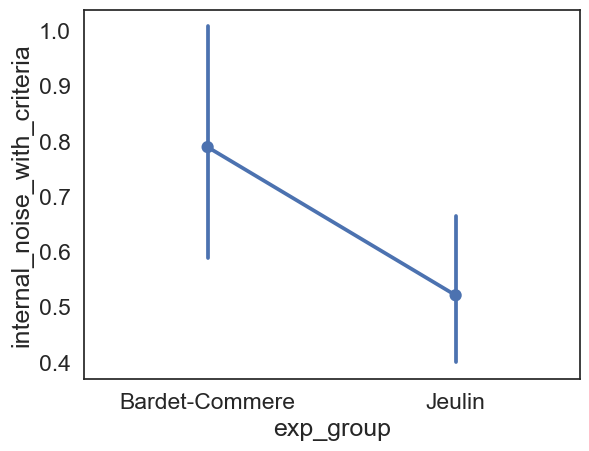

In [151]:
#revcor_measures = pd.read_csv("data/revcor_measures.csv", index_col=0)
a = revcor_measures.copy()
a['exp_group'] = 'Bardet-Commere'
a.loc[a.experimentor=='jeulin','exp_group'] = 'Jeulin' 

sns.pointplot(data=a[(a.type=='controls')&(a.session==1)], x='exp_group',y='internal_noise_with_criteria')

#pg.ttest(x=a[a.exp_group=='Bardet-Commere'].internal_noise_with_criteria,
#        y=a[a.exp_group=='Jeulin'].internal_noise_with_criteria)

a.groupby('exp_group').internal_noise_with_criteria.describe()

In [152]:
revcor_measures[(revcor_measures.type=='controls')].groupby('experimentor').internal_noise_with_criteria.describe()

count      mean       std  min     25%    50%     75%   max
experimentor                                                             
aynaz          14.0  0.789286  0.417492  0.3  0.5125  0.650  1.0375  1.75
jeulin         14.0  0.532143  0.281894  0.0  0.4000  0.475  0.6375  1.20

In [153]:
from scipy.stats import kruskal, mannwhitneyu
import statsmodels.stats.multicomp as mc
df=revcor_measures[(revcor_measures.type=='patients')&(revcor_measures.session==1)]
groups = df['experimentor'].unique()  # Get unique experimentor names

# Perform Mann-Whitney U tests pairwise
results = []
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1_data = df[df['experimentor'] == groups[i]]['internal_noise_with_criteria'].values
        group2_data = df[df['experimentor'] == groups[j]]['internal_noise_with_criteria'].values
        stat, pvalue = mannwhitneyu(group1_data, group2_data)
        results.append({'Group1': groups[i], 'Group2': groups[j], 'U-statistic': stat, 'P-value': pvalue})

# Convert results to a DataFrame for easier reading
results_df = pd.DataFrame(results)
print(results_df)

# Check for any significant results
if results_df['P-value'].min() < 0.05:
    print("Found significant differences between some pairs. Consider post-hoc analysis.")
else:
    print("No significant differences found between any pairs.")

    Group1   Group2  U-statistic   P-value
0   bardet  commere         11.5  0.240271
1   bardet   jeulin         11.0  0.139828
2  commere   jeulin         33.0  0.808973
No significant differences found between any pairs.


In [154]:
from scipy.stats import kruskal, mannwhitneyu
import statsmodels.stats.multicomp as mc
df1=revcor_measures[(revcor_measures.type=='controls')&(revcor_measures.session==1)]
groups = df1['experimentor'].unique()  # Get unique experimentor names

# Perform Mann-Whitney U tests pairwise
results = []
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1_data = df1[df1['experimentor'] == groups[i]]['internal_noise_with_criteria'].values
        group2_data = df1[df1['experimentor'] == groups[j]]['internal_noise_with_criteria'].values
        stat, pvalue = mannwhitneyu(group1_data, group2_data)
        results.append({'Group1': groups[i], 'Group2': groups[j], 'U-statistic': stat, 'P-value': pvalue})

# Convert results to a DataFrame for easier reading
results_df = pd.DataFrame(results)
print(results_df)

# Check for any significant results
if results_df['P-value'].min() < 0.05:
    print("Found significant differences between some pairs. Consider post-hoc analysis.")
else:
    print("No significant differences found between any pairs.")

  Group1  Group2  U-statistic   P-value
0  aynaz  jeulin         69.5  0.134148
No significant differences found between any pairs.


## Supplemantary

### Figure S2

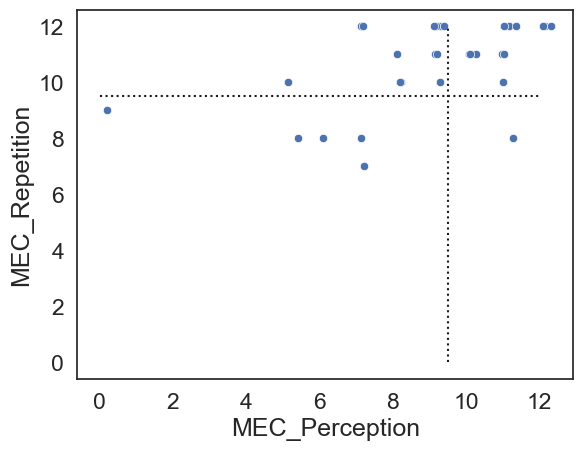

In [155]:
c = clinical_data[(clinical_data.type=='patients')]
def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

sns.scatterplot(x=jitter(c.prosodie_C, .2), 
                y=c.prosodie_R)
plt.plot([9.5,9.5],[0,12],'k:')
plt.plot([0,12],[9.5,9.5],'k:')
plt.xlabel('MEC_Perception')
plt.ylabel('MEC_Repetition')
plt.savefig('pics/figureS1-2.png', dpi = 1000)

### Figure S3

In [156]:
kernels[kernels.experimentor.isin(['bardet','commere'])].subject.unique()

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], dtype=int64)

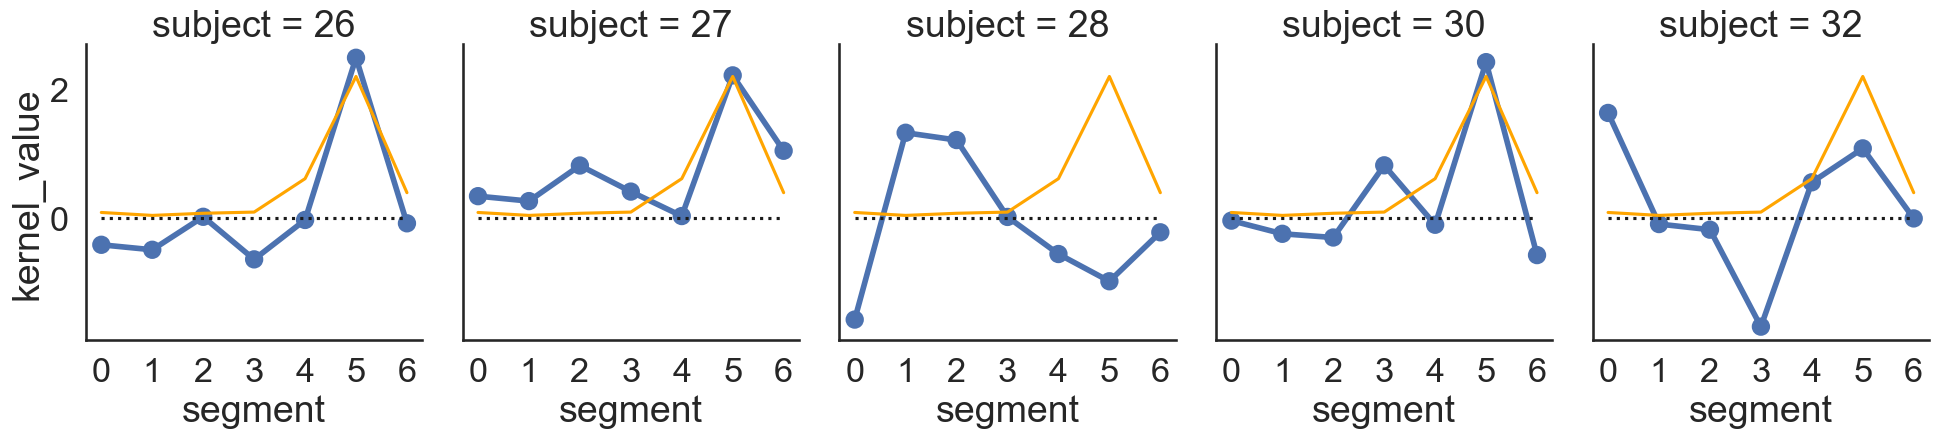

In [157]:
import seaborn as sns
kernels = pd.read_csv('data/kernels.csv', index_col=0)
kernels=kernels[kernels['subject'] != 6].reset_index(drop=True)

# Set the seaborn context for larger plots
sns.set_context('talk', font_scale=1.5)

# Define the specific order of subjects
patient_sorted = [26,27,28,30,32]
new_aspect = 0.8  # This is just an example, you'll need to adjust this based on your actual previous aspect ratio
new_height = 5 
# Plotting the catplot for the patients data, ensuring the subjects are in the specified order
g = sns.catplot(x="segment", 
                y="kernel_value",
                col="subject",
                col_order=patient_sorted,  # Order of columns as per the specified patient_sorted
                col_wrap=5,
                height=new_height,  # Set the height to maintain the same plot size
                aspect=new_aspect,
                data=kernels[(kernels.type=='patients') & (kernels.session==1)], 
                kind='point')

# Calculate the mean kernel value for the control group and reset index
control_kernels = kernels[kernels.type=='controls'].groupby('segment')['kernel_value'].mean().reset_index()

# Plot the control group kernel values and a dashed line at 0 for each subplot
axes = g.axes.flatten()
for axis in axes:
    axis.plot(control_kernels['segment'], control_kernels['kernel_value'], color='orange')
    axis.plot([0, 6], [0, 0], color='k', linestyle=':')


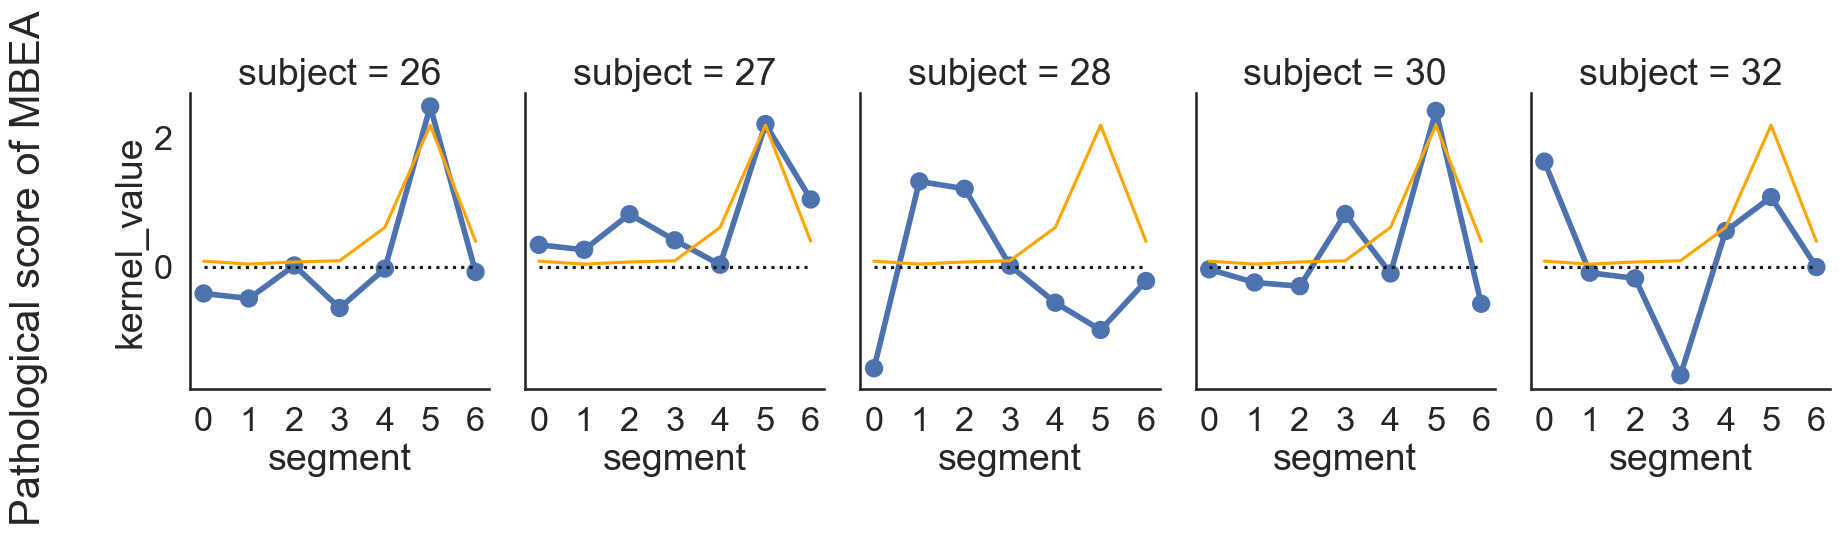

In [158]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your 'kernels' DataFrame is correctly loaded and prepared as described
sns.set_context('talk', font_scale=1.5)

# Define the specific order of subjects
patient_sorted = [26, 27, 28, 30, 32]
new_aspect = 0.8  # Adjust based on your actual aspect ratio needs
new_height = 5 

# Plotting the catplot for the patients data, ensuring the subjects are in the specified order
g = sns.catplot(x="segment", 
                y="kernel_value",
                col="subject",
                col_order=patient_sorted,  # Order of columns as per the specified patient_sorted
                col_wrap=5,
                height=new_height,  # Set the height to maintain the same plot size
                aspect=new_aspect,
                data=kernels[(kernels.type=='patients') & (kernels.session==1)], 
                kind='point')

# Plot the control group kernel values and a dashed line at 0 for each subplot
axes = g.axes.flatten()
for axis in axes:
    axis.plot(control_kernels['segment'], control_kernels['kernel_value'], color='orange')
    axis.plot([0, 6], [0, 0], color='k', linestyle=':')

# Add a common Y-axis label
plt.subplots_adjust(left=0.13, right=0.95)  # Adjust subplot parameters to make room for the common Y-axis label
g.fig.text(0.04, 0.5, 'Pathological score of MBEA', va='center', rotation='vertical', fontsize=30)  # Adjust these parameters as needed

plt.show()


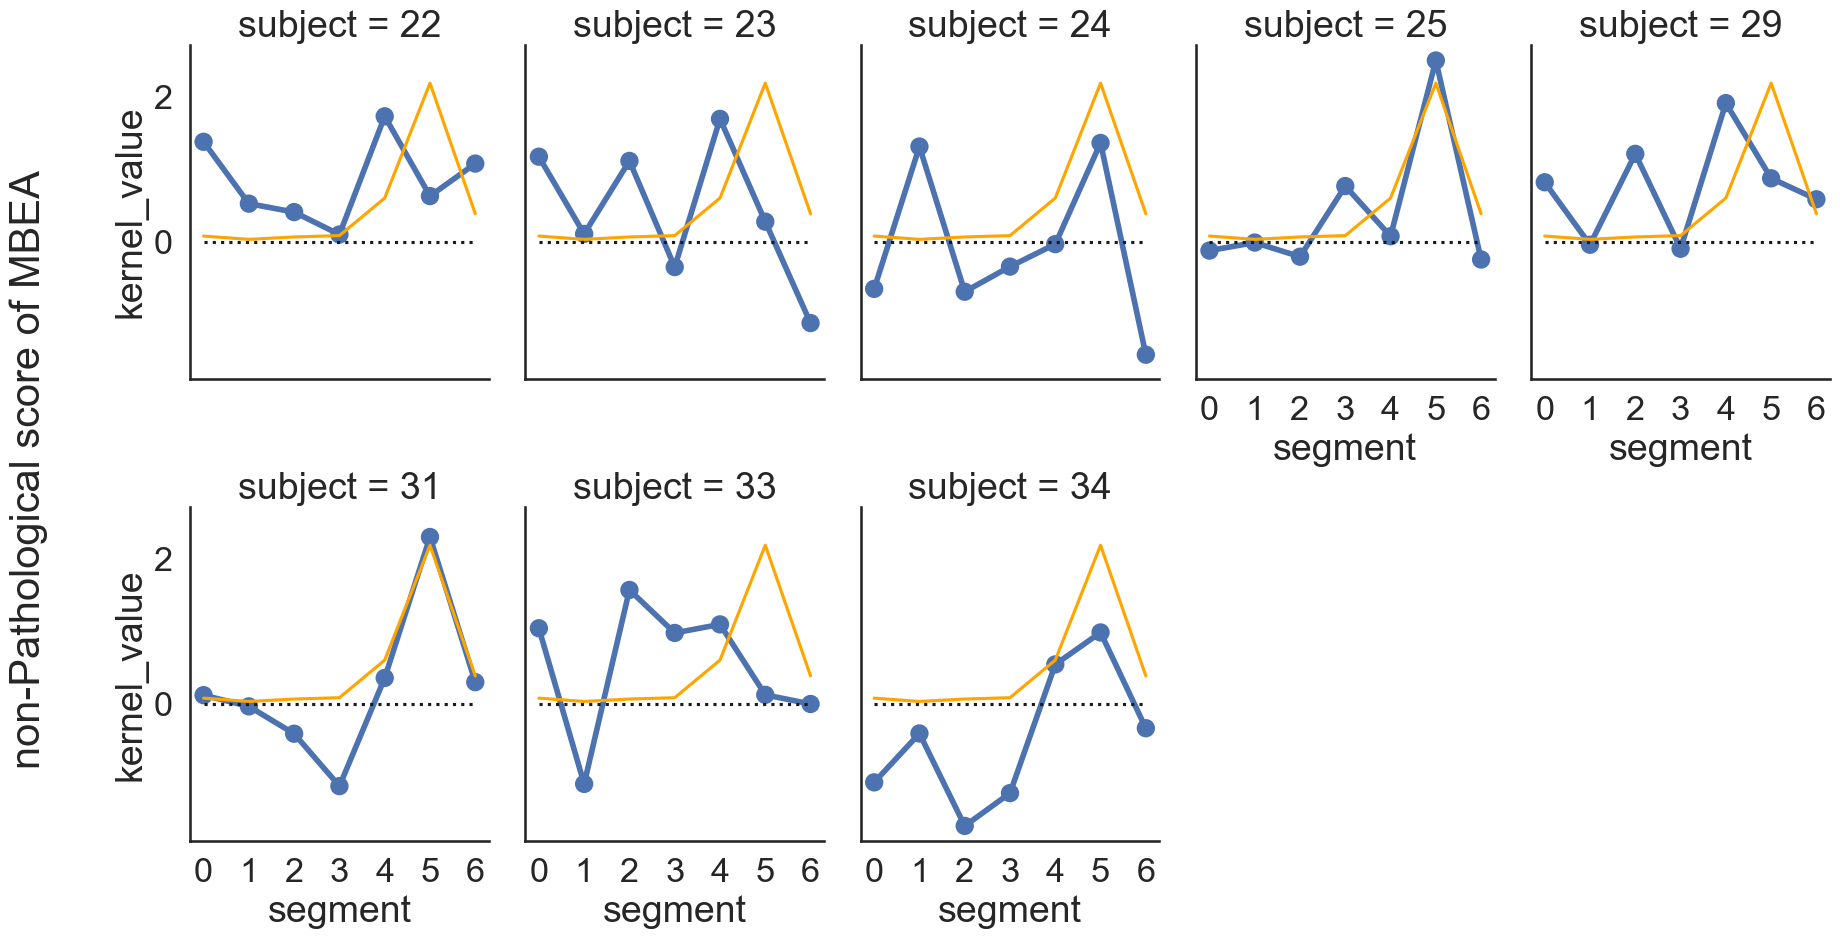

In [147]:
import seaborn as sns

# Set the seaborn context for larger plots
sns.set_context('talk', font_scale=1.5)

# Define the specific order of subjects
patient_sorted = [22, 23, 24, 25,29,  31,  33, 34]

new_aspect = 0.8  # This is just an example, you'll need to adjust this based on your actual previous aspect ratio
new_height = 5     # Assuming the height for the plots with 5 patients was 5

# Plotting the catplot for the patients data, ensuring the subjects are in the specified order
g = sns.catplot(x="segment", 
                y="kernel_value",
                col="subject",
                col_order=patient_sorted,
                col_wrap=5,
                height=new_height,  # Set the height to maintain the same plot size
                aspect=new_aspect,  # Adjust the aspect ratio accordingly
                data=kernels[(kernels.type=='patients') & (kernels.session==1)], 
                kind='point')

# Calculate the mean kernel value for the control group and reset index
control_kernels = kernels[kernels.type=='controls'].groupby('segment')['kernel_value'].mean().reset_index()

# Plot the control group kernel values and a dashed line at 0 for each subplot
axes = g.axes.flatten()
for axis in axes:
    axis.plot(control_kernels['segment'], control_kernels['kernel_value'], color='orange')
    axis.plot([0, 6], [0, 0], color='k', linestyle=':')
    
# Add a common Y-axis label
plt.subplots_adjust(left=0.13, right=0.95)  # Adjust subplot parameters to make room for the common Y-axis label
g.fig.text(0.04, 0.5, 'non-Pathological score of MBEA', va='center', rotation='vertical', fontsize=30)  # Adjust these parameters as needed

plt.show()



In [ ]:
mbeapat=clinical_data[['subject','mbea_total','type']]
mbeapat[mbeapat.type=='patients']

### Supplementary results for controls

In [159]:
clinical_data = pd.read_csv("data/clinical_data.csv", index_col=0)
kernels = pd.read_csv('data/kernels.csv', index_col=0)
revcor_measures = pd.read_csv("data/revcor_measures.csv", index_col=0)
revcor_data=pd.read_csv("data/revcor_data.csv", index_col=0)

#### Descriptive statistics

In [154]:
revcor_data.groupby('type').agg({'age':['mean','std']})

age           
               mean        std
type                          
controls  58.689655  13.120514
patients  57.551020  12.432837

In [155]:
#ages and sex normality assumption
controls_ages = clinical_data[clinical_data['type'] == 'controls']['age']
patients_ages = clinical_data[clinical_data['type'] == 'patients']['age']

print("Group 1 age normality:", shapiro(controls_ages))
print("Group 2 age normality:", shapiro(patients_ages))
mw_stat, mw_p_value = mannwhitneyu(controls_ages, patients_ages)
print("Mann-Whitney U test p-value:", mw_p_value)

contingency_table = pd.crosstab(clinical_data['type'], clinical_data['sex'])
contingency_table
chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test p-value:", chi2_p_value)

Group 1 age normality: ShapiroResult(statistic=0.9093655943870544, pvalue=0.04595136642456055)
Group 2 age normality: ShapiroResult(statistic=0.9193393588066101, pvalue=0.02267320081591606)
Mann-Whitney U test p-value: 0.9350592390291054
Chi-square test p-value: 0.43060556177584186


In [ ]:
revcor_data=pd.read_csv("data/revcor_data.csv", index_col=0)

In [161]:
trial_ids=['type','subject','session','experimentor']
kernels=classification_images.compute_kernel(revcor_data,trial_ids,'segment','response','pitch')
kernels

type  subject  session experimentor  segment  kernel_value
0    controls        0        1        aynaz        0      0.021588
1    controls        0        1        aynaz        1      0.170469
2    controls        0        1        aynaz        2     -0.381605
3    controls        0        1        aynaz        3     -0.543959
4    controls        0        1        aynaz        4      0.367073
..        ...      ...      ...          ...      ...           ...
541  patients       43        4       jeulin        2     -0.551440
542  patients       43        4       jeulin        3      0.731481
543  patients       43        4       jeulin        4      1.193138
544  patients       43        4       jeulin        5     -0.440765
545  patients       43        4       jeulin        6      2.109912

[546 rows x 6 columns]

#### Typicality of representation

For each patient/session, we quantify how similar their internal representation is from the control group's, by computing the mean squared error between the two representations. We will then use this "representation typicality" as a mesure to correlate with clinical measures.  

In [162]:
# compute average kernel from all participants tagged as "controls"
control_kernels = kernels[kernels['type']=='controls'].groupby('segment')['kernel_value'].mean().reset_index()
# match each patient kernel, at each segment, with the corresponding gain in the control kernel 
distances = pd.merge(kernels,control_kernels, on=["segment"])
#compute squared difference between patient and control kernel gains at each segment
distances["kernel_distance"] = (distances["kernel_value_x"] - distances["kernel_value_y"])**2
# and average over segments, for each patient
distances = distances.groupby(['experimentor','type','subject','session'])['kernel_distance'].mean().reset_index()
# and rescale as a similarity value
distances['kernel_typicality'] = ( distances.kernel_distance - distances.kernel_distance.max() ) / ( distances.kernel_distance.min() - distances.kernel_distance.max() )   

#### Internal noise

We compute participant's internal noise from the probability of agreement and probability of responding interval 1 across the double-pass trials, using the simulation procedure of Ponsot. 

##### Double pass measures
We first measure  probability of agreement and probability of responding interval 1 across the double-pass trials

##### Consistency measure

In [ ]:
revcor_data = utils.index_double_pass_trials(revcor_data, 
                               session_identifiers=['type','subject','session'],
                               trial_identifier='trial',
                               response_identifier='double_pass_id',
                               value_identifier='pitch')

In [ ]:
# compute probability of agreement
trial_ids=['type','subject','session','experimentor']
prob_agreement = utils.compute_prob_agreement(revcor_data,
                             session_identifiers=[ 'type', 'subject', 'session','experimentor'],
                             trial_identifier='trial',
                             response_identifier='response',
                             order_identifier='stim_order',
                             double_pass_identifier='double_pass_id')
prob_agreement = prob_agreement.dropna(subset=['double_pass_id']).groupby(trial_ids).pc_agree.mean()
prob_agreement

In [ ]:
# compute probability of responding interval 1
prob_int_1 = utils.compute_prob_interval1(revcor_data,
                             session_identifiers=[ 'type', 'subject', 'session','experimentor'],
                             trial_identifier='trial',
                             response_identifier='response',
                             order_identifier='stim_order',
                             double_pass_identifier='double_pass_id')
prob_int_1

In [ ]:
# merge both measures in a single df
internal_noise_measures = prob_int_1.merge(prob_agreement, on=trial_ids)
internal_noise_measures

##### Internal noise with non-null criteria
We estimate internal noise using a model allowing non-null bias for one response option

In [167]:
# load precomputed model or recompute if doesn't exist
MODEL_FILE = 'data/model_with_criteria_5.csv'
if os.path.isfile(MODEL_FILE): 
    model_with_criteria = pd.read_csv(MODEL_FILE, index_col=0)
else:
    model_with_criteria = grid.estimate_model(internal_noise_bounds=[0,5,0.05],criteria_bounds=[-5,5,0.05],n_trials=10000)
    model_with_criteria.to_csv(MODEL_FILE)

In [168]:
internal_noise_measures['criteria'] = internal_noise_measures.apply(lambda row: grid.invert_model(model_with_criteria, 
                                                                                      row.pc_agree, 
                                                                                      row.p_int1)[0], axis=1)
internal_noise_measures['internal_noise_with_criteria'] = internal_noise_measures.apply(lambda row: grid.invert_model(model_with_criteria, 
                                                                                      row.pc_agree, 
                                                                                      row.p_int1)[1], axis=1)

To correlate criteria with clinical measures, we replace it with its absolute value (with the rationale that the further it departs from zero, the more biased the participant is)

In [169]:
internal_noise_measures.criteria = np.abs(internal_noise_measures.criteria)

In [ ]:
unique_revcor_data = revcor_data.drop_duplicates(subset=['subject', 'experimentor'], keep='first')
internal_noise_measures = pd.merge(internal_noise_measures, unique_revcor_data[['subject', 'experimentor']],
                     on=['subject', 'experimentor'], how='left')
internal_noise_measures

In [ ]:
revcor_measures[revcor_measures.internal_noise_with_criteria>4]

In [215]:
new_data = revcor_data.copy()
grouped_data=new_data[new_data.session==1].groupby(['type','block','subject']).agg({'rt':'mean'})
grouped_data[grouped_data['rt'] < 770]

rt
type     block subject        
controls 2     6        764.16
               16       757.88
         3     16       740.64
patients 2     37       600.16
         3     23       753.50
               29       768.00
               37       613.96

(0.0, 5000.0)

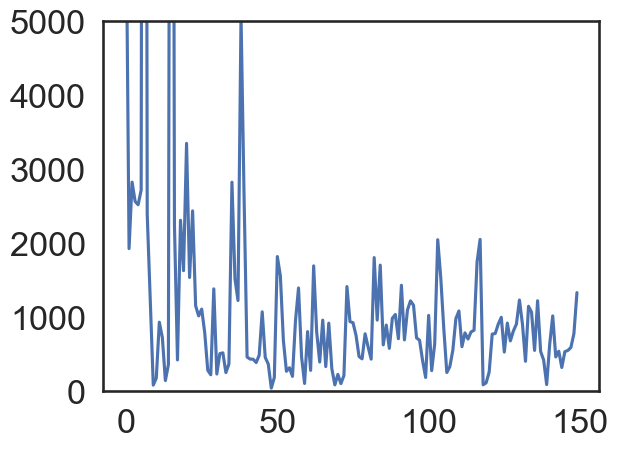

In [175]:
grouped_data=new_data[new_data.subject==6].groupby(['trial']).agg({'rt':'mean'}).reset_index()
plt.plot(grouped_data.trial, grouped_data.rt)
plt.ylim([0,5000])

#### Accuracy

We compute the participant's accuracy on the task as a measure of how well the participant performs compared to an ideal participant model having the control group as an internal representation and zero internal noise. Accuracy therefore combines both internal representation and noise in a single measure. 

In [176]:
control_kernel = kernels[kernels.type=='controls'].groupby(['segment'], as_index=False).kernel_value.mean()

accuracy=classification_images.compute_accuracy(revcor_data,#[revcor_data.experimentor=='ponsot'],
                                                control_kernel = list(control_kernel.kernel_value),
                                                session_identifiers = ['experimentor','type','subject','session'],
                                                trial_identifier = 'trial',
                                                stimulus_dimension='segment',
                                                stimulus_value = 'pitch',
                                                stimulus_response='response')

accuracy = accuracy.rename(columns={'hit':'accuracy'})

<AxesSubplot: xlabel='type', ylabel='accuracy'>

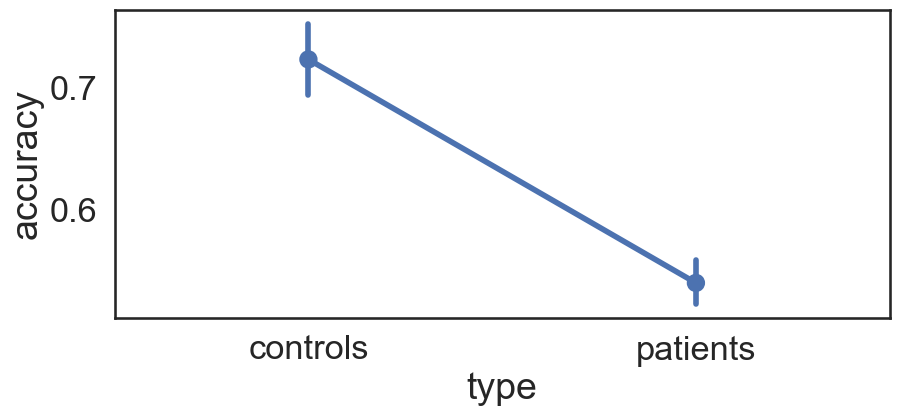

In [177]:
plt.subplots(figsize=(10,4))
sns.pointplot(data=accuracy, x='type',y='accuracy')

#### Merge revcor measures

In [178]:
revcor_measures = distances.merge(internal_noise_measures, how='left',on= trial_ids).merge(accuracy, how='left', on=trial_ids )

In [179]:
revcor_measures.groupby(['type','session']).agg({'subject':'count',
                                                                'kernel_typicality':['mean','std'],
                                                                'internal_noise_with_criteria':['mean','std','max'],
                                                                'criteria':['mean','std'],
                                                                'accuracy':['mean','std']})

subject kernel_typicality            \
                   count              mean       std   
type     session                                       
controls 1            22          0.933056  0.106220   
         2             7          0.966704  0.017931   
patients 1            22          0.665964  0.255932   
         2             9          0.396028  0.234057   
         3             9          0.587154  0.247253   
         4             9          0.537137  0.263884   

                 internal_noise_with_criteria                  criteria  \
                                         mean       std   max      mean   
type     session                                                          
controls 1                           0.890909  0.967525  4.90  0.686364   
         2                           0.542857  0.367909  1.20  0.321429   
patients 1                           2.543182  1.900332  4.90  1.781818   
         2                           3.683333  1.706239  5.00  1.577778   
         3                           3.083333  1.753390  4.95  0.950000   
         4                           2.911111  1.365141  4.95  2.122222   

                            accuracy            
                       std      mean       std  
type     session                                
controls 1        0.941147  0.707879  0.085638  
         2        0.232481  0.772381  0.045122  
patients 1        1.702907  0.559394  0.082933  
         2        0.841914  0.497778  0.035277  
         3        0.826136  0.547407  0.046838  
         4        2.221220  0.525185  0.054750

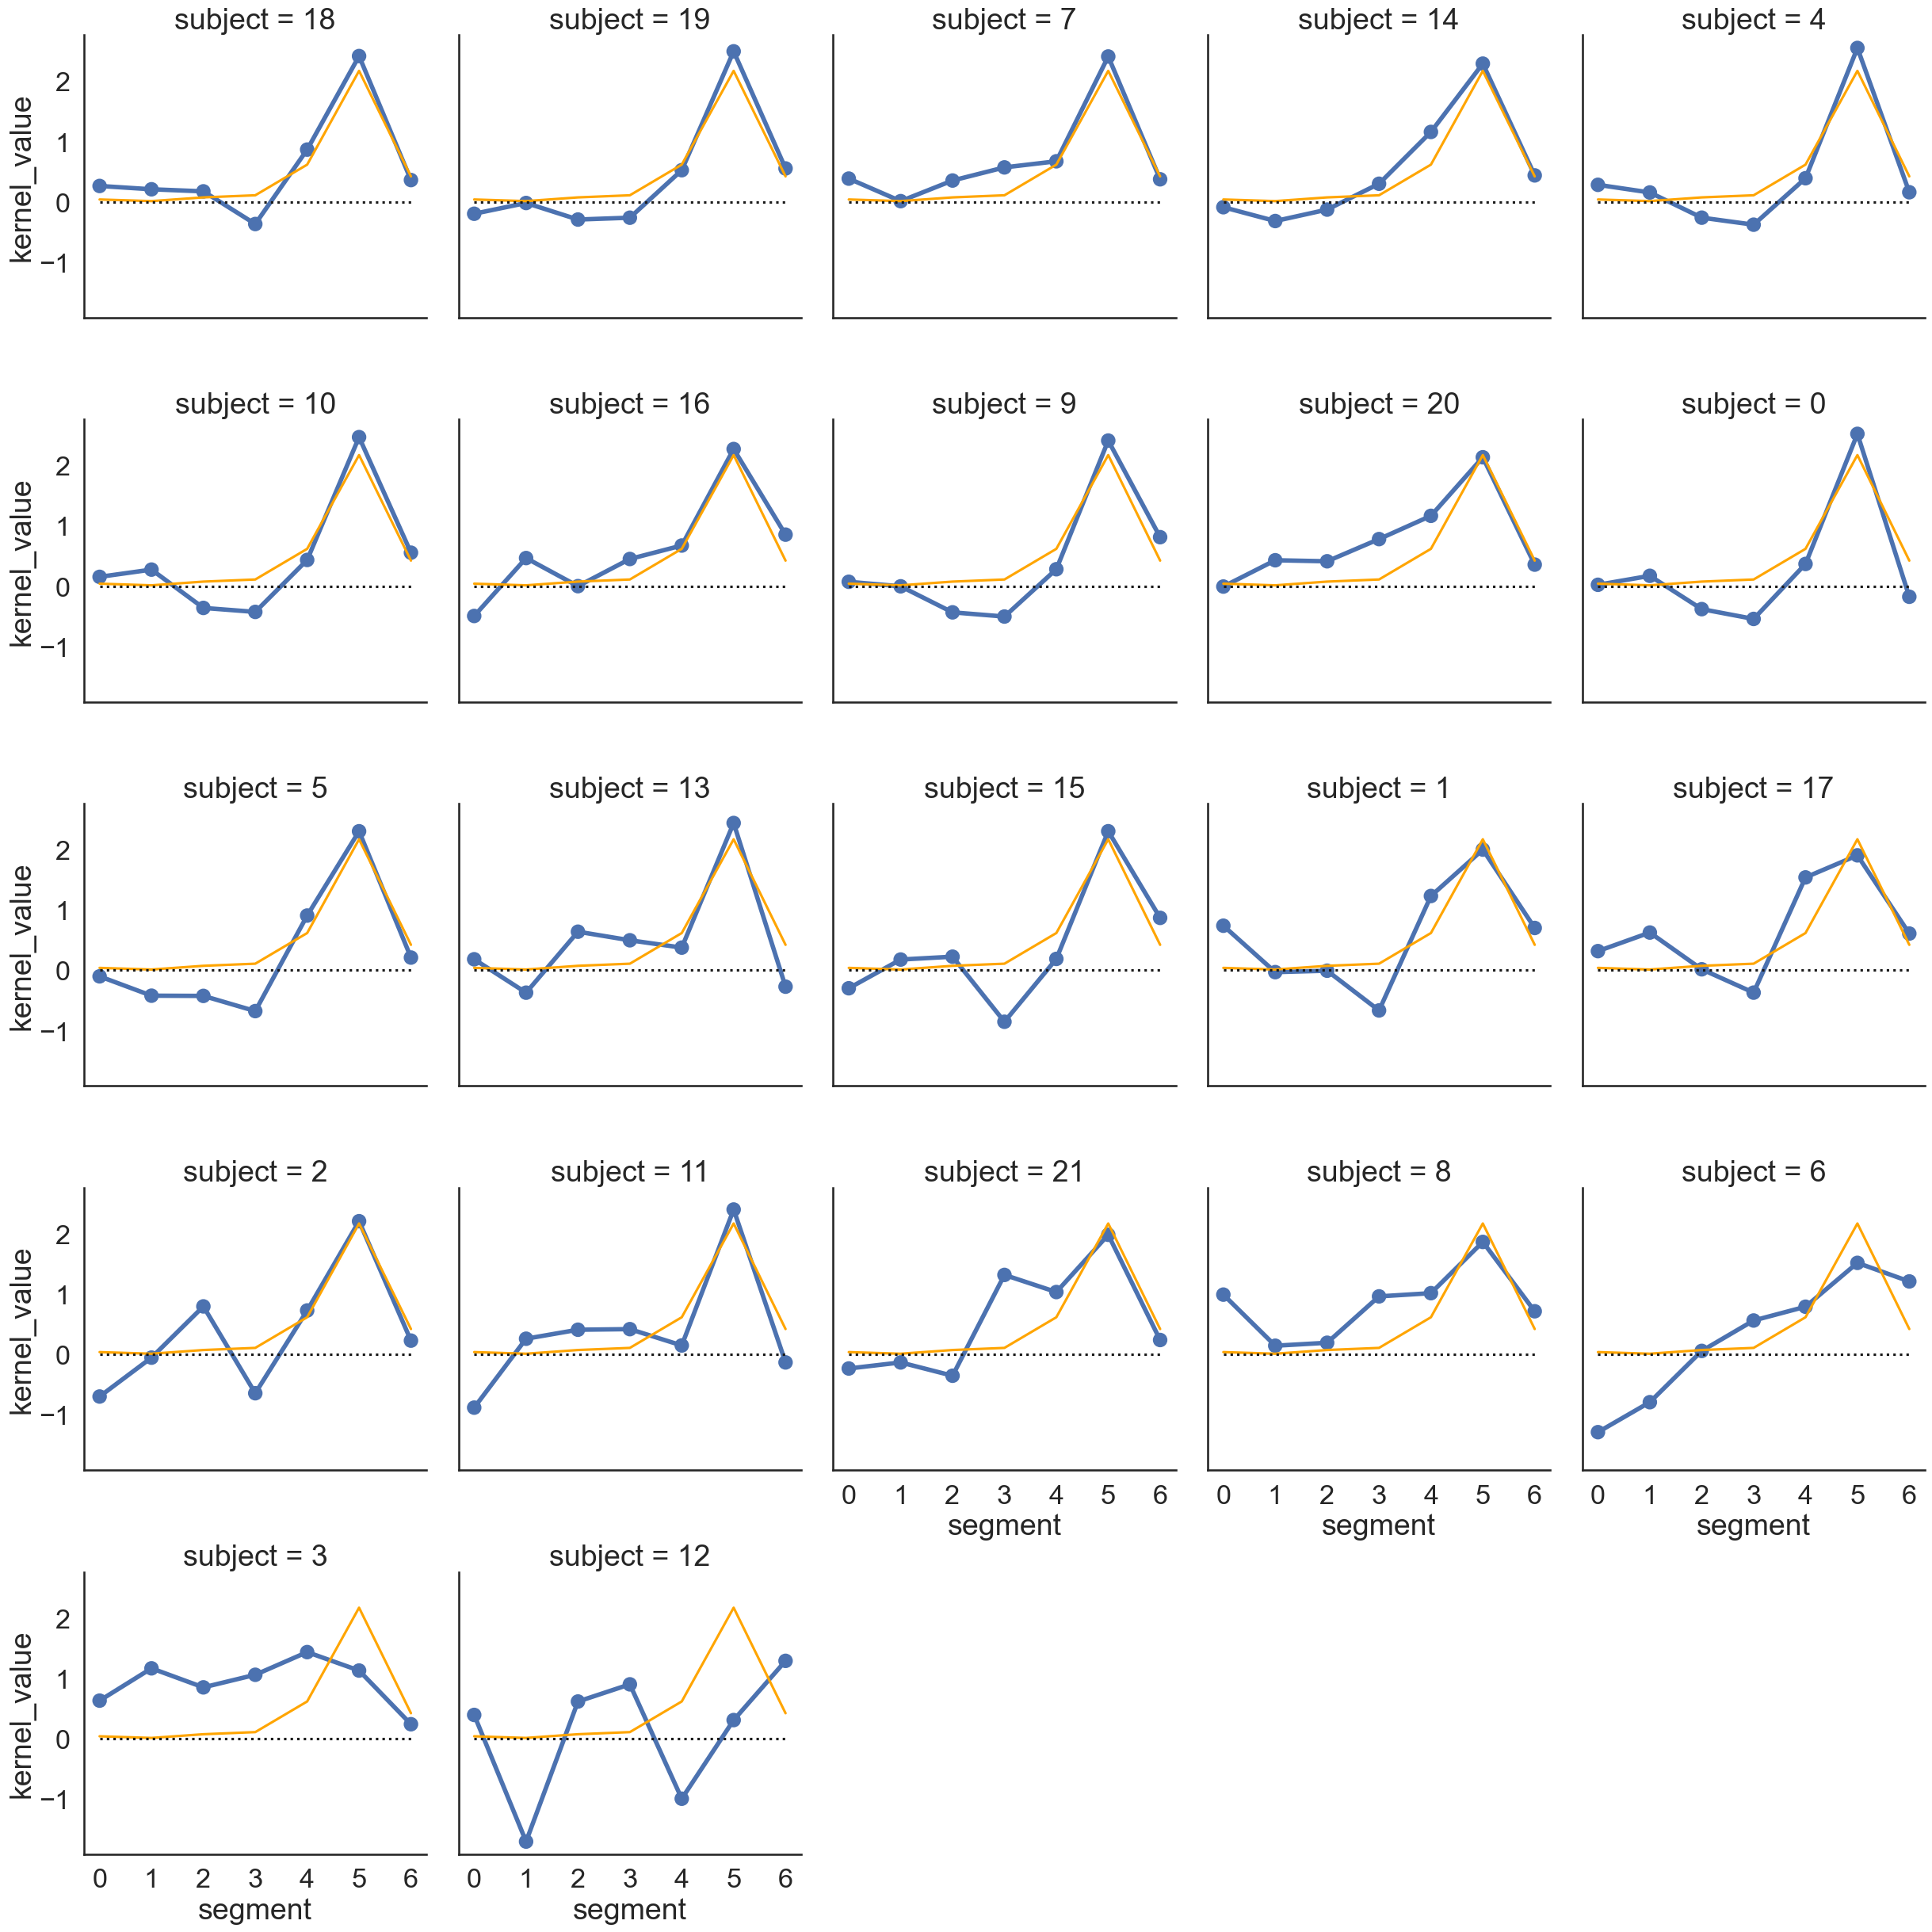

In [180]:
sns.set_context('talk', font_scale=1.5) 
controls_sorted = revcor_measures[(revcor_measures.type=='controls')
                                &(revcor_measures.session==1)].sort_values(by='kernel_distance').subject.values

g = sns.catplot(x="segment", 
                y="kernel_value",
                col = "subject",
                col_order = controls_sorted,
                col_wrap=5,
                data=kernels[(kernels.type=='controls')&(kernels.session==1)], 
                kind='point')
control_kernels = kernels[kernels.type=='controls'].groupby('segment')['kernel_value'].mean().reset_index()
axes =  g.axes.flatten()
for axis in axes:
    axis.plot(control_kernels['segment'], control_kernels['kernel_value'], color='orange')
    axis.plot([0,6],[0,0],color='k',linestyle = ':')

In [181]:
clinical_data = pd.read_csv("data/clinical_data.csv", index_col=0)

In [ ]:
print(kernels.groupby(['experimentor','session','type']).agg({'subject':'unique'}))
print(revcor_measures.groupby(['experimentor','session','type']).agg({'subject':'unique'}))
print(clinical_data.groupby(['experimentor','session','type']).agg({'subject':'unique'}))
print(revcor_data.groupby(['experimentor','session','type']).agg({'subject':'unique'}))

In [ ]:
revcor_data.groupby('type').agg({'age':['mean','std']})

In [183]:
#ages and sex normality assumption
controls_ages = clinical_data[clinical_data['type'] == 'controls']['age']
patients_ages = clinical_data[clinical_data['type'] == 'patients']['age']

print("Group 1 age normality:", shapiro(controls_ages))
print("Group 2 age normality:", shapiro(patients_ages))
mw_stat, mw_p_value = mannwhitneyu(controls_ages, patients_ages)
print("Mann-Whitney U test p-value:", mw_p_value)

contingency_table = pd.crosstab(clinical_data['type'], clinical_data['sex'])
contingency_table
chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square test p-value:", chi2_p_value)

Group 1 age normality: ShapiroResult(statistic=0.9093655943870544, pvalue=0.04595136642456055)
Group 2 age normality: ShapiroResult(statistic=0.9193393588066101, pvalue=0.02267320081591606)
Mann-Whitney U test p-value: 0.9350592390291054
Chi-square test p-value: 0.43060556177584186


#### Reverse correlation measures differentiate patients and controls 

While internal representations for both controls and kernels had a characteristic rising shape, patient representations significantly differed from controls ...

#### Comparison of kernel typicality

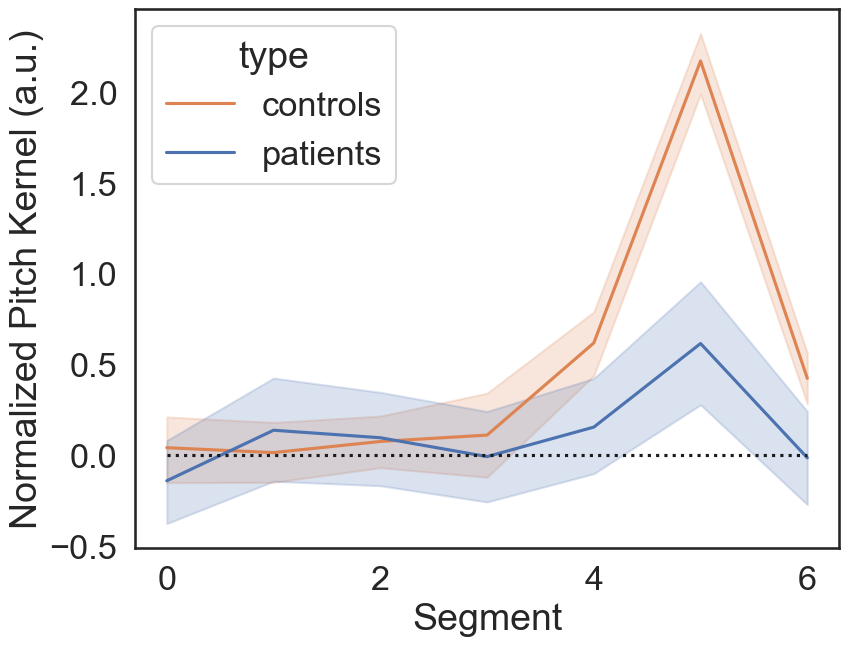

In [184]:
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
custom_palette = {"controls": sns.color_palette()[1], "patients": sns.color_palette()[0]}
sns.lineplot(x="segment", 
                  y="kernel_value",
                  hue ='type',
                  data=kernels,
             palette=custom_palette, 
                  ci=95)
plt.xlabel("Segment")
plt.ylabel("Normalized Pitch Kernel (a.u.)")
plt.plot([0,6],[0,0],color='k',linestyle = ':')

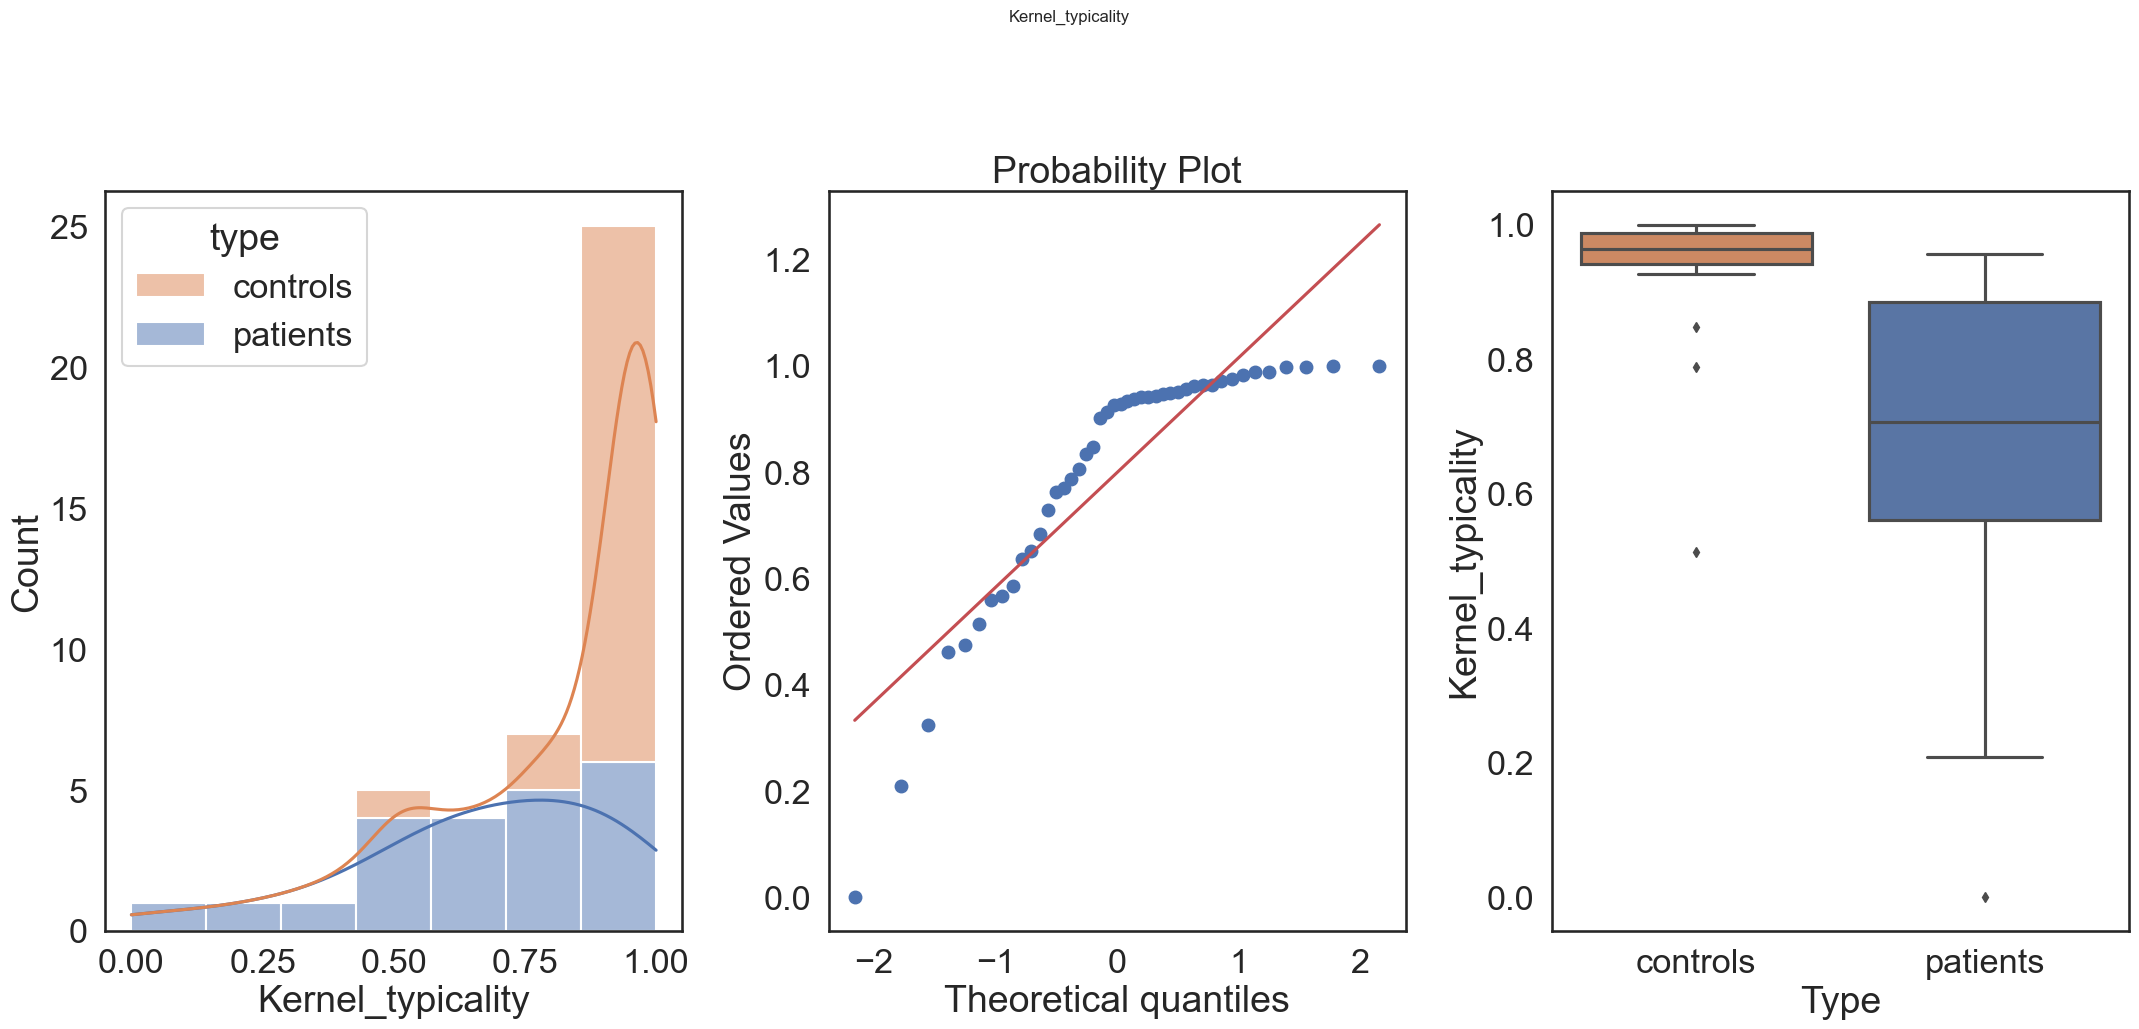

In [185]:
explore_distribution(data=revcor_measures[revcor_measures.session==1], group='type', measures = ['kernel_typicality'])

In [186]:
from scipy.stats import shapiro
df=revcor_measures[revcor_measures.session==1]
patients = df[df['type'] == 'patients']['kernel_typicality']
controls = df[df['type'] == 'controls']['kernel_typicality']

print("patients normality:", shapiro(patients))
print("controls normality:", shapiro(controls))

patients normality: ShapiroResult(statistic=0.913093090057373, pvalue=0.05476732552051544)
controls normality: ShapiroResult(statistic=0.5806598663330078, pvalue=8.273800062852388e-07)


In [187]:
display_group_comparisons_stat(data=revcor_measures[revcor_measures.session==1], 
                               group='type', 
                               measures = ['kernel_typicality'])

------------------------------------
Mann-Whitney U Test for KERNEL_TYPICALITY and TYPE
Med = 0.26 [0.13 - 0.39]
M = 0.27 [0.16 - 0.38], U=436.00, r=-0.80, p (uncorrected)=0.000, p (Bonferroni corrected)=0.000


<Figure size 2000x500 with 0 Axes>

#### Comparison of internal noise

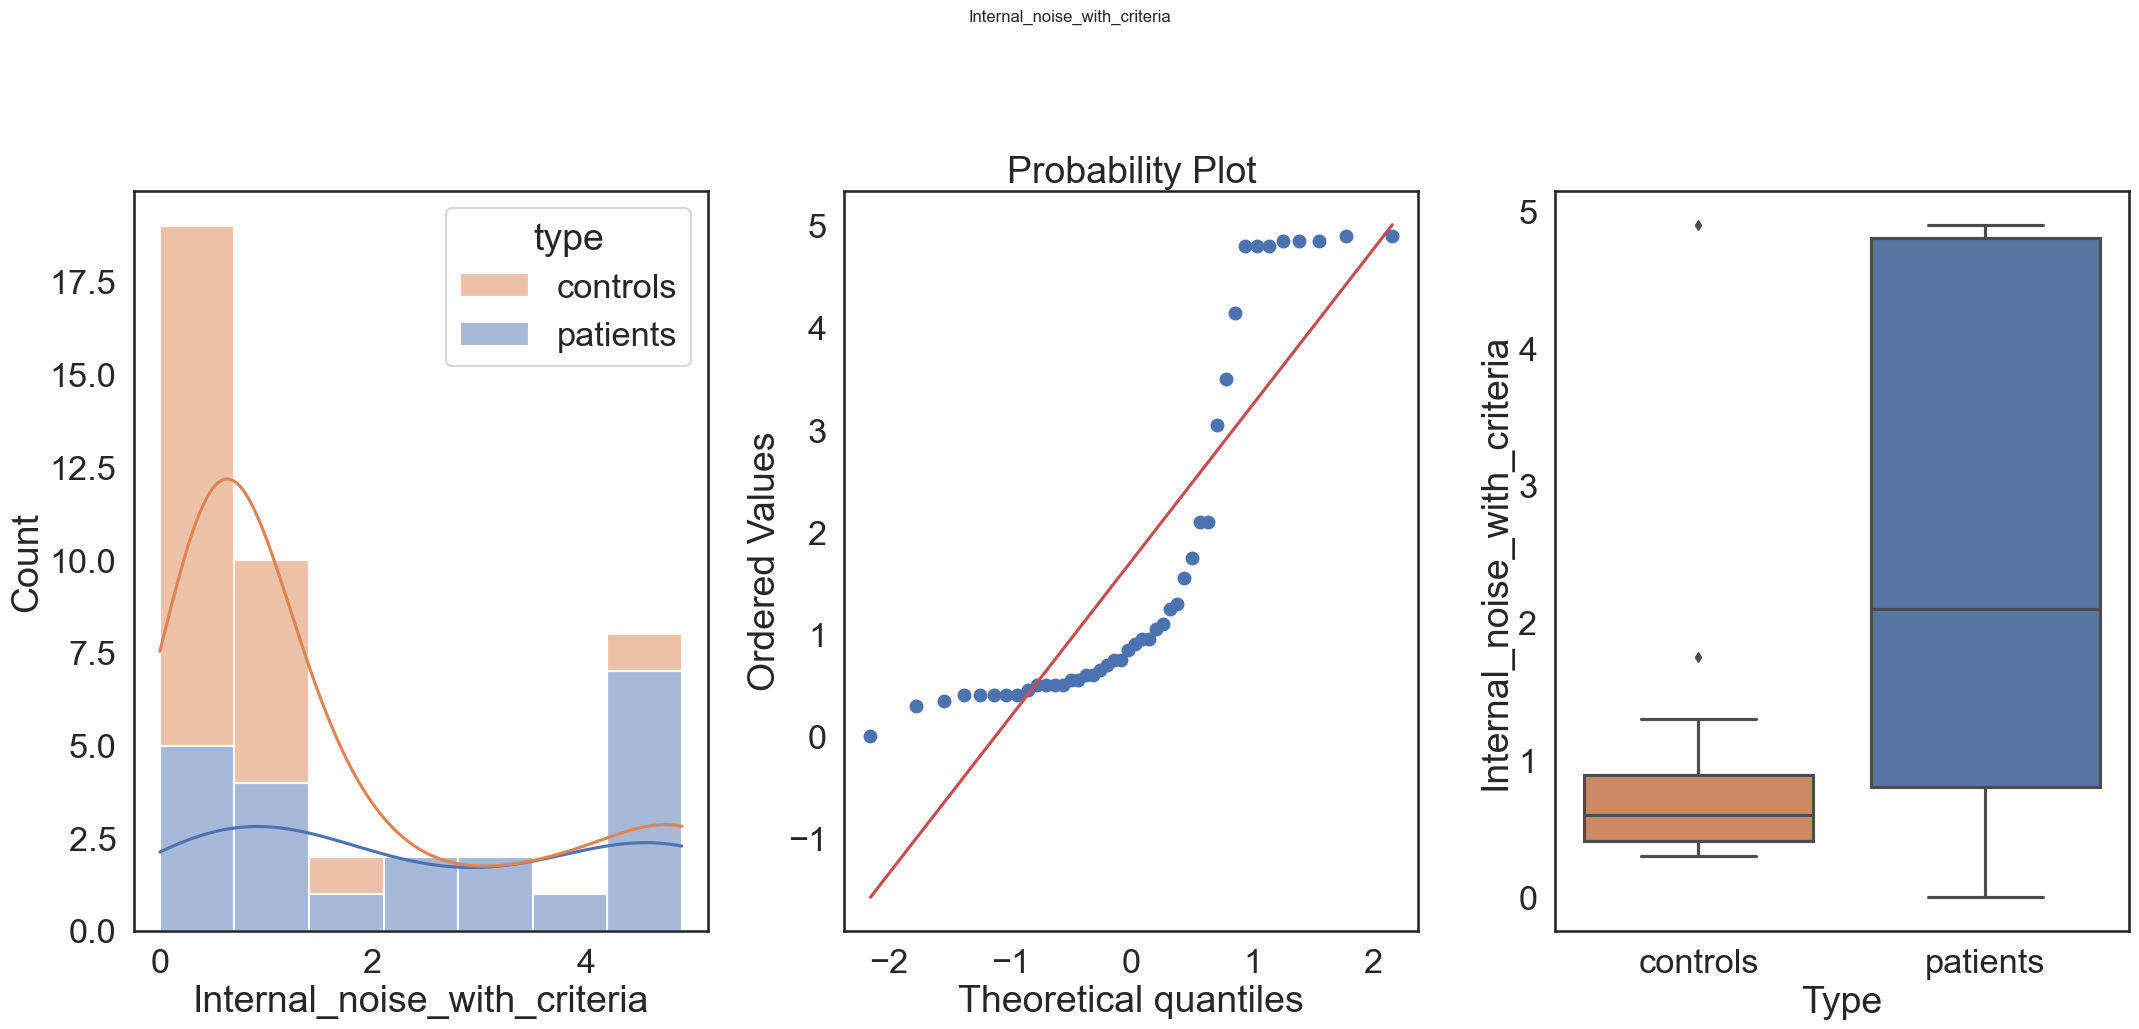

In [188]:
explore_distribution(data=revcor_measures[revcor_measures.session==1], group='type', measures = ['internal_noise_with_criteria'])

In [189]:
from scipy.stats import shapiro
df=revcor_measures[revcor_measures.session==1]
patients = df[df['type'] == 'patients']['internal_noise_with_criteria']
controls = df[df['type'] == 'controls']['internal_noise_with_criteria']

print("patients normality:", shapiro(patients))
print("controls normality:", shapiro(controls))

patients normality: ShapiroResult(statistic=0.8343663215637207, pvalue=0.00181852956302464)
controls normality: ShapiroResult(statistic=0.5366917848587036, pvalue=2.9607690521515906e-07)


In [190]:
display_group_comparisons_stat(data=revcor_measures[revcor_measures.session==1], group='type', measures = ['internal_noise_with_criteria'])

------------------------------------
Mann-Whitney U Test for INTERNAL_NOISE_WITH_CRITERIA and TYPE
Med = -1.50 [-3.97 - -0.25]
M = -1.65 [-2.52 - -0.77], U=116.50, r=0.52, p (uncorrected)=0.003, p (Bonferroni corrected)=0.003


<Figure size 2000x500 with 0 Axes>

#### Patient variability
We sort patients by decreasing similarity to the control group, and display each individual kernel

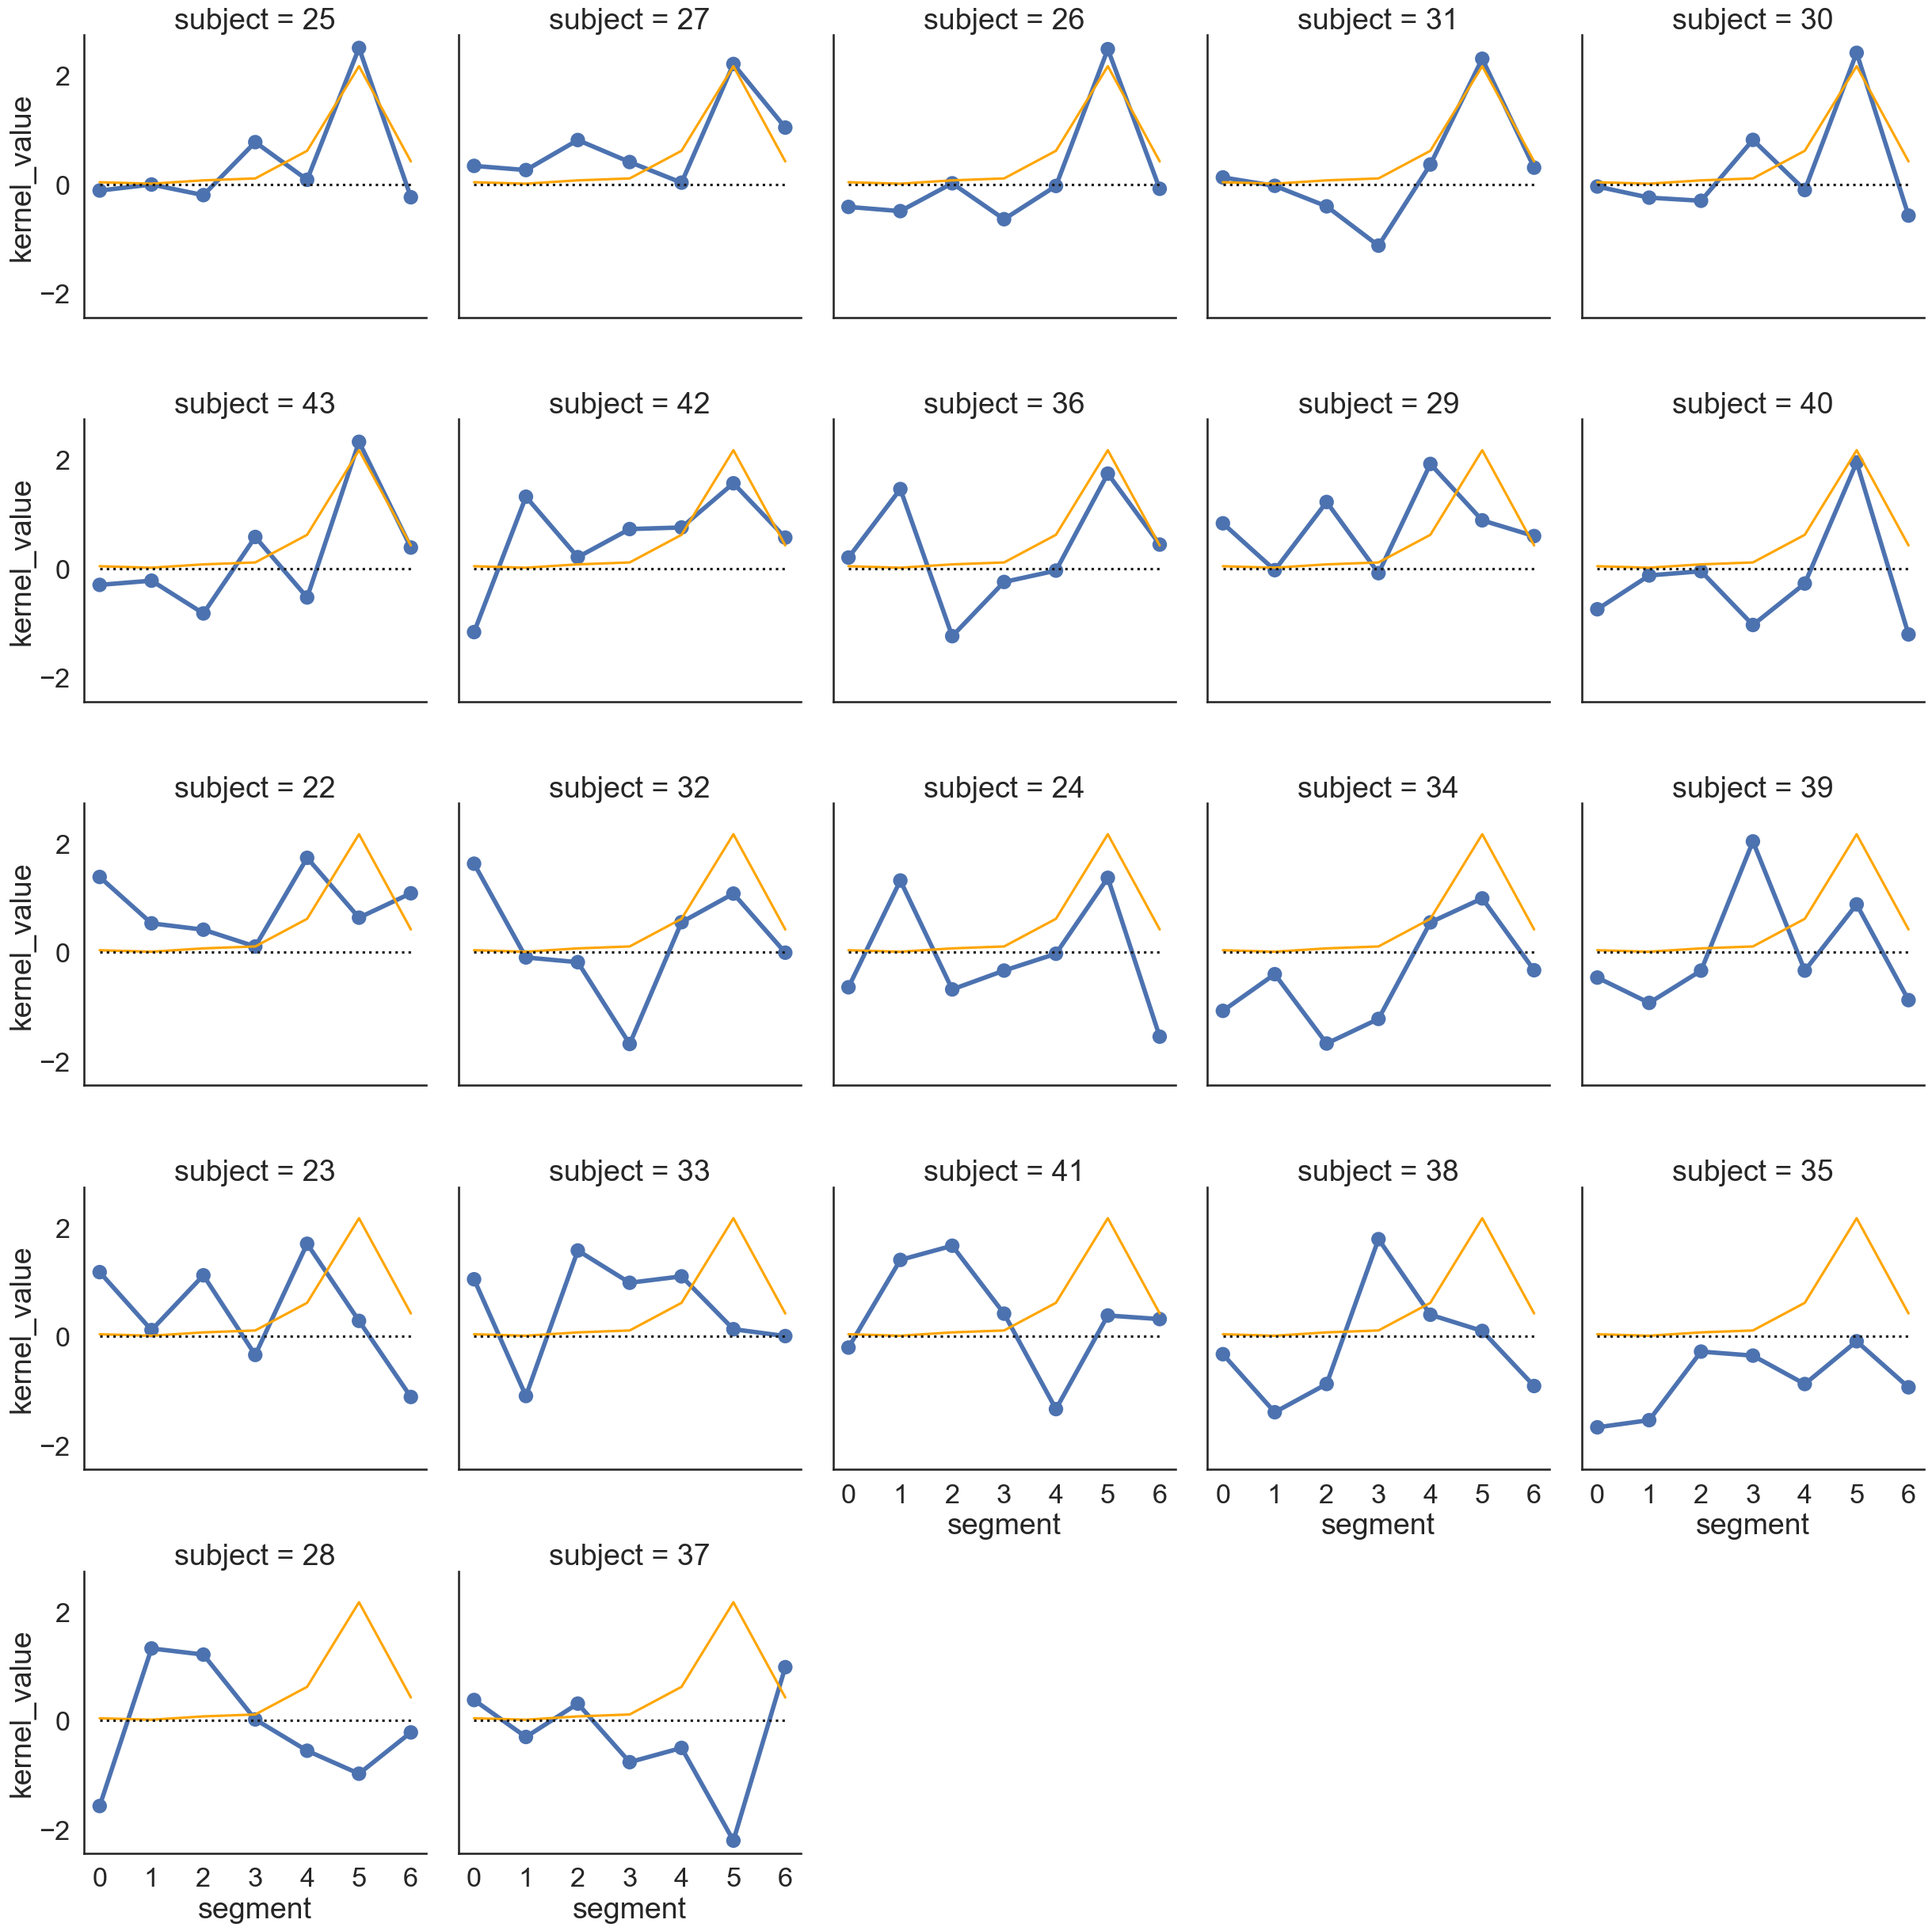

In [191]:
sns.set_context('talk', font_scale=1.5) 
patient_sorted = revcor_measures[(revcor_measures.type=='patients')
                                &(revcor_measures.session==1)].sort_values(by='kernel_distance').subject.values

g = sns.catplot(x="segment", 
                y="kernel_value",
                col = "subject",
                col_order = patient_sorted,
                col_wrap=5,
                data=kernels[(kernels.type=='patients')&(kernels.session==1)], 
                kind='point')

control_kernels = kernels[kernels.type=='controls'].groupby('segment')['kernel_value'].mean().reset_index()
axes =  g.axes.flatten()
for axis in axes:
    axis.plot(control_kernels['segment'], control_kernels['kernel_value'], color='orange')
    axis.plot([0,6],[0,0],color='k',linestyle = ':')

### Reverse correlation measures are correlated to deficits of prosodic perception as measured by MEC

We correlate revcor measures obtained within the patient group with the three MEC measures.


In [192]:
data = revcor_measures[revcor_measures.type=='patients'].merge(clinical_data[['experimentor','type','subject','session',
                                                                               'prosodie_C', 'prosodie_R', 'mec']], 
                                                               how='left',
                                                                on = ['experimentor','type','subject','session'])

<mark> Question whether data should be restricted to session = 1 (i.e. if different observations for the same patient should be counted as independent points) 

In [193]:
data =  data[data.session == 1]

##### MEC_total

KERNEL_TYPICALITY ~ MEC

Normality Test of Residuals for kernel_typicality
------------------------------------
p-value for normality: AD 0.0285 KS 0.1696

Homoscedasticity Test of Residuals for kernel_typicality
------------------------------------
p-value for homoscedasticity: 0.3888
INTERNAL_NOISE_WITH_CRITERIA ~ MEC

Normality Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for normality: AD 0.0249 KS 0.0283

Homoscedasticity Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for homoscedasticity: 0.2108
ACCURACY ~ MEC

Normality Test of Residuals for accuracy
------------------------------------
p-value for normality: AD 0.9826 KS 0.9896

Homoscedasticity Test of Residuals for accuracy
------------------------------------
p-value for homoscedasticity: 0.0408


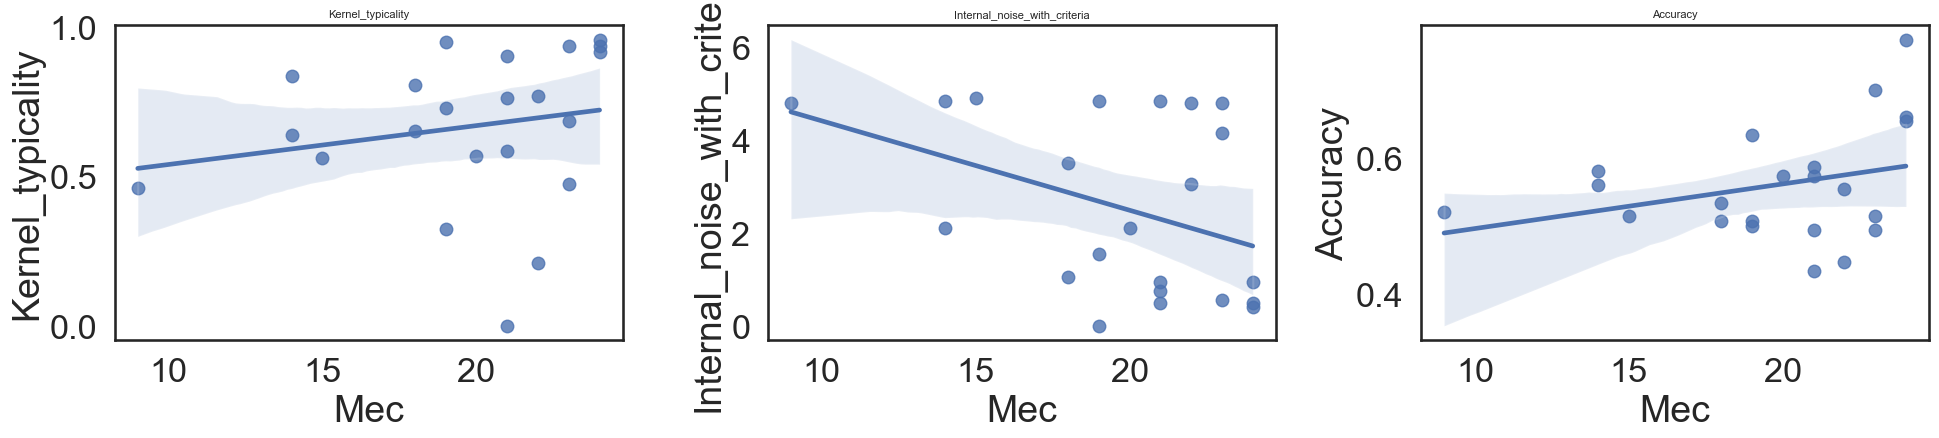

In [194]:
display_regressions_assumptions(data, predictor='mec', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

------------------------------------
KERNEL_TYPICALITY ~ MEC
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.8045
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.380
Time:                        15:39:58   Log-Likelihood:               -0.28853
No. Observations:                  22   AIC:                             4.577
Df Residuals:                      20   BIC:                             6.759
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

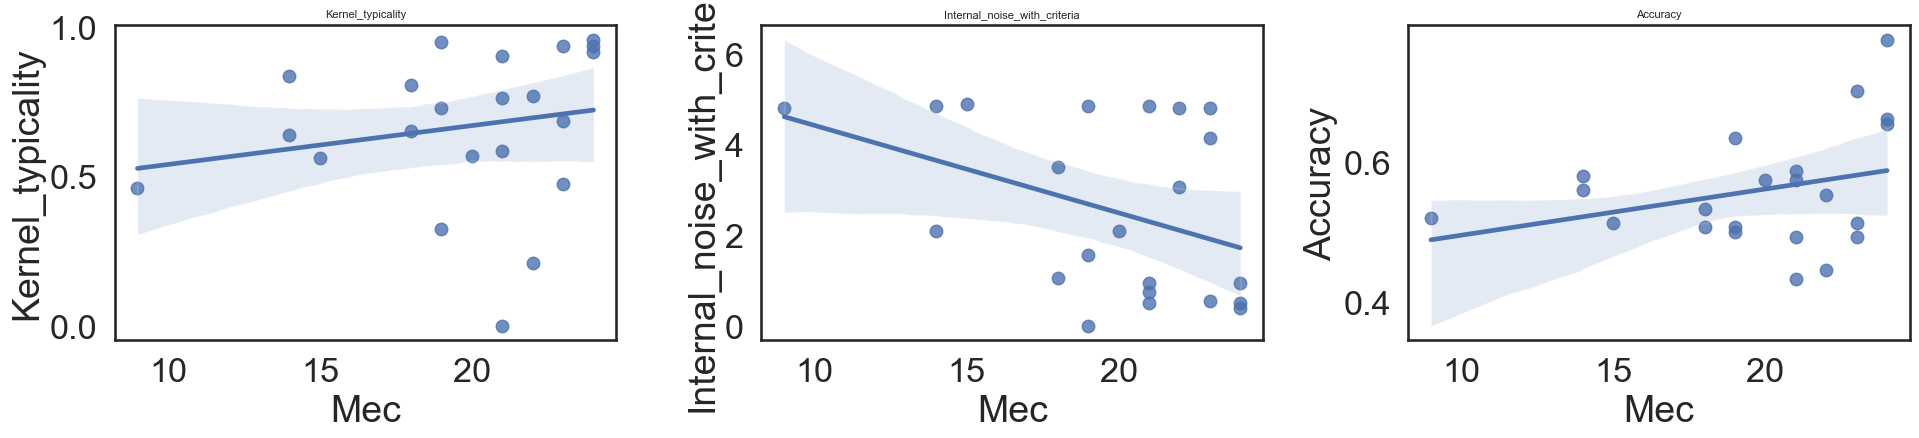

In [195]:
display_regressions(data, predictor='mec', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

##### MEC Comprehension

KERNEL_TYPICALITY ~ PROSODIE_C

Normality Test of Residuals for kernel_typicality
------------------------------------
p-value for normality: AD 0.0108 KS 0.1217

Homoscedasticity Test of Residuals for kernel_typicality
------------------------------------
p-value for homoscedasticity: 0.6140
INTERNAL_NOISE_WITH_CRITERIA ~ PROSODIE_C

Normality Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for normality: AD 0.0432 KS 0.0459

Homoscedasticity Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for homoscedasticity: 0.2927
ACCURACY ~ PROSODIE_C

Normality Test of Residuals for accuracy
------------------------------------
p-value for normality: AD 0.8976 KS 0.8536

Homoscedasticity Test of Residuals for accuracy
------------------------------------
p-value for homoscedasticity: 0.0869


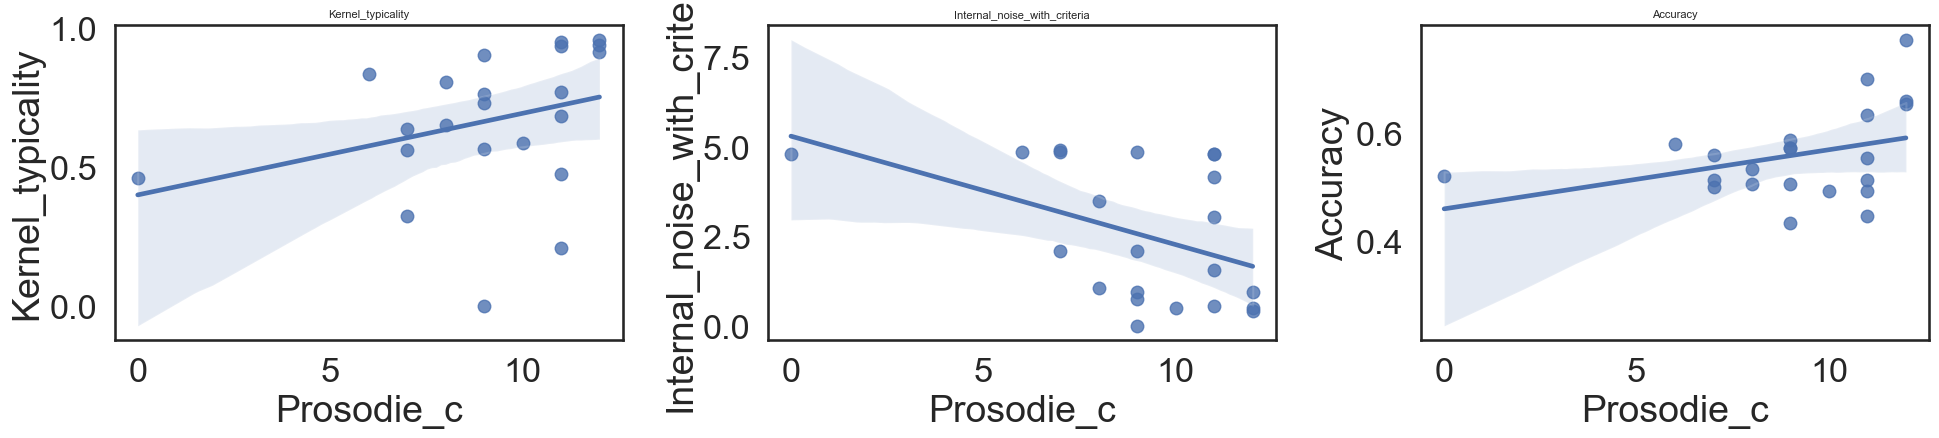

In [196]:
display_regressions_assumptions(data, predictor='prosodie_C', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

------------------------------------
KERNEL_TYPICALITY ~ PROSODIE_C
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.150
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.158
Time:                        15:39:59   Log-Likelihood:                0.40094
No. Observations:                  22   AIC:                             3.198
Df Residuals:                      20   BIC:                             5.380
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

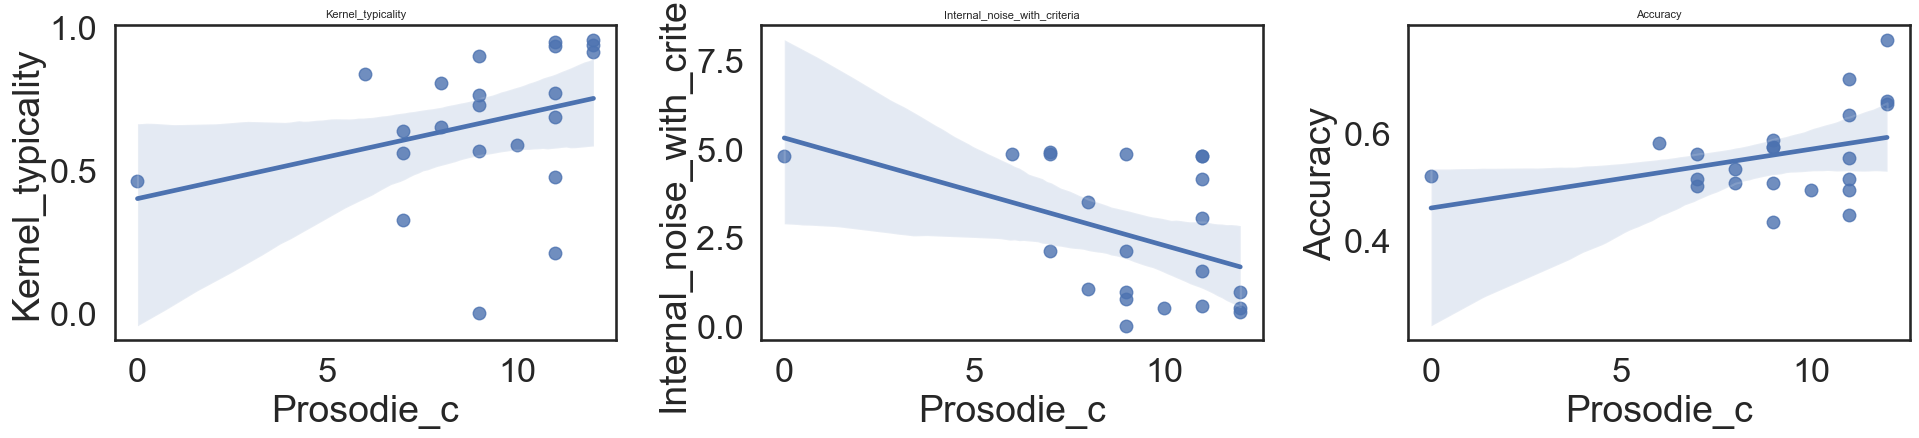

In [197]:
display_regressions(data, predictor='prosodie_C', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

##### MEC repetition

------------------------------------
KERNEL_TYPICALITY ~ PROSODIE_R
                            OLS Regression Results                            
Dep. Variable:      kernel_typicality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                   0.05695
Date:                Fri, 29 Mar 2024   Prob (F-statistic):              0.814
Time:                        15:40:00   Log-Likelihood:               -0.69107
No. Observations:                  22   AIC:                             5.382
Df Residuals:                      20   BIC:                             7.564
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

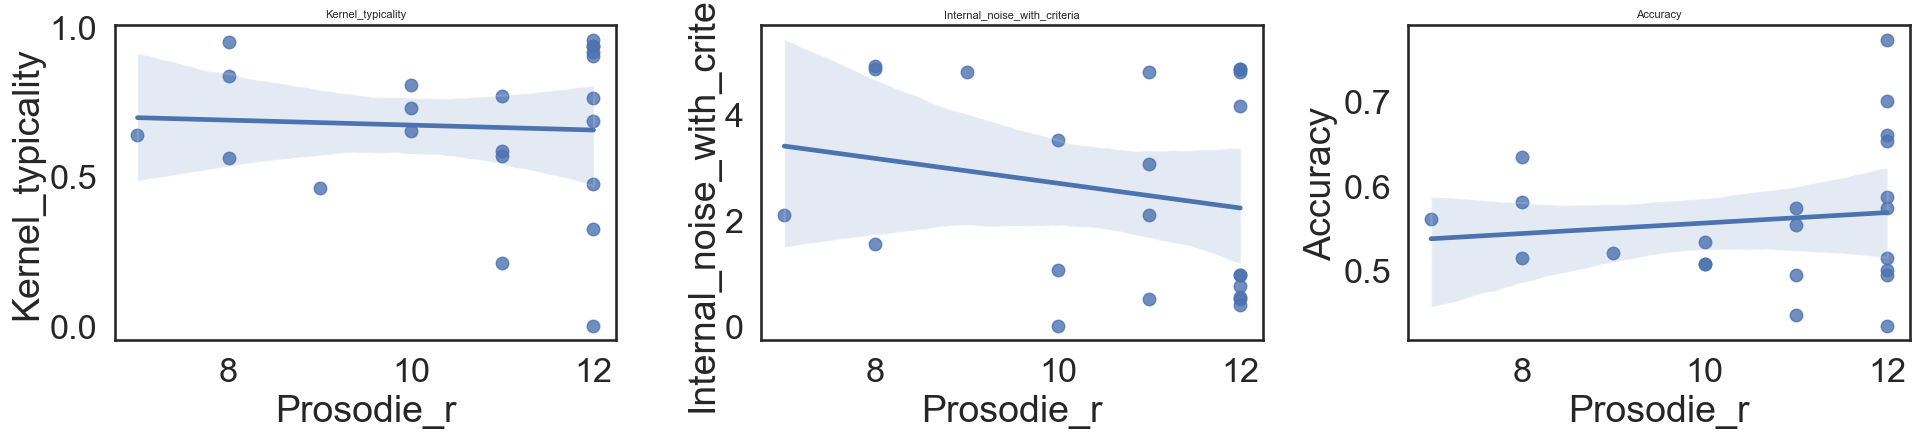

In [198]:
display_regressions(data, predictor='prosodie_R', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

KERNEL_TYPICALITY ~ PROSODIE_R

Normality Test of Residuals for kernel_typicality
------------------------------------
p-value for normality: AD 0.1958 KS 0.5770

Homoscedasticity Test of Residuals for kernel_typicality
------------------------------------
p-value for homoscedasticity: 0.1526
INTERNAL_NOISE_WITH_CRITERIA ~ PROSODIE_R

Normality Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for normality: AD 0.0014 KS 0.0010

Homoscedasticity Test of Residuals for internal_noise_with_criteria
------------------------------------
p-value for homoscedasticity: 0.3271
ACCURACY ~ PROSODIE_R

Normality Test of Residuals for accuracy
------------------------------------
p-value for normality: AD 0.4006 KS 0.6092

Homoscedasticity Test of Residuals for accuracy
------------------------------------
p-value for homoscedasticity: 0.0967


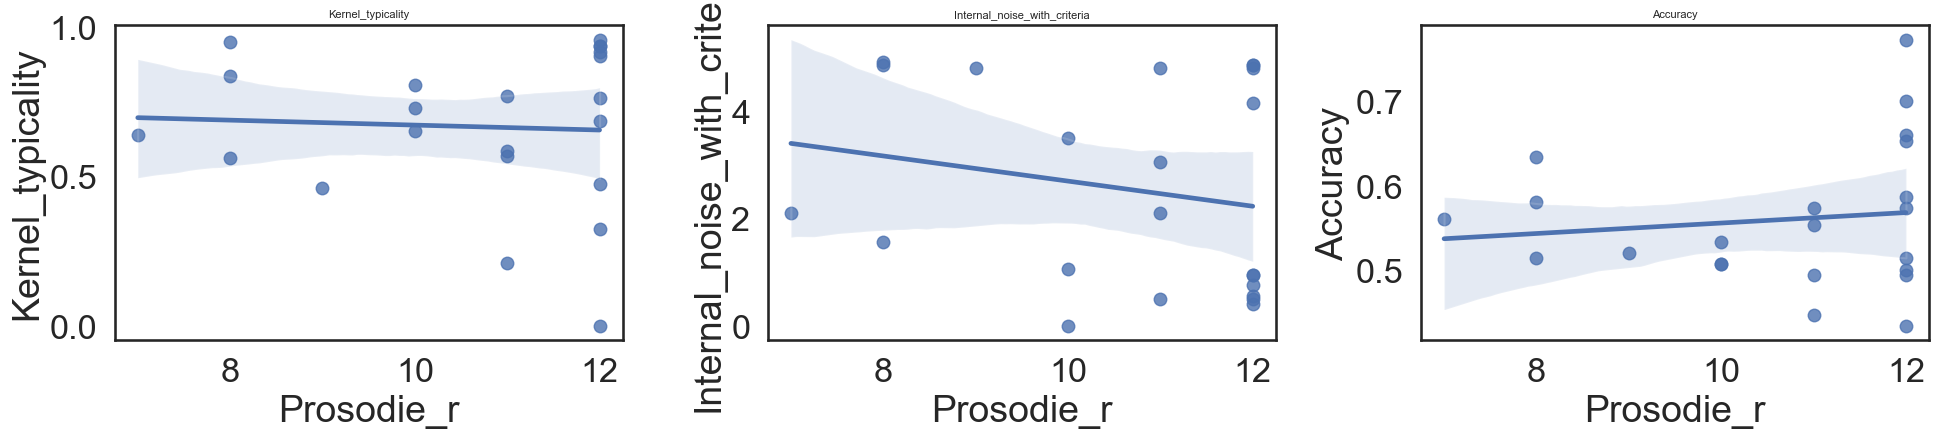

In [199]:
display_regressions_assumptions(data, predictor='prosodie_R', outcomes = ['kernel_typicality',
                                                                           'internal_noise_with_criteria',
                                                                           'accuracy'])

Note MEC comprehension and repetition are correlated

In [200]:
correlation = data['prosodie_C'].corr(data['prosodie_R'])
print(correlation)

0.5378348853755178


### Reverse correlation measures discriminate patients that are negative at MEC from controls

We compare here controls with patients that are negative at MEC. The cutoff criteria for MEC is scores <= 9. Some patients are negative on comprehension, others on repetition. 


#### Patients negative on comprehension

In [201]:
# list of high-functioning patients
neg_patients = clinical_data[(clinical_data.prosodie_C>9)].subject.unique()

In [202]:
data = revcor_measures[(revcor_measures.type=='controls') | (revcor_measures.subject.isin(neg_patients))]

In [203]:
data = data[data.session==1]
data.type.value_counts()

controls    22
patients    12
Name: type, dtype: int64

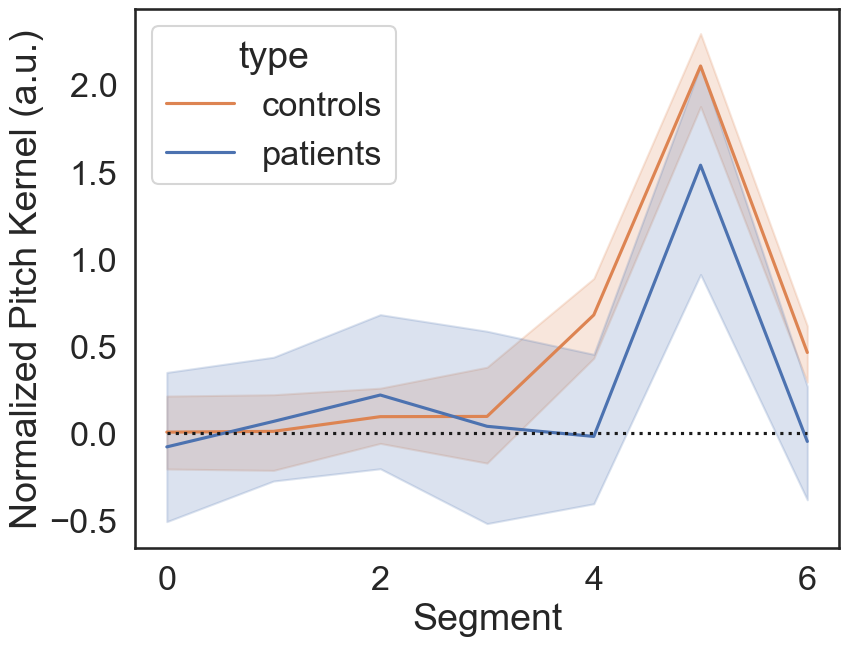

In [204]:
custom_palette = {"controls": sns.color_palette()[1], "patients": sns.color_palette()[0]}
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.lineplot(x="segment", 
                  y="kernel_value",
                  hue ='type',
                  data=kernels[(kernels.session==1) & 
                               ((kernels.type=='controls') | (kernels.subject.isin(neg_patients)))],
             palette=custom_palette,
                  ci=95)
plt.xlabel("Segment")
plt.ylabel("Normalized Pitch Kernel (a.u.)")
plt.plot([0,6],[0,0],color='k',linestyle = ':')

In [205]:
display_group_comparisons_stat(data=data, group='type', measures = ['kernel_typicality',
                                                                           'internal_noise_with_criteria'])

------------------------------------
Mann-Whitney U Test for KERNEL_TYPICALITY and TYPE
Med = 0.13 [0.02 - 0.33]
M = 0.18 [0.05 - 0.32], U=225.00, r=-0.70, p (uncorrected)=0.001, p (Bonferroni corrected)=0.002
------------------------------------
Mann-Whitney U Test for INTERNAL_NOISE_WITH_CRITERIA and TYPE
Med = -0.65 [-3.90 - 0.10]
M = -1.35 [-2.49 - -0.25], U=78.00, r=0.41, p (uncorrected)=0.053, p (Bonferroni corrected)=0.106


<Figure size 2000x500 with 0 Axes>

#### Patients negative on repetition

In [206]:
neg_patients = clinical_data[(clinical_data.prosodie_R>9)].subject.unique()

In [207]:
data = revcor_measures[(revcor_measures.type=='controls') | (revcor_measures.subject.isin(neg_patients))]

In [208]:
data = data[data.session==1]

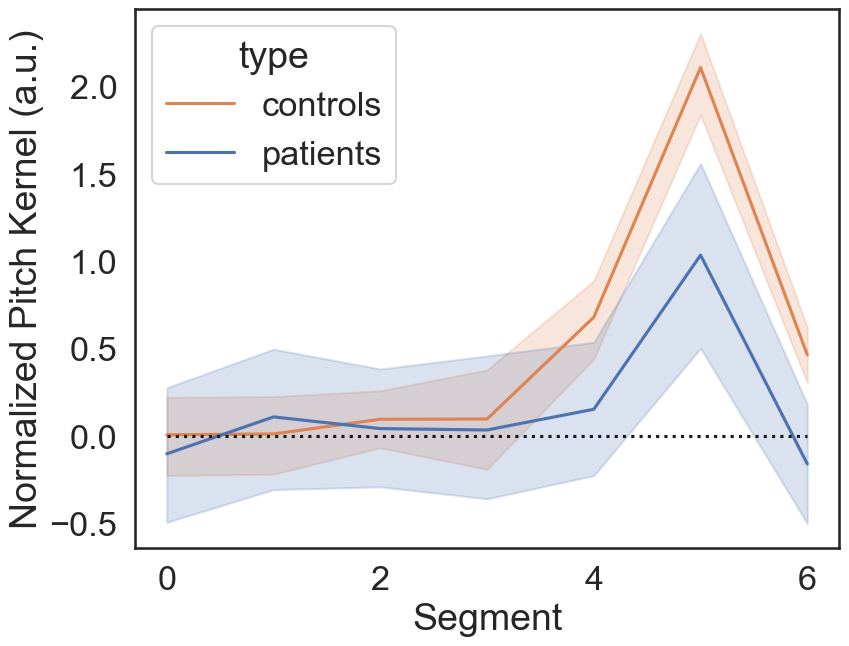

In [209]:
custom_palette = {"controls": sns.color_palette()[1], "patients": sns.color_palette()[0]}
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)

sns.lineplot(x="segment", 
                  y="kernel_value",
                  hue ='type',
                  data=kernels[(kernels.session==1) & 
                               ((kernels.type=='controls') | (kernels.subject.isin(neg_patients)))],
             palette=custom_palette, 
                  ci=95)

plt.xlabel("Segment")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

plt.plot([0,6],[0,0],color='k',linestyle = ':')

In [210]:
display_group_comparisons_stat(data=data, group='type', measures = ['kernel_typicality',
                                                                           'internal_noise_with_criteria'])

------------------------------------
Mann-Whitney U Test for KERNEL_TYPICALITY and TYPE
Med = 0.24 [0.12 - 0.40]
M = 0.27 [0.15 - 0.40], U=381.00, r=-0.82, p (uncorrected)=0.000, p (Bonferroni corrected)=0.000
------------------------------------
Mann-Whitney U Test for INTERNAL_NOISE_WITH_CRITERIA and TYPE
Med = -1.50 [-4.20 - -0.10]
M = -1.60 [-2.52 - -0.65], U=113.00, r=0.46, p (uncorrected)=0.012, p (Bonferroni corrected)=0.025


<Figure size 2000x500 with 0 Axes>

#### Patients negative both on repetition and comprehension

In [211]:
neg_patients = clinical_data[(clinical_data.prosodie_R>9)&(clinical_data.prosodie_C>9)].subject.unique()

In [212]:
data = revcor_measures[(revcor_measures.type=='controls') | (revcor_measures.subject.isin(neg_patients))]

In [213]:
data = data[data.session==1]

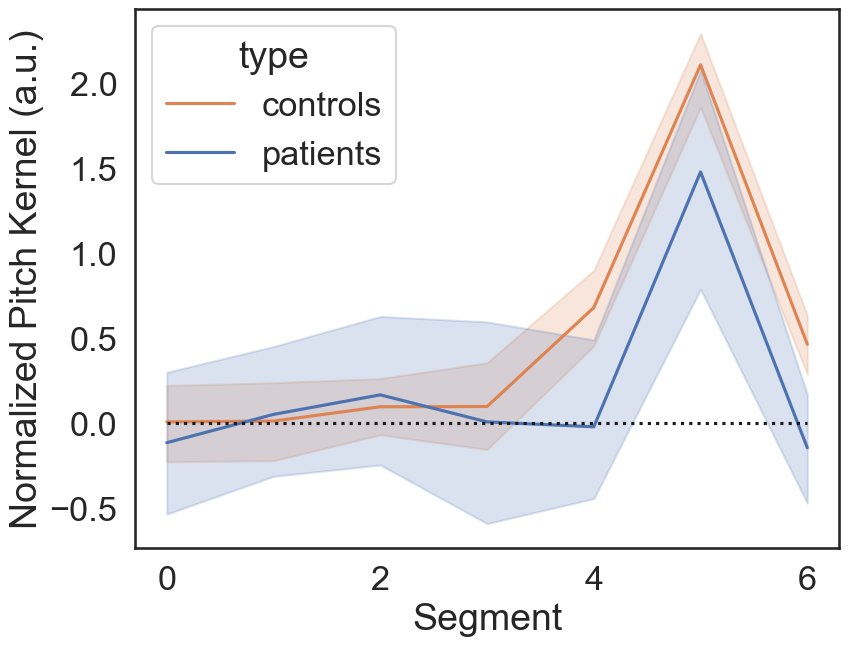

In [214]:
custom_palette = {"controls": sns.color_palette()[1], "patients": sns.color_palette()[0]}
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.lineplot(x="segment", 
                  y="kernel_value",
                  hue ='type',
                  data=kernels[(kernels.session==1) & 
                               ((kernels.type=='controls') | (kernels.subject.isin(neg_patients)))],
             palette=custom_palette, 
                  ci=95)
plt.xlabel("Segment")
plt.ylabel("Normalized Pitch Kernel (a.u.)")
plt.plot([0,6],[0,0],color='k',linestyle = ':')